# KickOffs Anaylis

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
import os

pd.pandas.set_option("display.max_columns",None)
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/tracking2019.csv
./data/tracking2018.csv
./data/kickoffs.csv
./data/extra_points.csv
./data/PFFScoutingData.csv
./data/plays.csv
./data/punts.csv
./data/tracking2020.csv
./data/players.csv
./data/games.csv
./data/nfl-big-data-bowl-2022.zip
./data/field_goal.csv


In [151]:
data = pd.read_csv('./data/kickoffs.csv')
tracking = pd.read_csv('./data/tracking2018.csv')
players = pd.read_csv('./data/players.csv')

In [36]:
tracking.head(2)

time      x      y     s     a   dis       o     dir  \
0  2018-12-30T21:25:32.200  41.32  29.45  4.36  1.33  0.43  130.42  128.44   
1  2018-12-30T21:25:32.300  41.68  29.17  4.59  1.24  0.45  128.59  127.81   

  event    nflId    displayName  jerseyNumber position  team  frameId  \
0  None  39470.0  Justin Tucker           9.0        K  home        1   
1  None  39470.0  Justin Tucker           9.0        K  home        2   

       gameId  playId playDirection  
0  2018123000      36         right  
1  2018123000      36         right

In [79]:
data.tail(2)

gameId  playId  quarter specialTeamsResult  kickerId returnerId  \
7841  2021010315    3886        4          Touchback   41175.0        NaN   
7842  2021010315    4182        4             Return   47893.0        NaN   

     gameClock penaltyCodes penaltyJerseyNumbers  penaltyYards  \
7841  01:49:00          NaN                  NaN           NaN   
7842  00:23:00          NaN                  NaN           NaN   

      preSnapHomeScore  preSnapVisitorScore  kickLength  kickReturnYardage  \
7841                16                   26        75.0                NaN   
7842                23                   26         9.0                0.0   

      playResult  absoluteYardlineNumber  
7841          40                      75  
7842           9                      45

### specialTeamsPlayResult: Special Teams outcome of play dependent on play type: Blocked Kick Attempt, Blocked Punt, Downed, Fair Catch, Kick Attempt Good, Kick Attempt No Good, Kickoff Team Recovery, Muffed, Non-Special Teams Result, Out of Bounds, Return or Touchback (text)

In [71]:
sptr = list(data.specialTeamsResult.unique())
sptr

['Touchback',
 'Return',
 'Muffed',
 'Kickoff Team Recovery',
 'Out of Bounds',
 'Fair Catch',
 'Downed']

In [98]:
data.drop(['gameId','playId','kickerId'],axis=1).groupby('specialTeamsResult').mean()

quarter  penaltyYards  preSnapHomeScore  \
specialTeamsResult                                                
Downed                 3.750000     -2.500000         21.000000   
Fair Catch             3.000000           NaN         19.400000   
Kickoff Team Recovery  3.625000           NaN         22.562500   
Muffed                 2.383333     10.000000         11.150000   
Out of Bounds          2.656250      0.000000         15.453125   
Return                 2.460801      6.061688         12.908593   
Touchback              2.477897     -4.268293         12.481039   

                       preSnapVisitorScore  kickLength  kickReturnYardage  \
specialTeamsResult                                                          
Downed                           22.000000    7.750000                NaN   
Fair Catch                       20.600000   37.000000                NaN   
Kickoff Team Recovery            23.937500   14.500000                NaN   
Muffed                           10.116667   58.683333           9.981481   
Out of Bounds                    13.671875   21.812500                NaN   
Return                           11.893187   59.741185          21.937564   
Touchback                        12.213912   72.510790                NaN   

                       playResult  absoluteYardlineNumber  
specialTeamsResult                                         
Downed                   5.250000               60.000000  
Fair Catch              37.000000               57.000000  
Kickoff Team Recovery   15.375000               66.875000  
Muffed                  46.500000               59.750000  
Out of Bounds           21.640625               60.703125  
Return                  38.401232               59.741527  
Touchback               39.868008               60.089043

<Figure size 3600x1800 with 0 Axes>

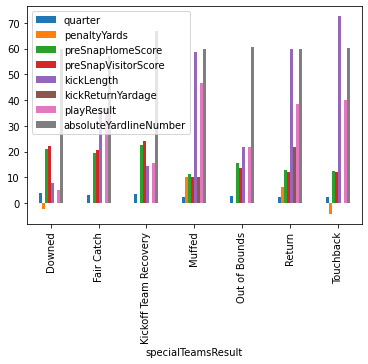

In [97]:
plt.figure(figsize=(50,25))
data.drop(['gameId','playId','kickerId'],axis=1).groupby('specialTeamsResult').mean().plot.bar()
plt.show()

In [89]:
## penaltyYards	
## preSnapHomeScore	
## preSnapVisitorScore	
## kickLength	
## kickReturnYardage	
## playResult	
## absoluteYardlineNumber

In [80]:
data[data['specialTeamsResult'] == 'Return']

gameId  playId  quarter specialTeamsResult  kickerId returnerId  \
1     2018090600     677        1             Return   37267.0      44979   
3     2018090600    1606        2             Return   37267.0      44979   
8     2018090900      36        1             Return   33469.0      46532   
9     2018090900     400        1             Return   39470.0      42573   
12    2018090900    1992        2             Return   39470.0      42573   
...          ...     ...      ...                ...       ...        ...   
7827  2021010314    2040        2             Return   47928.0      43697   
7828  2021010314    2102        3             Return   29874.0      52653   
7835  2021010315    1879        3             Return   41175.0      48322   
7839  2021010315    3105        4             Return   41175.0      48322   
7842  2021010315    4182        4             Return   47893.0        NaN   

     gameClock penaltyCodes penaltyJerseyNumbers  penaltyYards  \
1     05:01:00          NaN                  NaN           NaN   
3     02:08:00           OH               PHI 29           5.0   
8     15:00:00      UNR;FMM        BAL 37;BUF 30           0.0   
9     08:42:00          NaN                  NaN           NaN   
12    04:16:00          NaN                  NaN           NaN   
...        ...          ...                  ...           ...   
7827  00:20:00          NaN                  NaN           NaN   
7828  15:00:00          NaN                  NaN           NaN   
7835  15:00:00          NaN                  NaN           NaN   
7839  10:54:00          NaN                  NaN           NaN   
7842  00:23:00          NaN                  NaN           NaN   

      preSnapHomeScore  preSnapVisitorScore  kickLength  kickReturnYardage  \
1                    0                    3        64.0               30.0   
3                    3                    6        68.0               13.0   
8                    0                    0        69.0               24.0   
9                    7                    0        61.0               28.0   
12                  20                    0        65.0               25.0   
...                ...                  ...         ...                ...   
7827                12                    7        64.0               28.0   
7828                12                    7        63.0               23.0   
7835                 3                    6        58.0               11.0   
7839                16                   12        63.0               18.0   
7842                23                   26         9.0                0.0   

      playResult  absoluteYardlineNumber  
1             34                      75  
3             60                      45  
8             45                      75  
9             33                      45  
12            40                      75  
...          ...                     ...  
7827          36                      75  
7828          40                      75  
7835          47                      45  
7839          45                      75  
7842           9                      45  

[2921 rows x 16 columns]

In [76]:
for i in sptr:
    print(data[data.specialTeamsResult == i].iloc[0])

gameId                    2018090600
playId                            37
quarter                            1
specialTeamsResult         Touchback
kickerId                     44966.0
returnerId                       NaN
gameClock                   15:00:00
penaltyCodes                     NaN
penaltyJerseyNumbers             NaN
penaltyYards                     NaN
preSnapHomeScore                   0
preSnapVisitorScore                0
kickLength                      66.0
kickReturnYardage                NaN
playResult                        40
absoluteYardlineNumber            45
Name: 0, dtype: object
gameId                    2018090600
playId                           677
quarter                            1
specialTeamsResult            Return
kickerId                     37267.0
returnerId                     44979
gameClock                   05:01:00
penaltyCodes                     NaN
penaltyJerseyNumbers             NaN
penaltyYards                     NaN
preSnapHomeScor

In [78]:
touchback_play = 2018090600
ret = 2018090600
muffed_play = 2018091300
Kickoff_recovey = 2018091613
out=2018091613
fair_catch = 2018112503
downed = 2018120202

In [60]:
def get_game_by_id(data,gameid):
    if gameid in data.gameId.unique():
        return data[data['gameId'] == gameid]
    else:
        print(f"'gameid:' {gameid}, was not file!")
    
def get_play_by_id(game,tracking,playid):
    if playid in game.playId.unique():
        return tracking[tracking['playId'] == playid]
       # return tracking[tracking['playId'] == playid]
    else:
        print(f"'play id:' {playid}, was not file!")
    

In [65]:
game = get_game_by_id(data,2021010314)
game

gameId  playId  quarter specialTeamsResult  kickerId returnerId  \
7823  2021010314      40        1          Touchback   47928.0        NaN   
7824  2021010314     340        1             Return   29874.0      52653   
7825  2021010314    1053        2          Touchback   47928.0        NaN   
7826  2021010314    1535        2             Return   29141.0      48784   
7827  2021010314    2040        2             Return   47928.0      43697   
7828  2021010314    2102        3             Return   29874.0      52653   
7829  2021010314    2496        3          Touchback   47928.0        NaN   
7830  2021010314    3002        4          Touchback   47928.0        NaN   

     gameClock penaltyCodes penaltyJerseyNumbers  penaltyYards  \
7823  15:00:00          NaN                  NaN           NaN   
7824  10:09:00          NaN                  NaN           NaN   
7825  14:17:00          NaN                  NaN           NaN   
7826  05:21:00          NaN                  NaN           NaN   
7827  00:20:00          NaN                  NaN           NaN   
7828  15:00:00          NaN                  NaN           NaN   
7829  06:16:00          NaN                  NaN           NaN   
7830  14:25:00          NaN                  NaN           NaN   

      preSnapHomeScore  preSnapVisitorScore  kickLength  kickReturnYardage  \
7823                 0                    0        70.0                NaN   
7824                 0                    7        64.0               18.0   
7825                 3                    7        74.0                NaN   
7826                 5                    7        61.0               22.0   
7827                12                    7        64.0               28.0   
7828                12                    7        63.0               23.0   
7829                15                    7        73.0                NaN   
7830                18                    7        70.0                NaN   

      playResult  absoluteYardlineNumber  
7823          40                      45  
7824          46                      75  
7825          40                      75  
7826          39                      30  
7827          36                      75  
7828          40                      75  
7829          40                      45  
7830          40                      75

In [68]:
game.specialTeamsResult.unique()

array(['Touchback', 'Return'], dtype=object)

In [150]:
game_kicker=game['kickerId'].unique()
game_kicker

array([47928., 29874., 29141.])

In [66]:
play = get_play_by_id(game,tracking,340)
play

time      x      y     s     a   dis       o  \
60007     2018-12-30T18:14:47.900  84.64  32.90  0.00  0.00  0.00  206.74   
60008     2018-12-30T18:14:48.000  84.64  32.90  0.00  0.00  0.00  207.59   
60009     2018-12-30T18:14:48.100  84.64  32.90  0.00  0.00  0.00  208.50   
60010     2018-12-30T18:14:48.200  84.64  32.90  0.00  0.00  0.00  208.50   
60011     2018-12-30T18:14:48.300  84.64  32.90  0.00  0.00  0.00  208.50   
...                           ...    ...    ...   ...   ...   ...     ...   
11640157  2018-09-16T17:14:59.200  69.61  55.28  6.66  3.02  0.76     NaN   
11640158  2018-09-16T17:14:59.300  69.70  55.25  6.76  3.01  0.09     NaN   
11640159  2018-09-16T17:14:59.400  71.42  55.20  3.50  0.27  1.72     NaN   
11640160  2018-09-16T17:14:59.500  71.70  55.42  3.47  0.76  0.35     NaN   
11640161  2018-09-16T17:14:59.600  71.98  55.64  3.43  0.54  0.35     NaN   

             dir event    nflId       displayName  jerseyNumber position  \
60007     115.68  None  33469.0  Stephen Hauschka           4.0        K   
60008     119.04  None  33469.0  Stephen Hauschka           4.0        K   
60009     125.83  None  33469.0  Stephen Hauschka           4.0        K   
60010     140.53  None  33469.0  Stephen Hauschka           4.0        K   
60011     135.15  None  33469.0  Stephen Hauschka           4.0        K   
...          ...   ...      ...               ...           ...      ...   
11640157     NaN  None      NaN          football           NaN      NaN   
11640158     NaN  None      NaN          football           NaN      NaN   
11640159     NaN  None      NaN          football           NaN      NaN   
11640160     NaN  None      NaN          football           NaN      NaN   
11640161     NaN  None      NaN          football           NaN      NaN   

              team  frameId      gameId  playId playDirection  
60007         home        1  2018123001     340         right  
60008         home        2  2018123001     340         right  
60009         home        3  2018123001     340         right  
60010         home        4  2018123001     340         right  
60011         home        5  2018123001     340         right  
...            ...      ...         ...     ...           ...  
11640157  football      154  2018091606     340          left  
11640158  football      155  2018091606     340          left  
11640159  football      156  2018091606     340          left  
11640160  football      157  2018091606     340          left  
11640161  football      158  2018091606     340          left  

[7245 rows x 18 columns]

#### x: Player position along the long axis of the field, 0 - 120 yards. See Figure 1 below. (numeric)
#### y: Player position along the short axis of the field, 0 - 53.3 yards. See Figure 1 below. (numeric)
#### s: Speed in yards/second (numeric)
#### a: Speed in yards/second^2 (numeric)
#### dis: Distance traveled from prior time point, in yards (numeric)
#### o: Player orientation (deg), 0 - 360 degrees (numeric)
#### dir: Angle of player motion (deg), 0 - 360 degrees (numeric)


In [100]:
play.drop(['nflId','jerseyNumber','frameId','gameId','playId'],1).describe()

x            y            s            a          dis  \
count  7245.000000  7245.000000  7245.000000  7245.000000  7245.000000   
mean     65.924395    34.555985     3.151357     1.478634     0.322520   
std      29.069254     9.370290     3.468866     1.503663     0.361099   
min      -8.070000     7.610000     0.000000     0.000000     0.000000   
25%      36.450000    28.290000     0.420000     0.440000     0.050000   
50%      69.970000    31.100000     1.540000     1.050000     0.150000   
75%      94.590000    42.430000     5.760000     2.010000     0.580000   
max     132.370000    56.930000    27.350000    13.790000     3.640000   

                 o          dir  
count  6930.000000  6930.000000  
mean    183.965733   188.054476  
std     103.204850   107.356924  
min       0.160000     0.090000  
25%      86.710000    84.460000  
50%     202.265000   210.990000  
75%     273.175000   286.617500  
max     359.970000   359.980000

In [67]:
game.playId.value_counts()

2496    1
2040    1
340     1
2102    1
40      1
3002    1
1053    1
1535    1
Name: playId, dtype: int64

# playground 

In [101]:
game

gameId  playId  quarter specialTeamsResult  kickerId returnerId  \
7823  2021010314      40        1          Touchback   47928.0        NaN   
7824  2021010314     340        1             Return   29874.0      52653   
7825  2021010314    1053        2          Touchback   47928.0        NaN   
7826  2021010314    1535        2             Return   29141.0      48784   
7827  2021010314    2040        2             Return   47928.0      43697   
7828  2021010314    2102        3             Return   29874.0      52653   
7829  2021010314    2496        3          Touchback   47928.0        NaN   
7830  2021010314    3002        4          Touchback   47928.0        NaN   

     gameClock penaltyCodes penaltyJerseyNumbers  penaltyYards  \
7823  15:00:00          NaN                  NaN           NaN   
7824  10:09:00          NaN                  NaN           NaN   
7825  14:17:00          NaN                  NaN           NaN   
7826  05:21:00          NaN                  NaN           NaN   
7827  00:20:00          NaN                  NaN           NaN   
7828  15:00:00          NaN                  NaN           NaN   
7829  06:16:00          NaN                  NaN           NaN   
7830  14:25:00          NaN                  NaN           NaN   

      preSnapHomeScore  preSnapVisitorScore  kickLength  kickReturnYardage  \
7823                 0                    0        70.0                NaN   
7824                 0                    7        64.0               18.0   
7825                 3                    7        74.0                NaN   
7826                 5                    7        61.0               22.0   
7827                12                    7        64.0               28.0   
7828                12                    7        63.0               23.0   
7829                15                    7        73.0                NaN   
7830                18                    7        70.0                NaN   

      playResult  absoluteYardlineNumber  
7823          40                      45  
7824          46                      75  
7825          40                      75  
7826          39                      30  
7827          36                      75  
7828          40                      75  
7829          40                      45  
7830          40                      75

In [274]:
play

time      x      y     s     a   dis       o  \
60007     2018-12-30T18:14:47.900  84.64  32.90  0.00  0.00  0.00  206.74   
60008     2018-12-30T18:14:48.000  84.64  32.90  0.00  0.00  0.00  207.59   
60009     2018-12-30T18:14:48.100  84.64  32.90  0.00  0.00  0.00  208.50   
60010     2018-12-30T18:14:48.200  84.64  32.90  0.00  0.00  0.00  208.50   
60011     2018-12-30T18:14:48.300  84.64  32.90  0.00  0.00  0.00  208.50   
...                           ...    ...    ...   ...   ...   ...     ...   
11640157  2018-09-16T17:14:59.200  69.61  55.28  6.66  3.02  0.76     NaN   
11640158  2018-09-16T17:14:59.300  69.70  55.25  6.76  3.01  0.09     NaN   
11640159  2018-09-16T17:14:59.400  71.42  55.20  3.50  0.27  1.72     NaN   
11640160  2018-09-16T17:14:59.500  71.70  55.42  3.47  0.76  0.35     NaN   
11640161  2018-09-16T17:14:59.600  71.98  55.64  3.43  0.54  0.35     NaN   

             dir event    nflId       displayName  jerseyNumber position  \
60007     115.68  None  33469.0  Stephen Hauschka           4.0        K   
60008     119.04  None  33469.0  Stephen Hauschka           4.0        K   
60009     125.83  None  33469.0  Stephen Hauschka           4.0        K   
60010     140.53  None  33469.0  Stephen Hauschka           4.0        K   
60011     135.15  None  33469.0  Stephen Hauschka           4.0        K   
...          ...   ...      ...               ...           ...      ...   
11640157     NaN  None      NaN          football           NaN      NaN   
11640158     NaN  None      NaN          football           NaN      NaN   
11640159     NaN  None      NaN          football           NaN      NaN   
11640160     NaN  None      NaN          football           NaN      NaN   
11640161     NaN  None      NaN          football           NaN      NaN   

              team  frameId      gameId  playId playDirection  
60007         home        1  2018123001     340         right  
60008         home        2  2018123001     340         right  
60009         home        3  2018123001     340         right  
60010         home        4  2018123001     340         right  
60011         home        5  2018123001     340         right  
...            ...      ...         ...     ...           ...  
11640157  football      154  2018091606     340          left  
11640158  football      155  2018091606     340          left  
11640159  football      156  2018091606     340          left  
11640160  football      157  2018091606     340          left  
11640161  football      158  2018091606     340          left  

[7245 rows x 18 columns]

In [267]:
start = play.iloc[0:100]
start

time      x      y     s     a   dis       o  \
60007  2018-12-30T18:14:47.900  84.64  32.90  0.00  0.00  0.00  206.74   
60008  2018-12-30T18:14:48.000  84.64  32.90  0.00  0.00  0.00  207.59   
60009  2018-12-30T18:14:48.100  84.64  32.90  0.00  0.00  0.00  208.50   
60010  2018-12-30T18:14:48.200  84.64  32.90  0.00  0.00  0.00  208.50   
60011  2018-12-30T18:14:48.300  84.64  32.90  0.00  0.00  0.00  208.50   
...                        ...    ...    ...   ...   ...   ...     ...   
60102  2018-12-30T18:14:52.000  95.44  30.46  0.53  0.56  0.06  105.19   
60103  2018-12-30T18:14:52.100  95.50  30.49  0.58  0.16  0.06   96.50   
60104  2018-12-30T18:14:52.200  95.55  30.52  0.58  0.07  0.06   90.14   
60105  2018-12-30T18:14:52.300  95.59  30.55  0.56  0.02  0.05   85.59   
60106  2018-12-30T18:14:52.400  95.64  30.59  0.59  0.30  0.06   81.41   

          dir event    nflId       displayName  jerseyNumber position  team  \
60007  115.68  None  33469.0  Stephen Hauschka           4.0        K  home   
60008  119.04  None  33469.0  Stephen Hauschka           4.0        K  home   
60009  125.83  None  33469.0  Stephen Hauschka           4.0        K  home   
60010  140.53  None  33469.0  Stephen Hauschka           4.0        K  home   
60011  135.15  None  33469.0  Stephen Hauschka           4.0        K  home   
...       ...   ...      ...               ...           ...      ...   ...   
60102   61.29  None  34483.0        Ziggy Hood          97.0       NT  away   
60103   60.44  None  34483.0        Ziggy Hood          97.0       NT  away   
60104   60.78  None  34483.0        Ziggy Hood          97.0       NT  away   
60105   60.10  None  34483.0        Ziggy Hood          97.0       NT  away   
60106   49.12  None  34483.0        Ziggy Hood          97.0       NT  away   

       frameId      gameId  playId playDirection  
60007        1  2018123001     340         right  
60008        2  2018123001     340         right  
60009        3  2018123001     340         right  
60010        4  2018123001     340         right  
60011        5  2018123001     340         right  
...        ...         ...     ...           ...  
60102       42  2018123001     340         right  
60103       43  2018123001     340         right  
60104       44  2018123001     340         right  
60105       45  2018123001     340         right  
60106       46  2018123001     340         right  

[100 rows x 18 columns]

(0.0, 53.3)

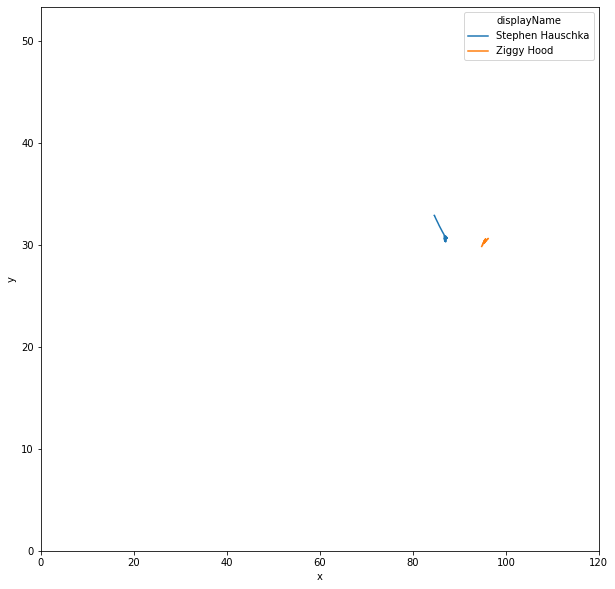

In [145]:
plt.figure(figsize=(10,10))
#plt.plot(start['x'],start['y'], 'bo')
sns.lineplot(data=start,x='x',y='y',hue='displayName')

plt.xlim([0, 120])
plt.ylim([0, 53.3])

(0.0, 53.3)

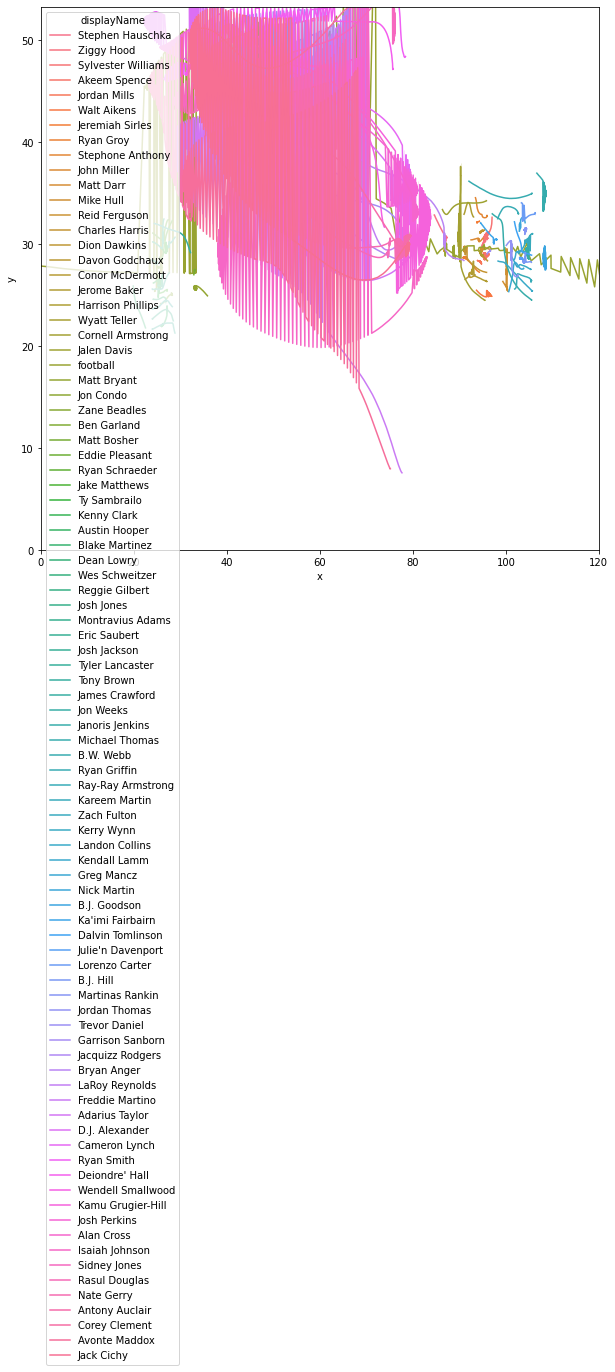

In [144]:
plt.figure(figsize=(10,10))
#plt.plot(start['x'],start['y'], 'bo')
sns.lineplot(data=play,x='x',y='y',hue='displayName')

plt.xlim([0, 120])
plt.ylim([0, 53.3])

In [159]:
game_kicker

array([47928., 29874., 29141.])

In [245]:
#lets follow one particular player
def find_player_by_id(id):
    return players[players['nflId'] == id]
    

In [246]:
kicker = find_player_by_id(33469.0)
kicker

nflId height  weight   birthDate           collegeName Position  \
1770  33469     76     210  1985-06-29  North Carolina State        K   

           displayName  
1770  Stephen Hauschka

In [268]:
find_player_by_id(52653)

nflId height  weight   birthDate          collegeName Position  \
971  52653    5-9     185  1998-04-02  Louisiana-Lafayette       RB   

        displayName  
971  Raymond Calais

In [257]:
# kicker = kicker.displayName.to_list()
kicker

nflId height  weight   birthDate           collegeName Position  \
1770  33469     76     210  1985-06-29  North Carolina State        K   

           displayName  
1770  Stephen Hauschka

In [269]:
kicker_player = play[play['nflId'] == 33469.0]
returner_player = play[play['nflId'] == 52653.0]
ball = play[play['displayName'] == 'football']


In [270]:
returner_player

Empty DataFrame
Columns: [time, x, y, s, a, dis, o, dir, event, nflId, displayName, jerseyNumber, position, team, frameId, gameId, playId, playDirection]
Index: []

In [250]:
ball.event.value_counts()

None                   302
ball_snap                4
extra_point_attempt      2
punt                     1
first_contact            1
extra_point              1
tackle                   1
field_goal               1
field_goal_attempt       1
punt_received            1
Name: event, dtype: int64

(0.0, 53.3)

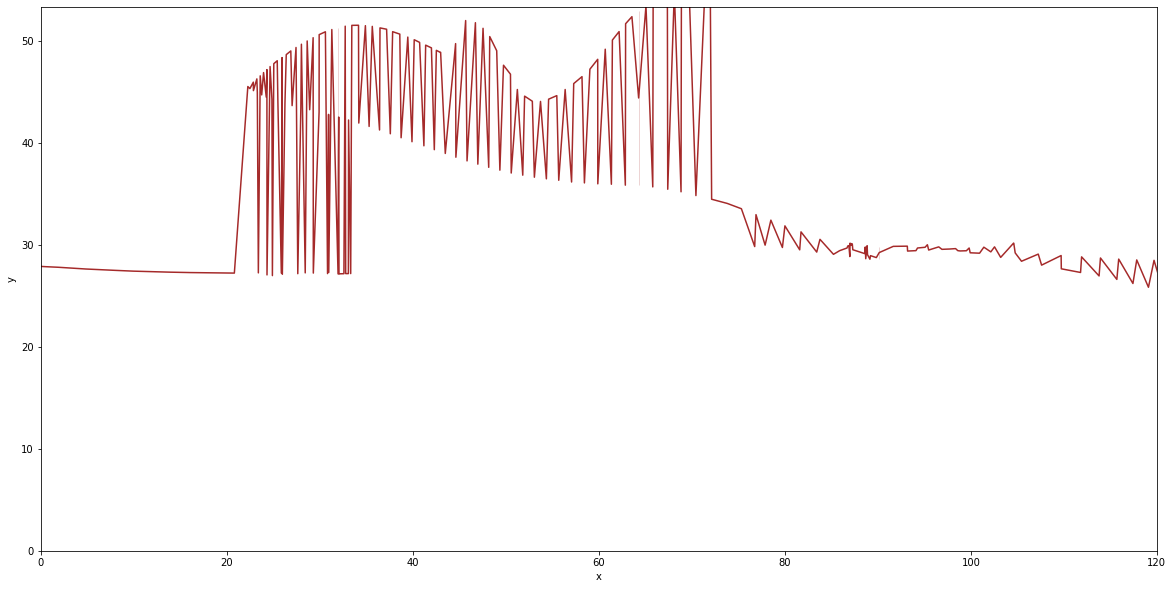

In [262]:
plt.figure(figsize=(20,10))
#plt.plot(start['x'],start['y'], 'bo')
#sns.lineplot(data=kicker_player,x='x',y='y',color='blue')
sns.lineplot(data=returner_player,x='x',y='y',color='red')
sns.lineplot(data=ball,x='x',y='y',color='brown')


plt.xlim([0, 120])
plt.ylim([0, 53.3])

In [318]:
frame1 = play[play['frameId'] == 1]


In [319]:
frame1.displayName.value_counts()

football        4
B.W. Webb       1
Nate Gerry      1
B.J. Goodson    1
Kerry Wynn      1
               ..
Jerome Baker    1
Akeem Spence    1
Sidney Jones    1
Jalen Davis     1
Matt Darr       1
Name: displayName, Length: 89, dtype: int64

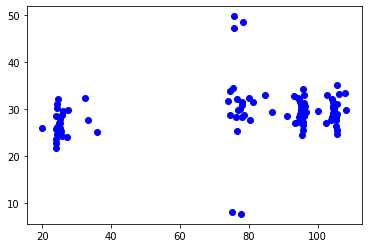

In [299]:
for i in range(0,frame1.shape[0]):
    plt.plot(frame1.iloc[i]['x'],frame1.iloc[i]['y'], 'bo')
plt.show()

    #print(frame1.iloc[i])

(0.0, 53.3)

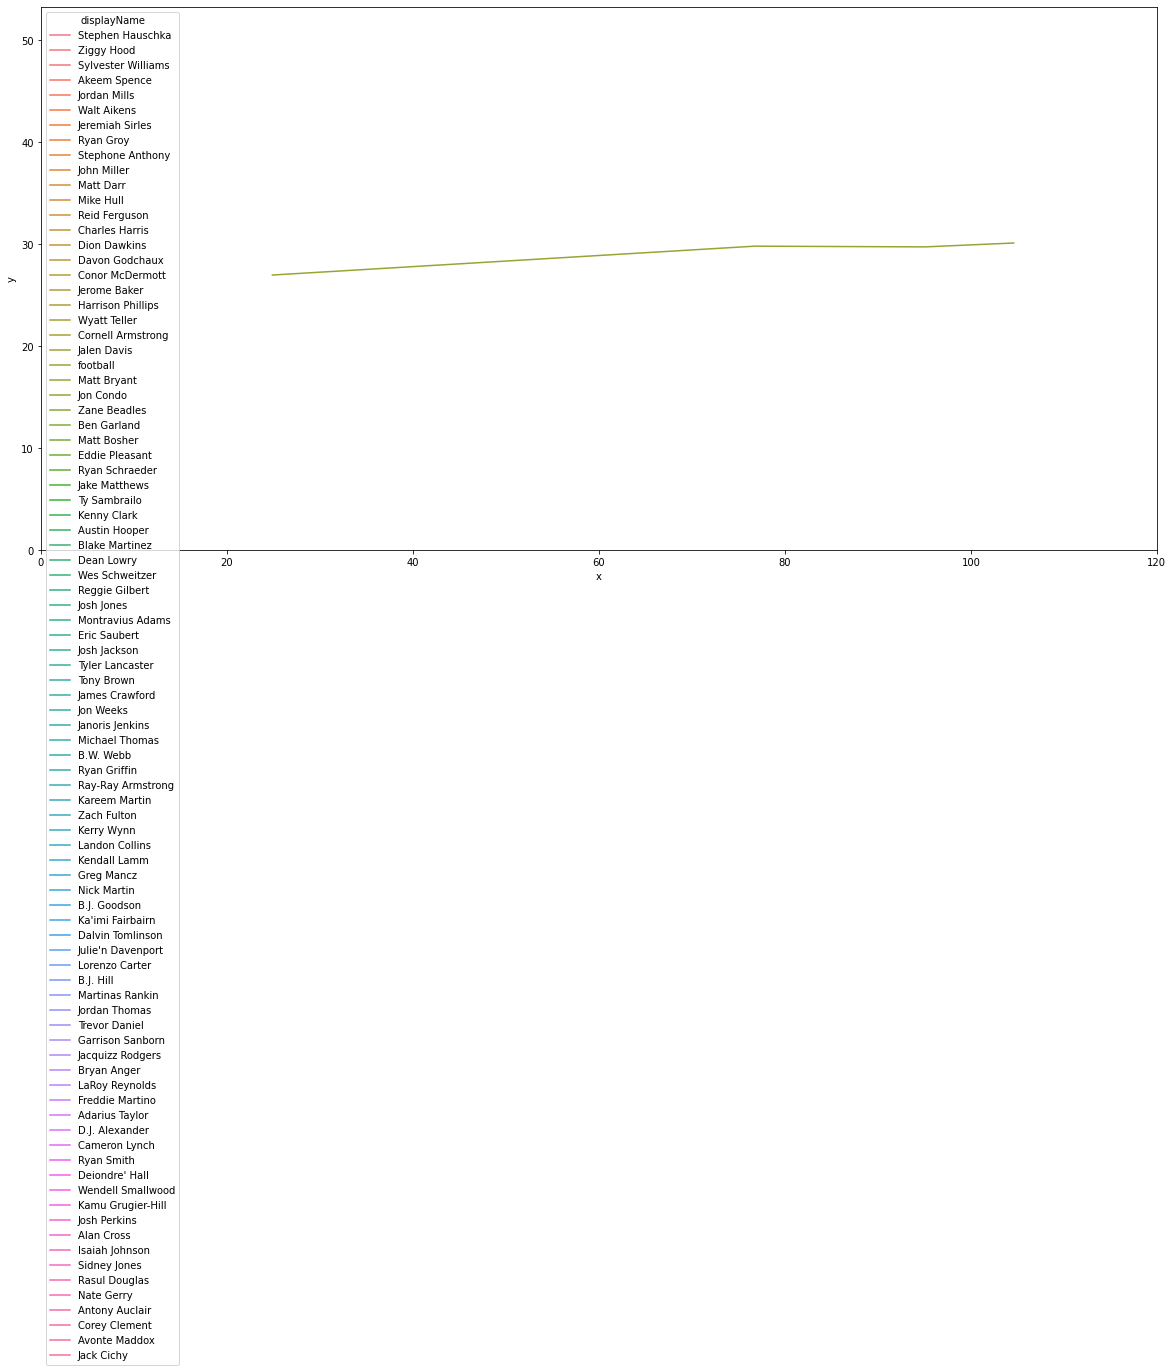

In [284]:
plt.figure(figsize=(20,10))
#plt.plot(start['x'],start['y'], 'bo')
sns.lineplot(data=frame1,x='x',y='y',hue='displayName')


plt.xlim([0, 120])
plt.ylim([0, 53.3])

In [326]:
t.team.unique()

array(['home', 'away', 'football'], dtype=object)

In [323]:
t.head(1)

time      x      y     s     a   dis      o  \
11636684  2018-09-16T17:14:59.500  60.71  53.15  6.53  2.85  0.62  84.32   

            dir event    nflId       displayName  jerseyNumber position  team  \
11636684  87.44  None  35072.0  Garrison Sanborn          89.0       LS  home   

          frameId      gameId  playId playDirection  
11636684      157  2018091606     340          left

In [340]:
play[play['frameId'] == 1]

time      x      y     s     a   dis       o  \
60007     2018-12-30T18:14:47.900  84.64  32.90  0.00  0.00  0.00  206.74   
60061     2018-12-30T18:14:47.900  96.21  30.61  0.00  0.00  0.00  271.83   
60115     2018-12-30T18:14:47.900  96.18  31.22  0.00  0.00  0.00  146.43   
60169     2018-12-30T18:14:47.900  95.94  28.97  0.00  0.00  0.00  233.31   
60223     2018-12-30T18:14:47.900  94.73  28.27  0.00  0.00  0.00  177.07   
...                           ...    ...    ...   ...   ...   ...     ...   
11639372  2018-09-16T17:14:43.900  78.15  30.71  0.01  0.02  0.01  239.22   
11639530  2018-09-16T17:14:43.900  32.31  32.32  0.04  0.05  0.01   91.88   
11639688  2018-09-16T17:14:43.900  75.11   7.99  0.03  0.03  0.01  104.34   
11639846  2018-09-16T17:14:43.900  78.49  28.77  0.02  0.02  0.00  268.72   
11640004  2018-09-16T17:14:43.900  76.76  29.83  0.00  0.00  0.00     NaN   

             dir event    nflId         displayName  jerseyNumber position  \
60007     115.68  None  33469.0    Stephen Hauschka           4.0        K   
60061       2.13  None  34483.0          Ziggy Hood          97.0       NT   
60115      70.10  None  39974.0  Sylvester Williams          98.0       DT   
60169     282.53  None  40048.0        Akeem Spence          93.0       DT   
60223     111.39  None  40111.0        Jordan Mills          79.0        T   
...          ...   ...      ...                 ...           ...      ...   
11639372  223.56  None  45321.0      Antony Auclair          82.0       TE   
11639530   57.07  None  45599.0       Corey Clement          30.0       RB   
11639688  324.38  None  46194.0       Avonte Maddox          29.0       CB   
11639846  209.39  None  46271.0          Jack Cichy          48.0       LB   
11640004     NaN  None      NaN            football           NaN      NaN   

              team  frameId      gameId  playId playDirection  
60007         home        1  2018123001     340         right  
60061         away        1  2018123001     340         right  
60115         away        1  2018123001     340         right  
60169         away        1  2018123001     340         right  
60223         home        1  2018123001     340         right  
...            ...      ...         ...     ...           ...  
11639372      home        1  2018091606     340          left  
11639530      away        1  2018091606     340          left  
11639688      away        1  2018091606     340          left  
11639846      home        1  2018091606     340          left  
11640004  football        1  2018091606     340          left  

[92 rows x 18 columns]

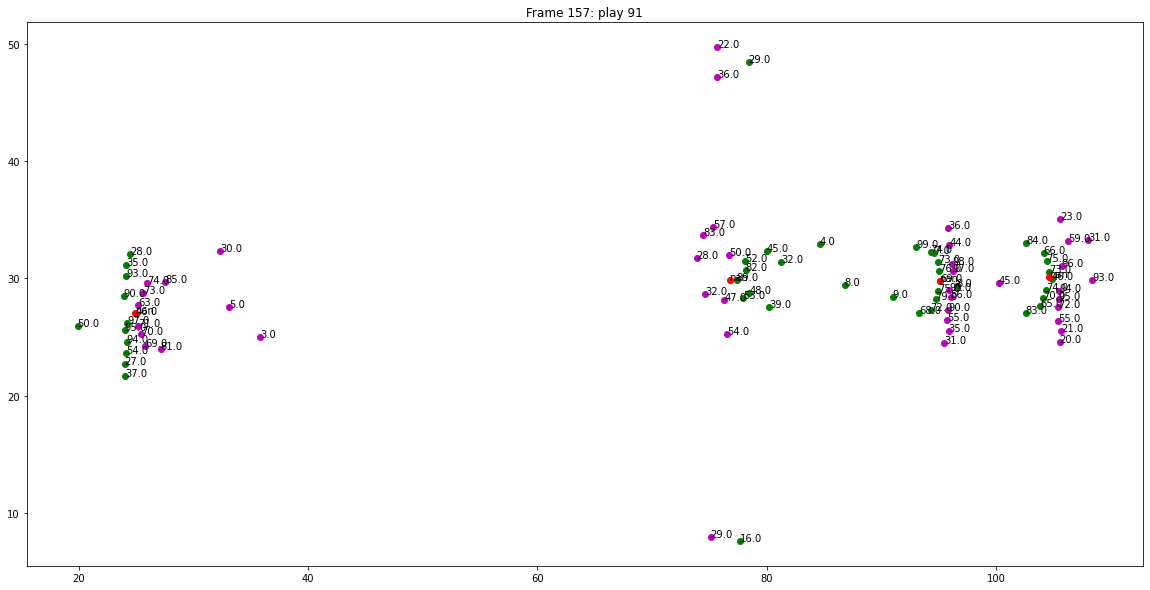

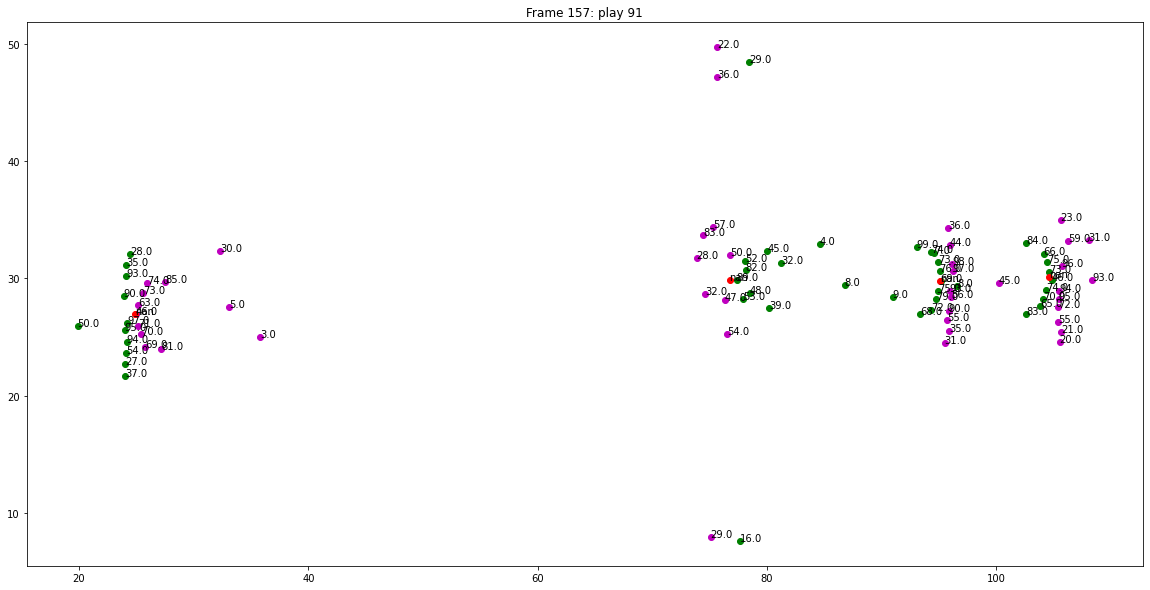

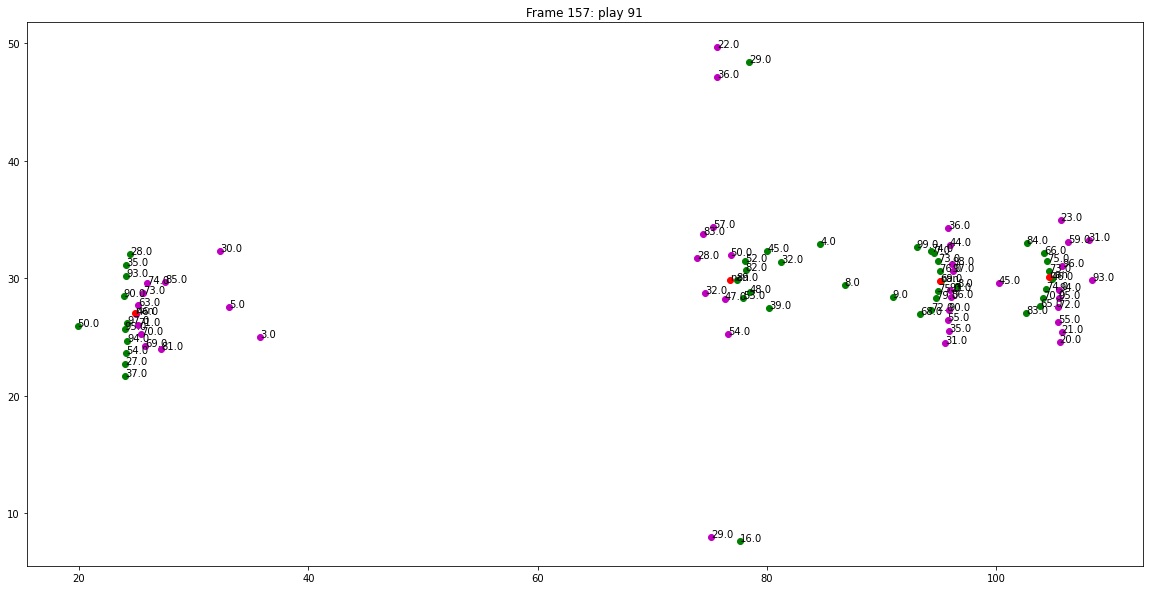

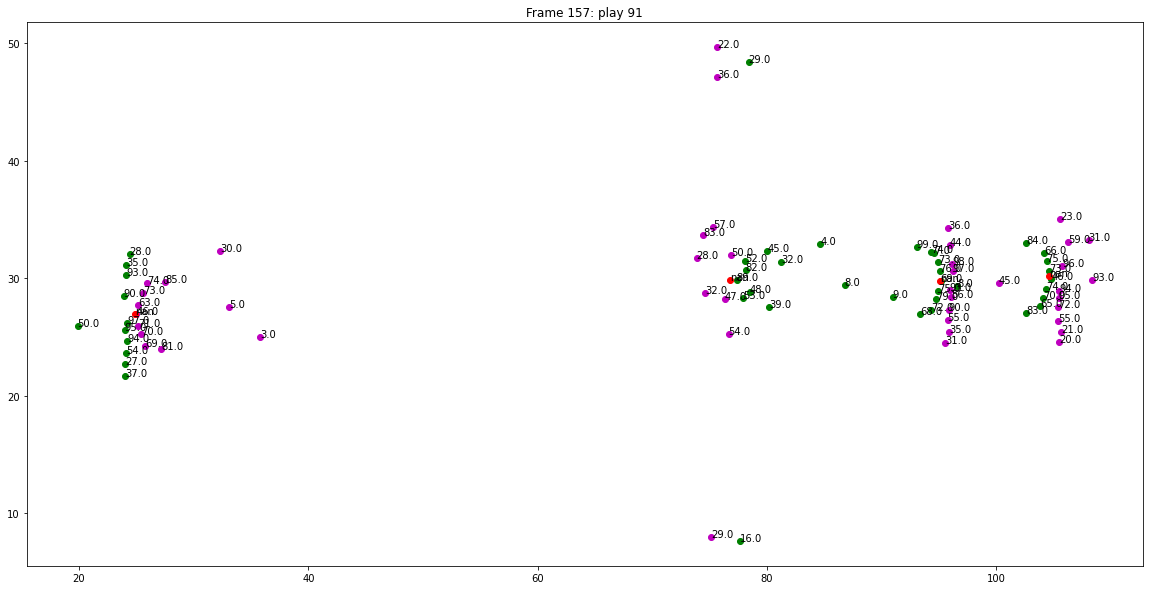

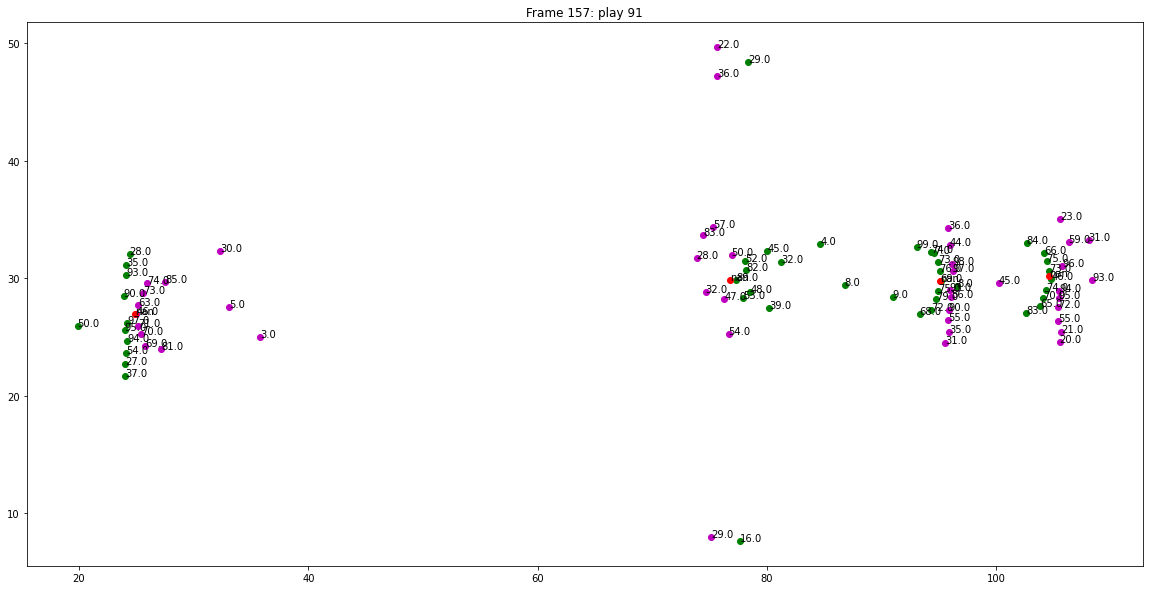

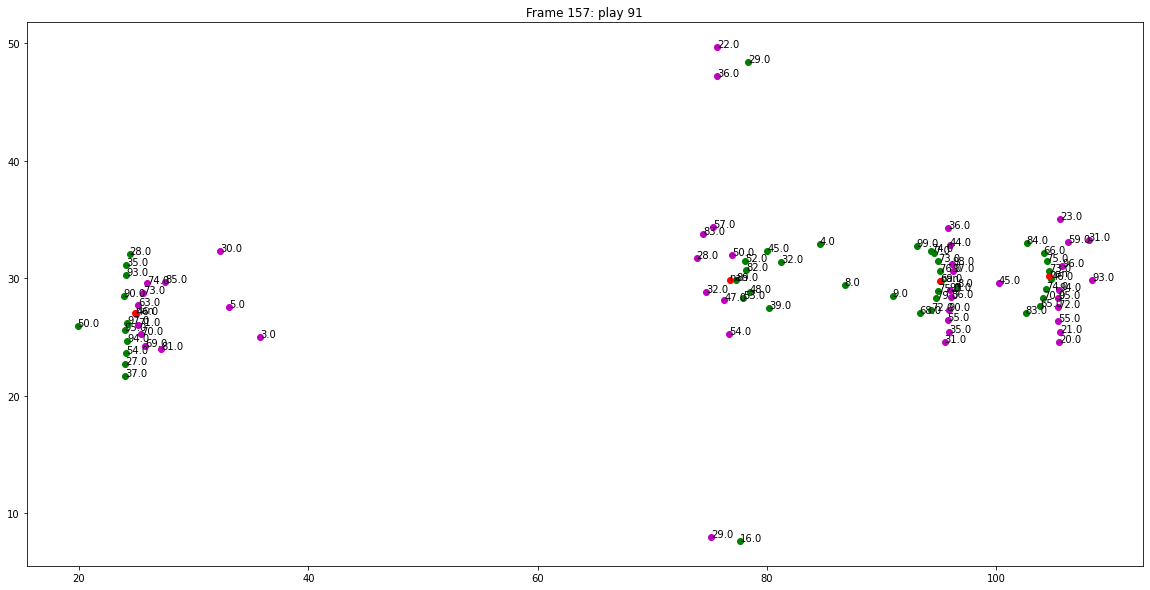

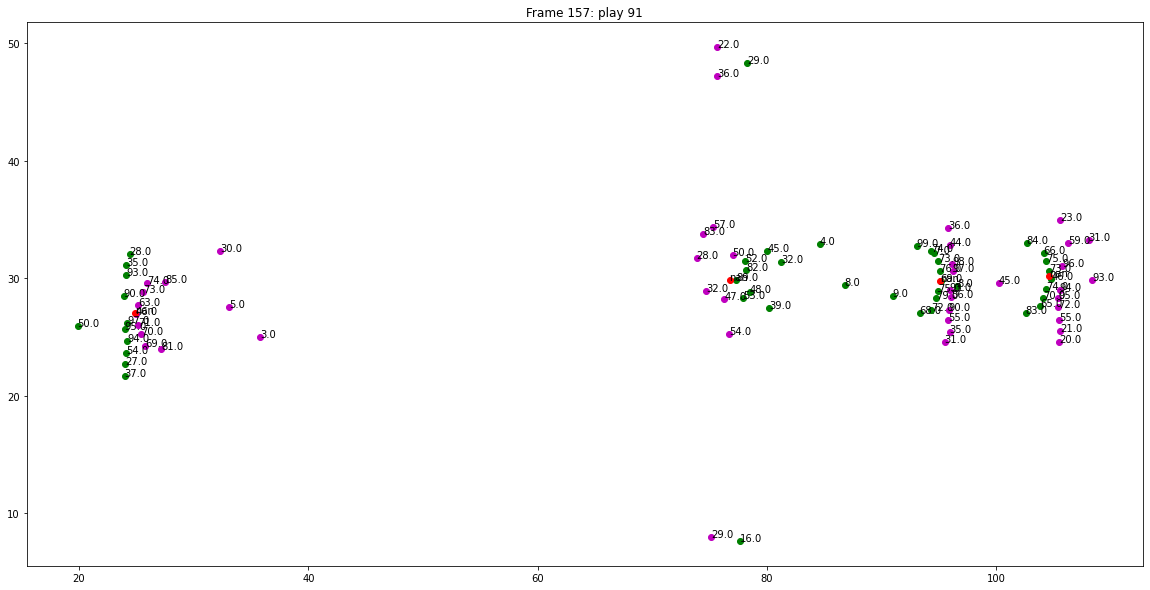

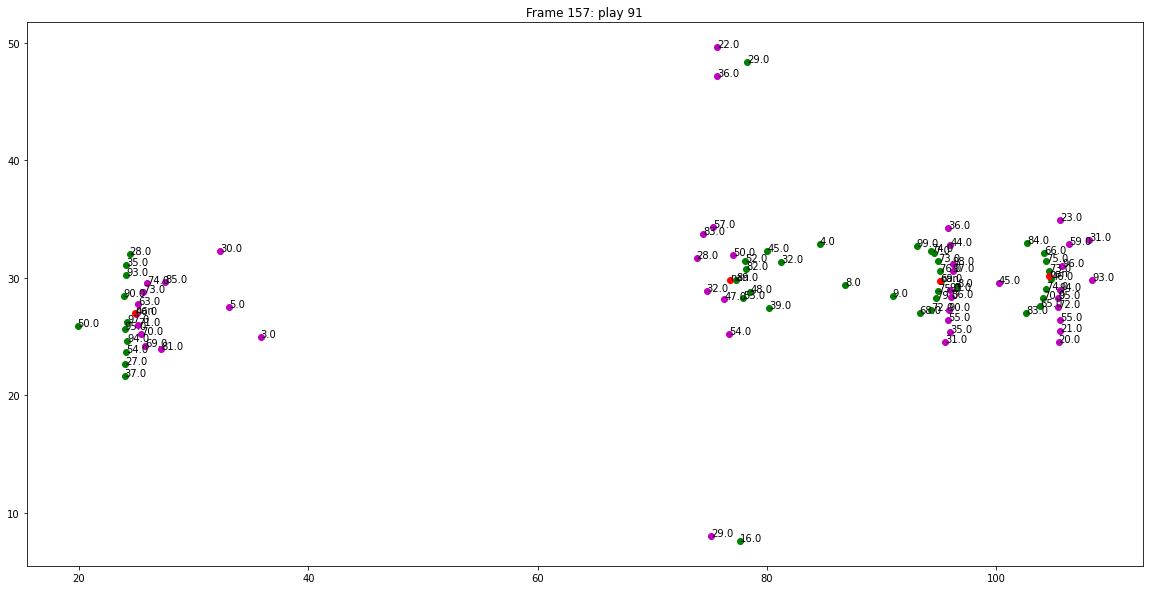

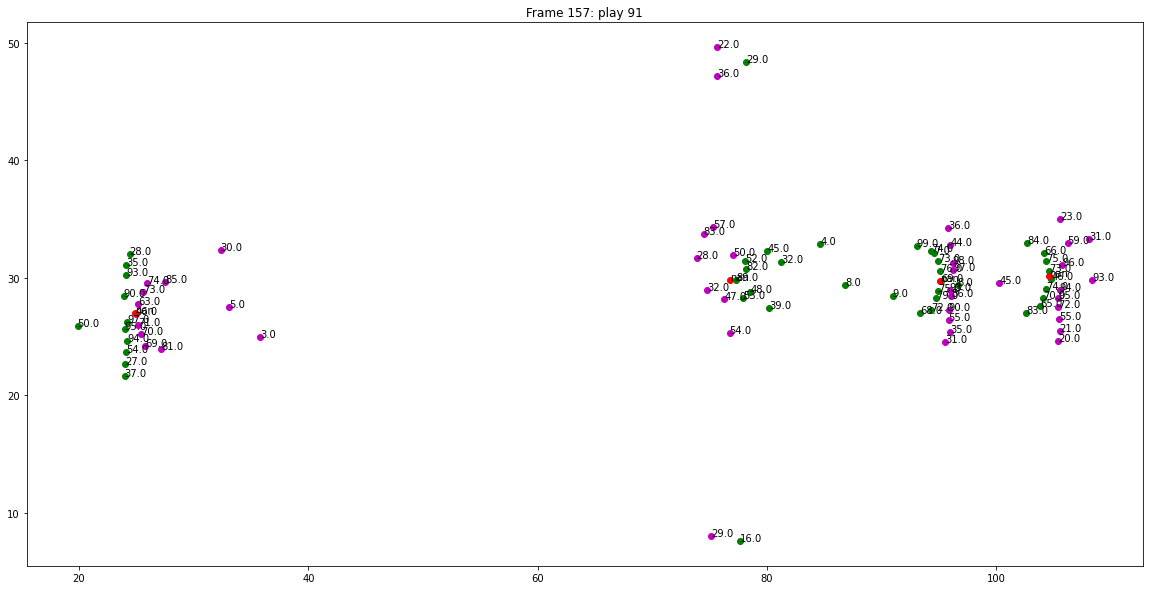

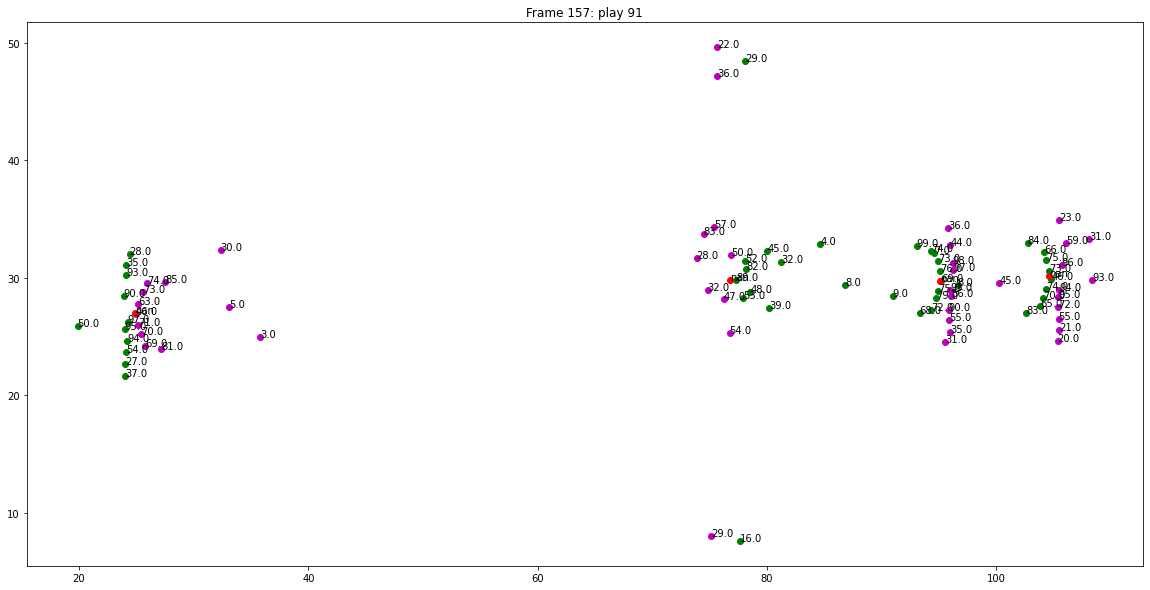

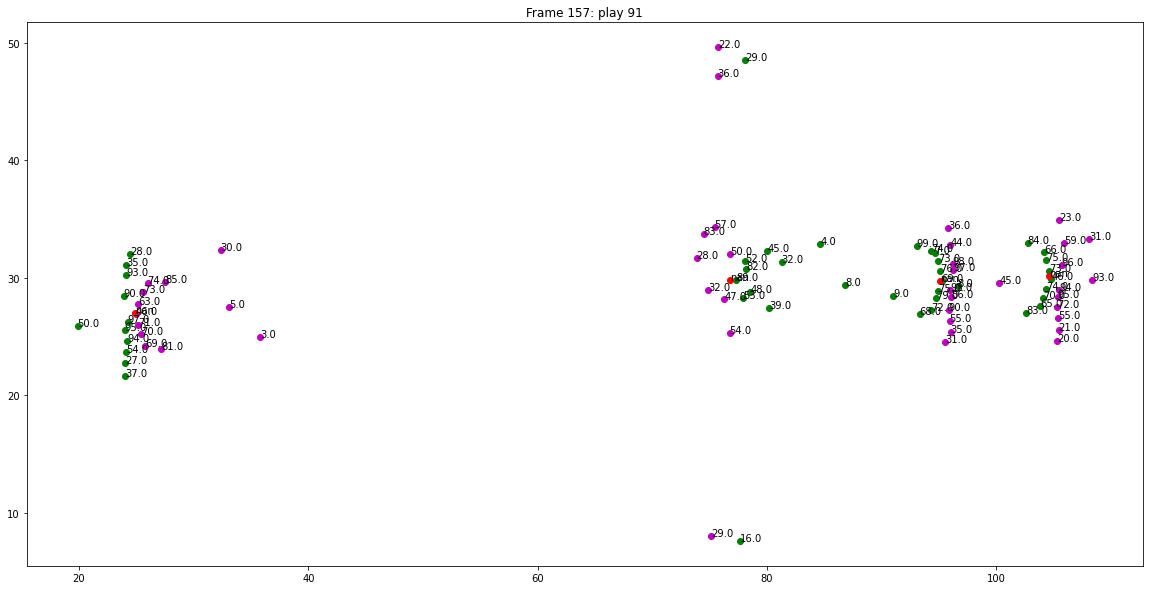

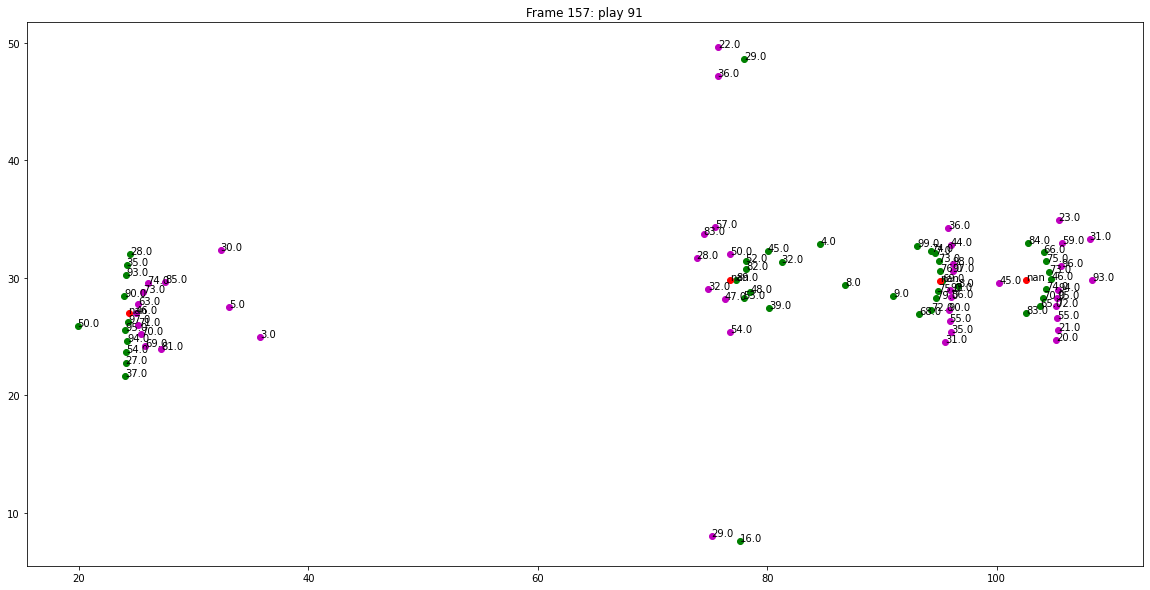

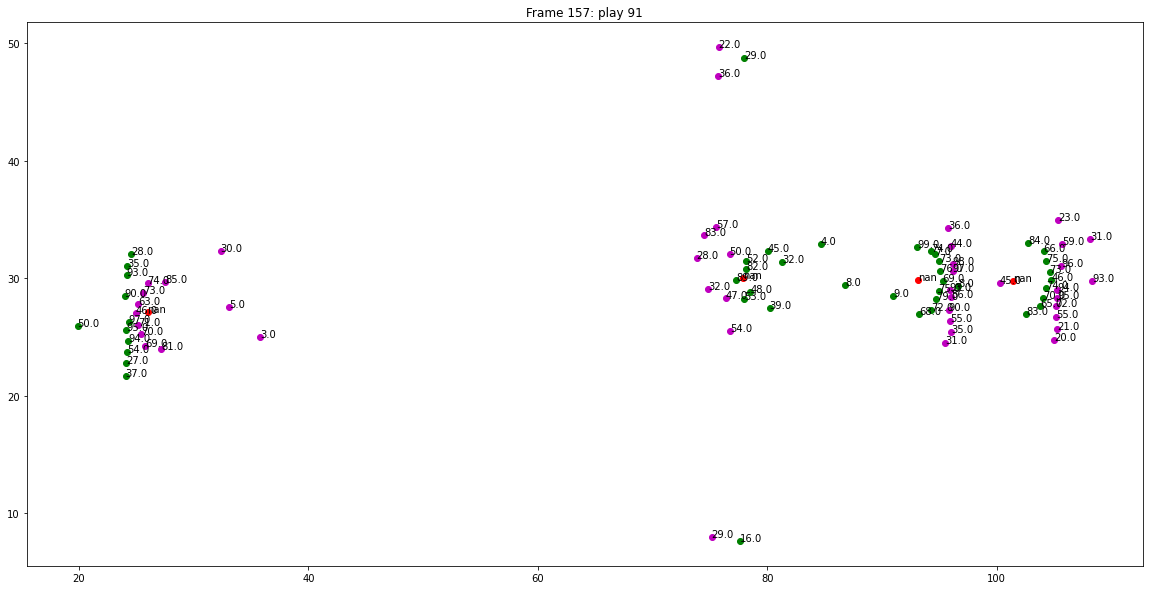

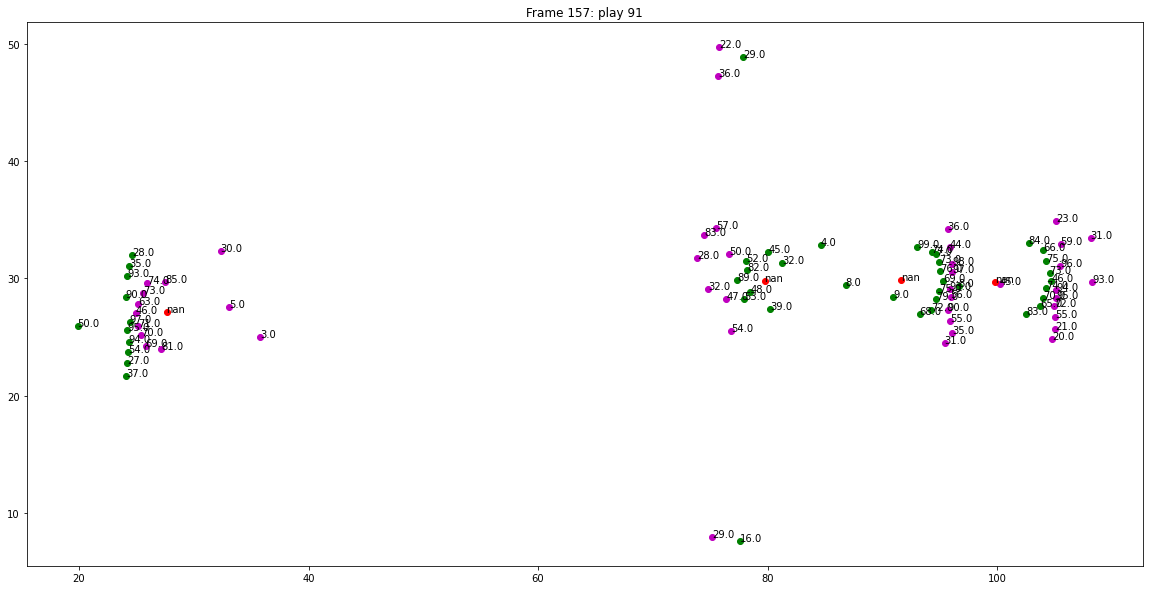

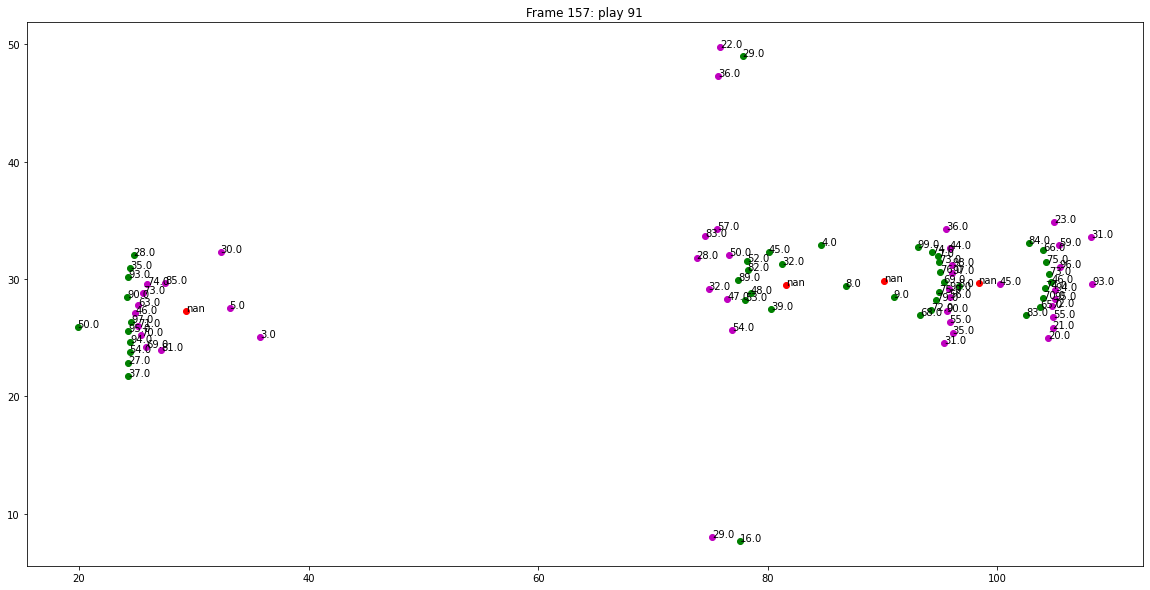

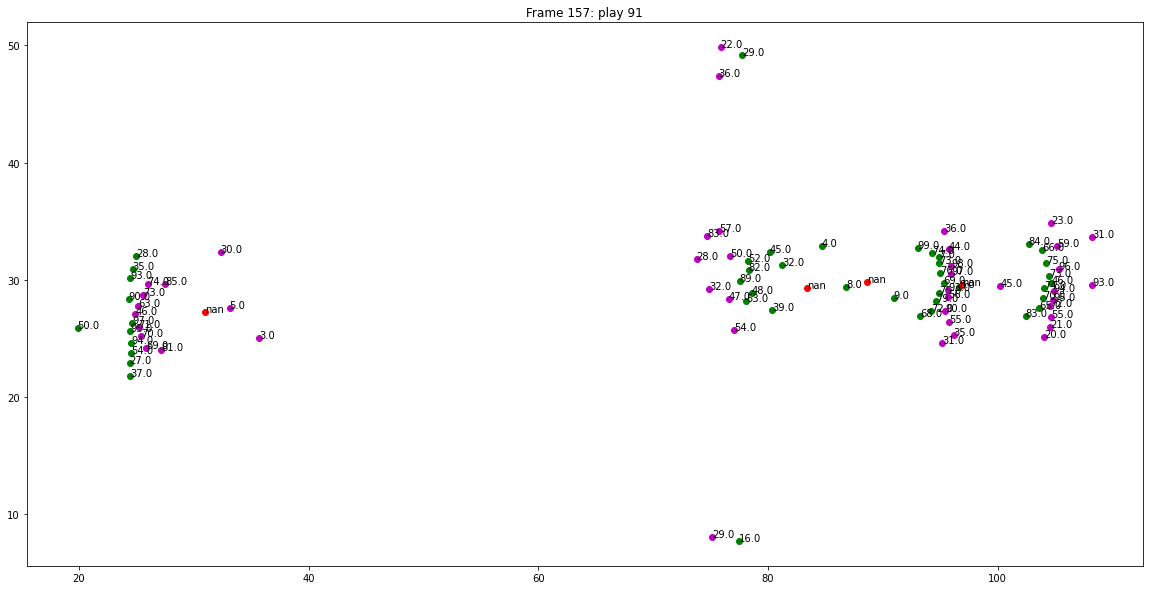

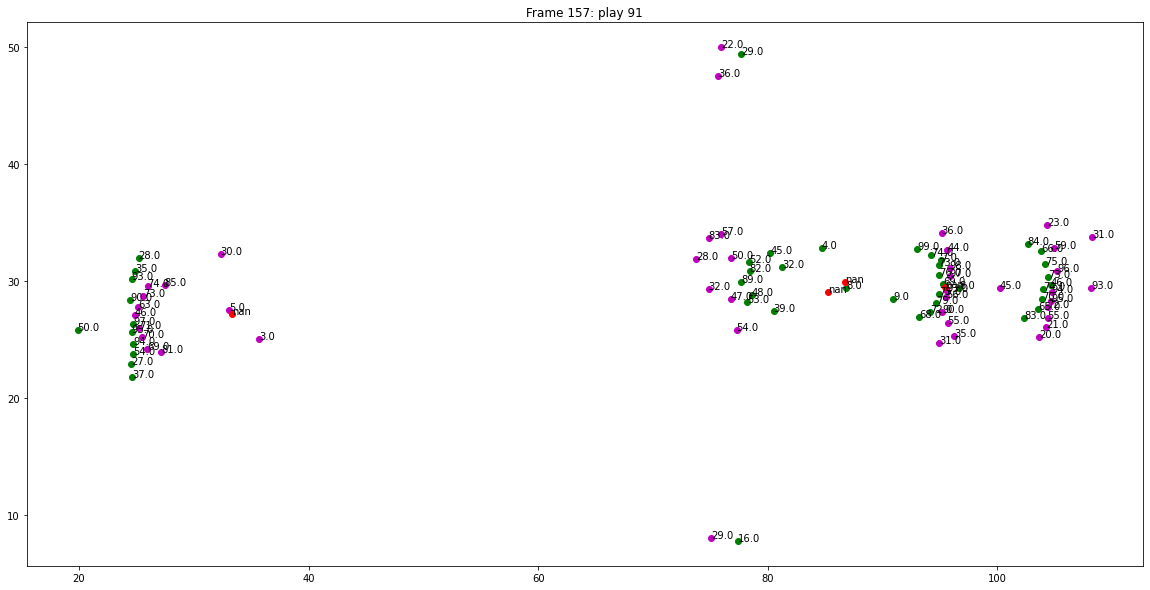

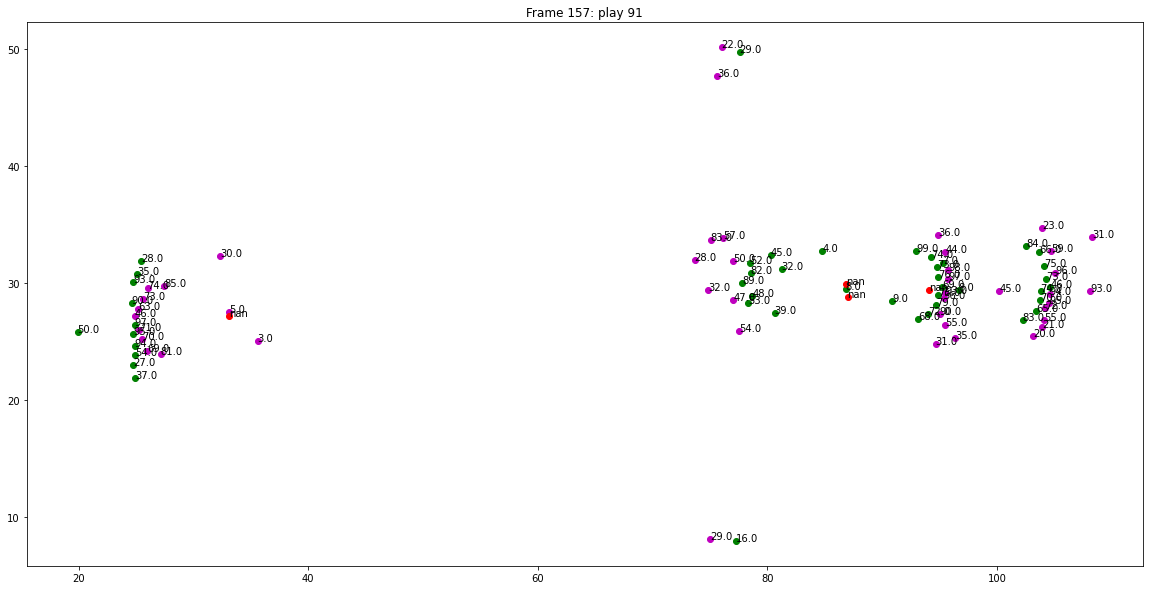

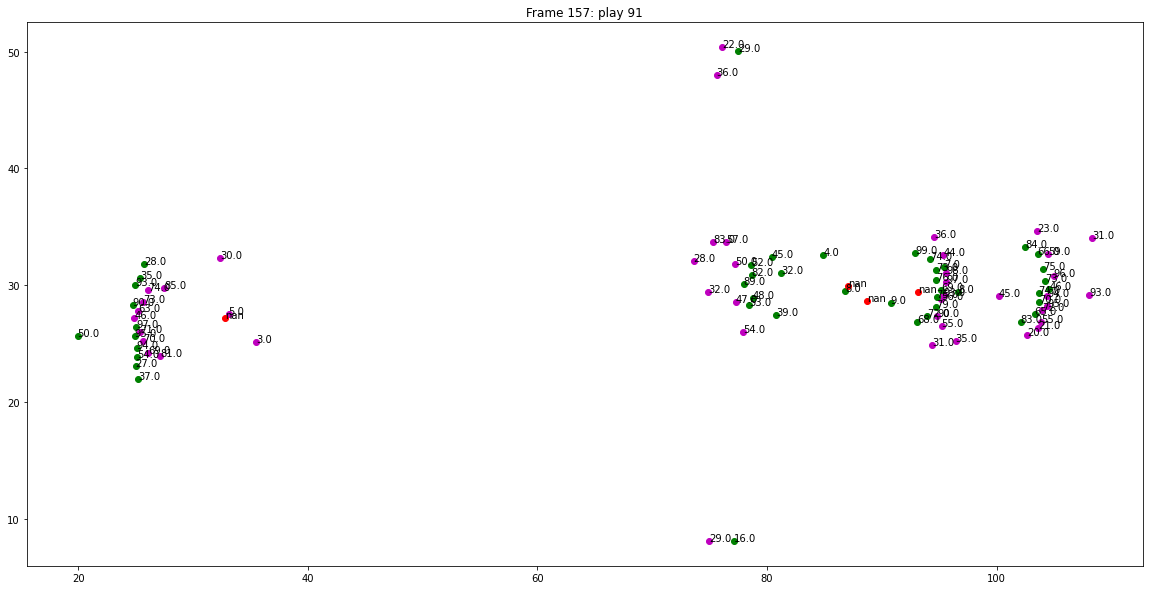

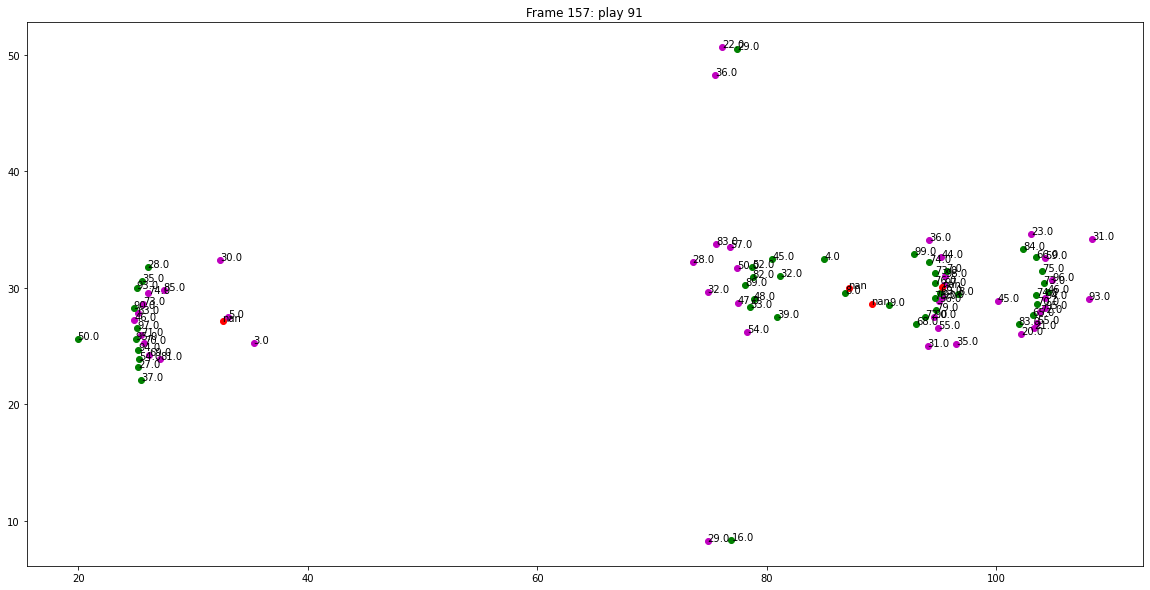

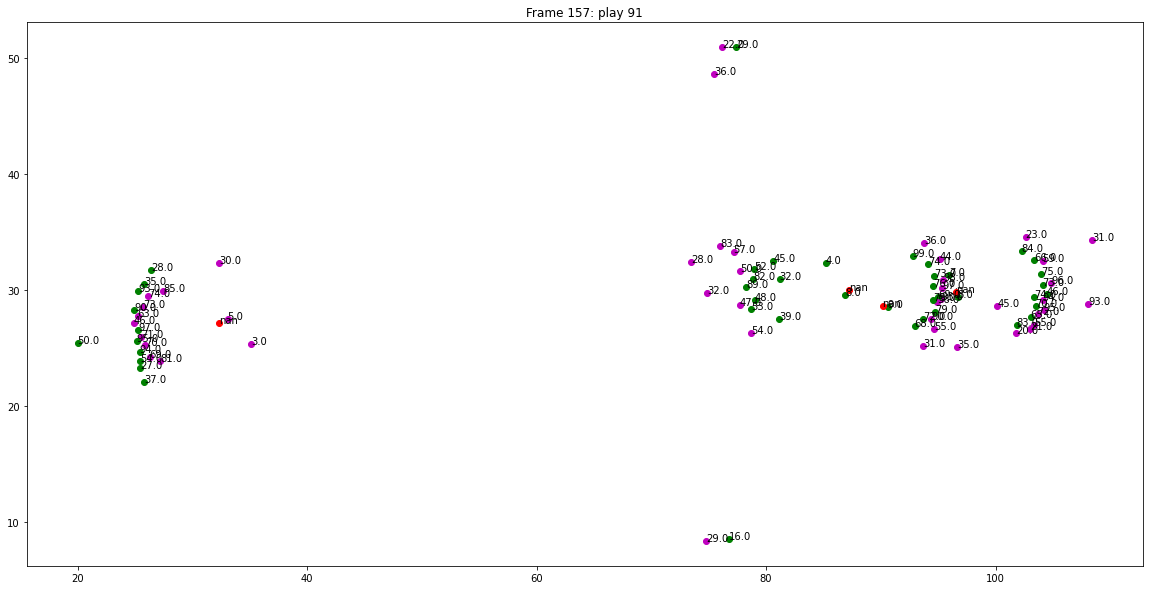

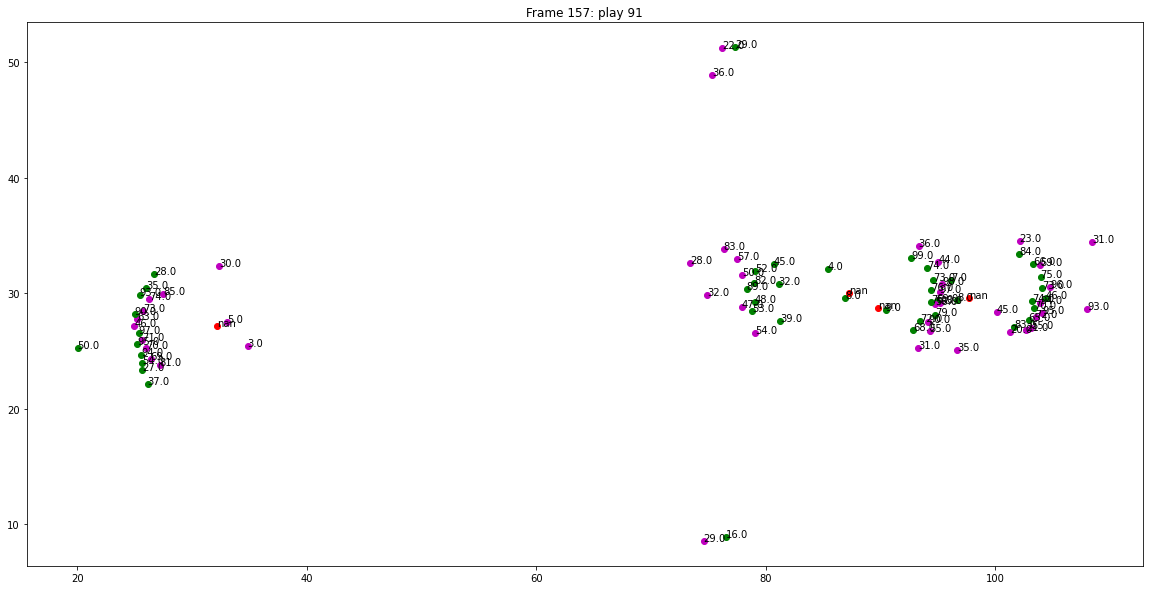

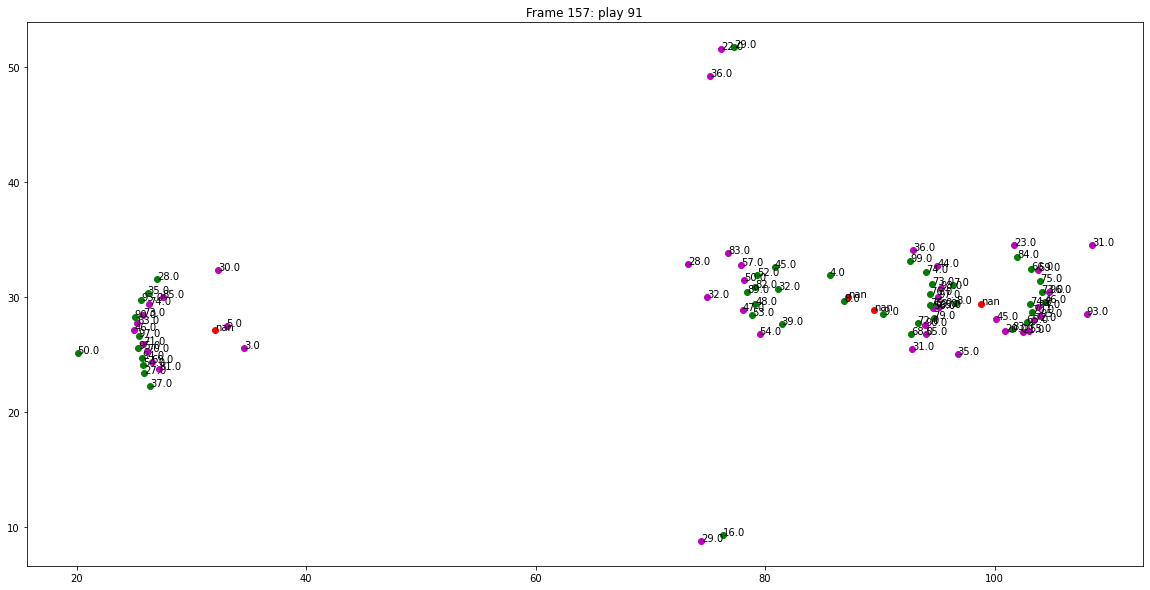

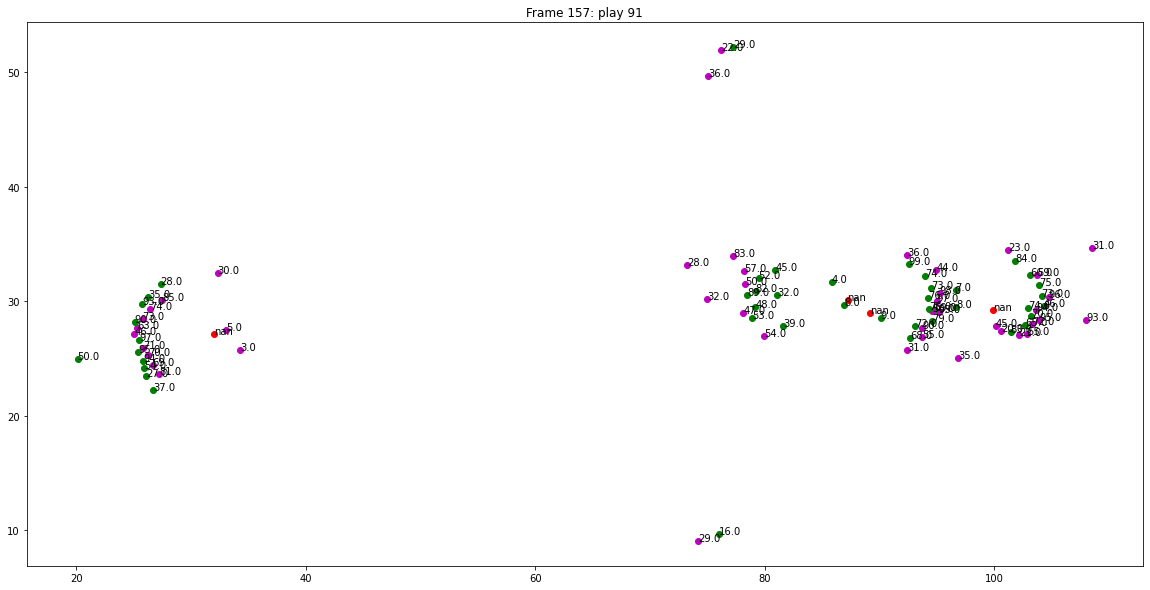

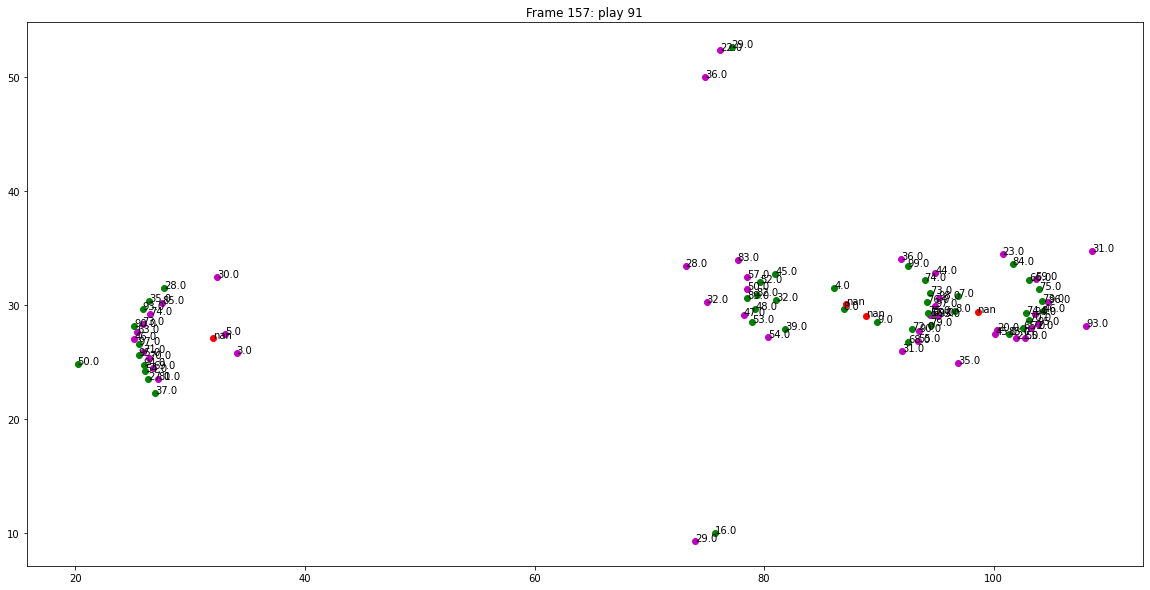

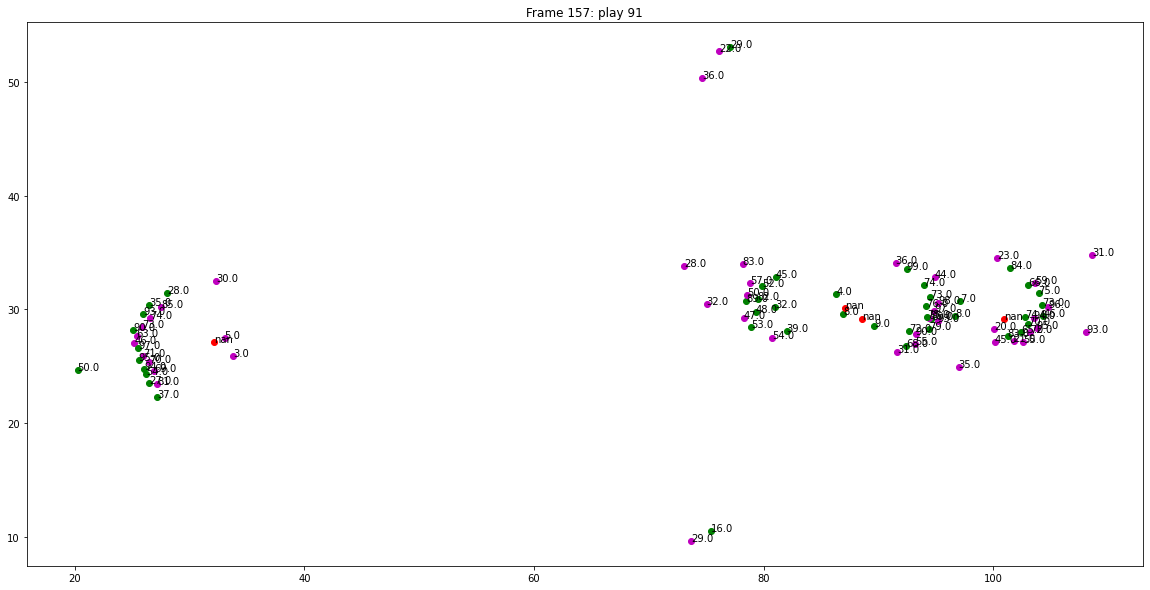

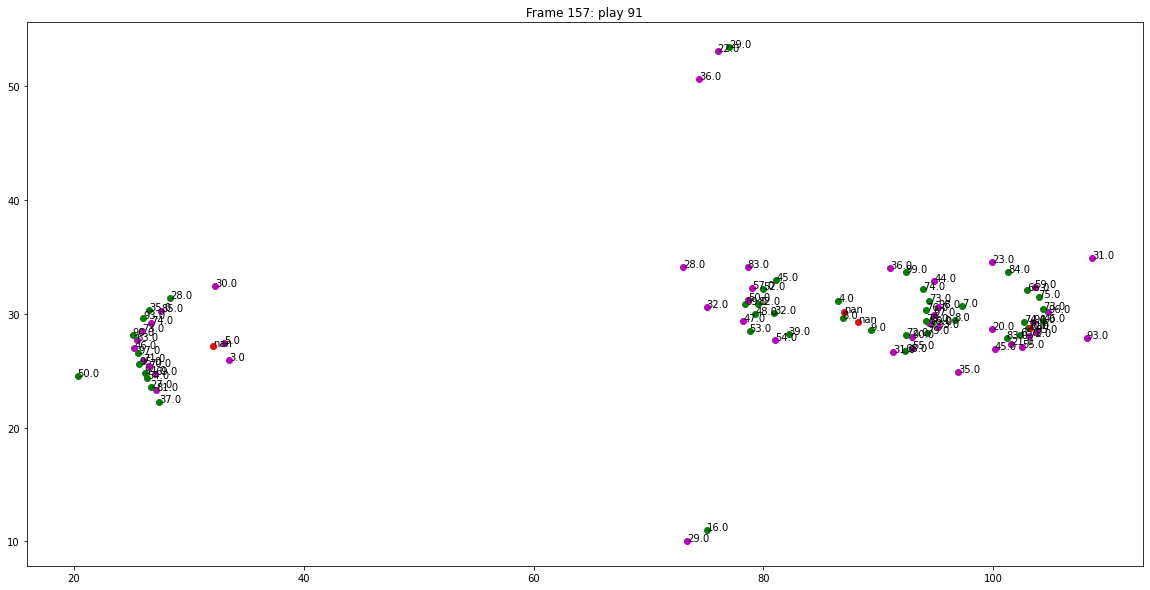

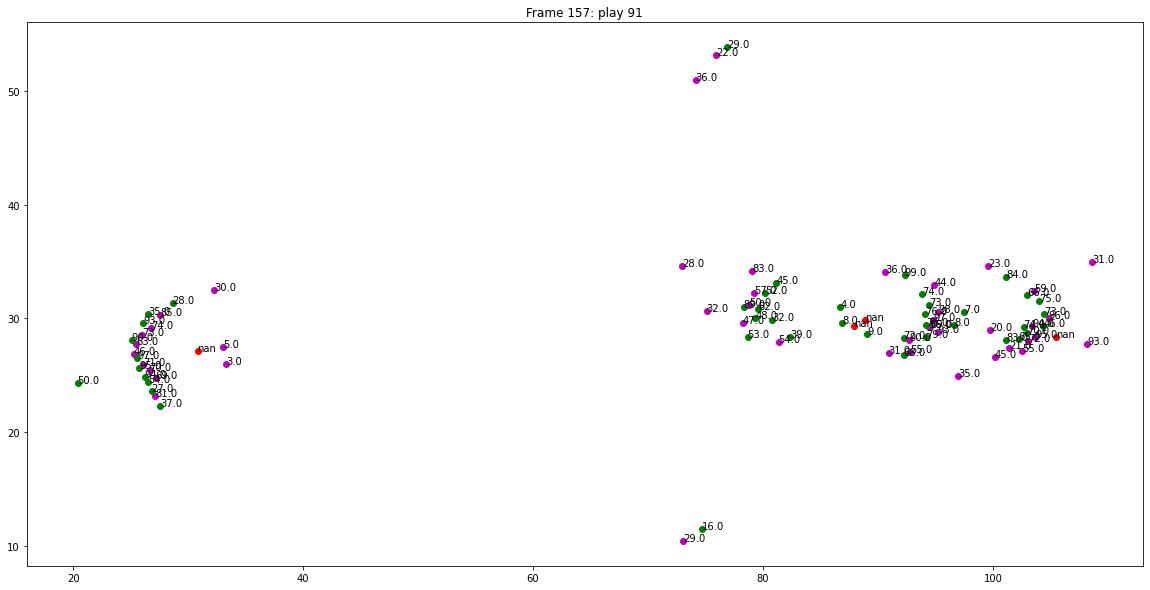

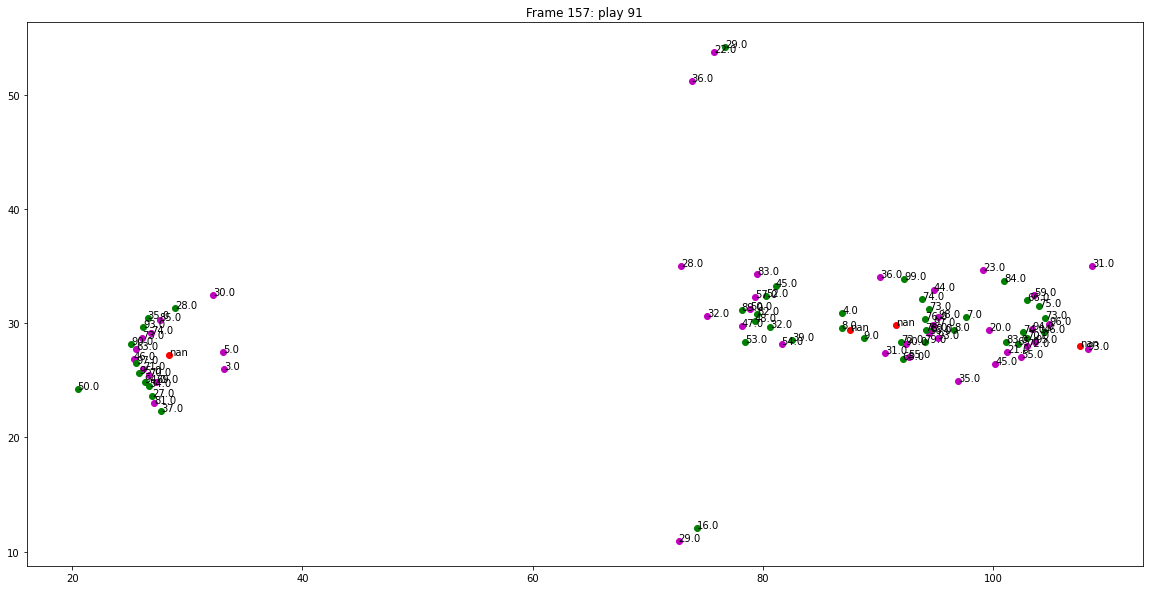

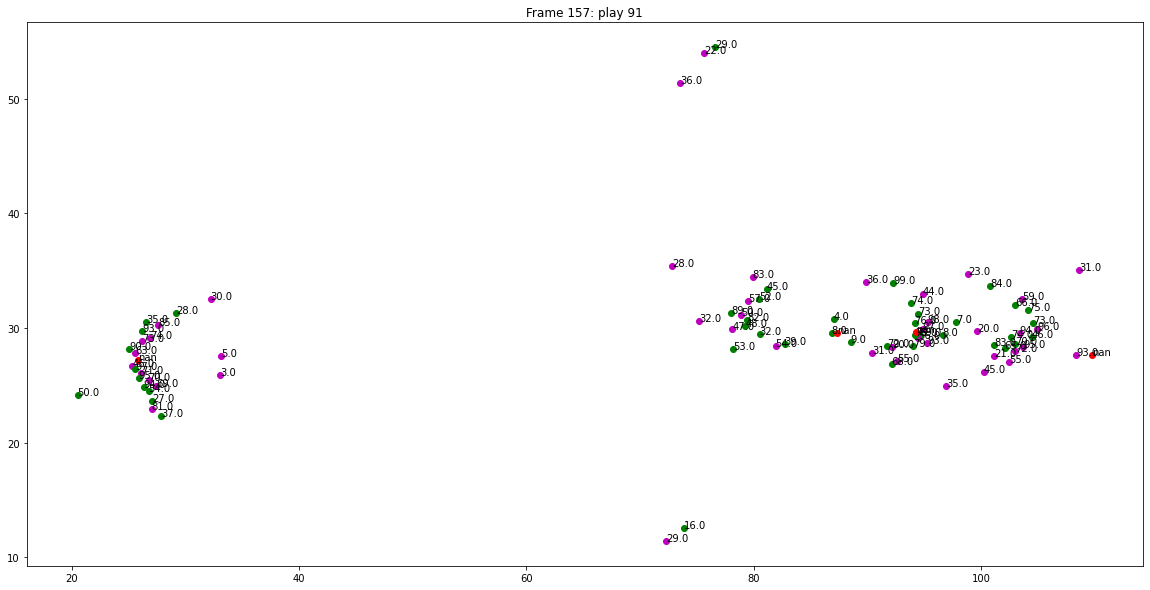

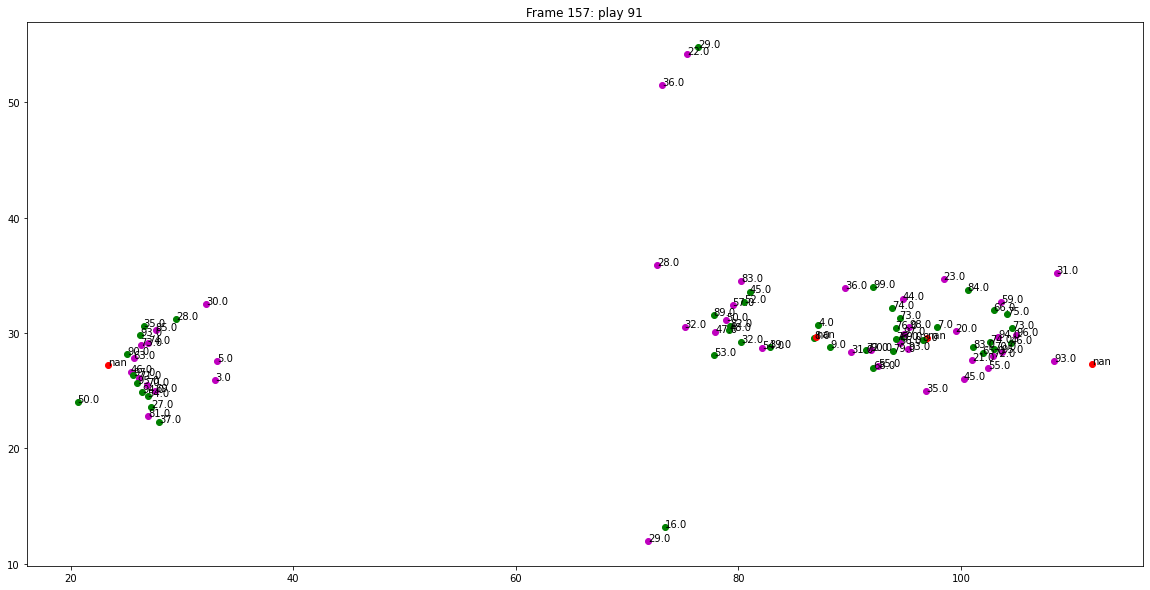

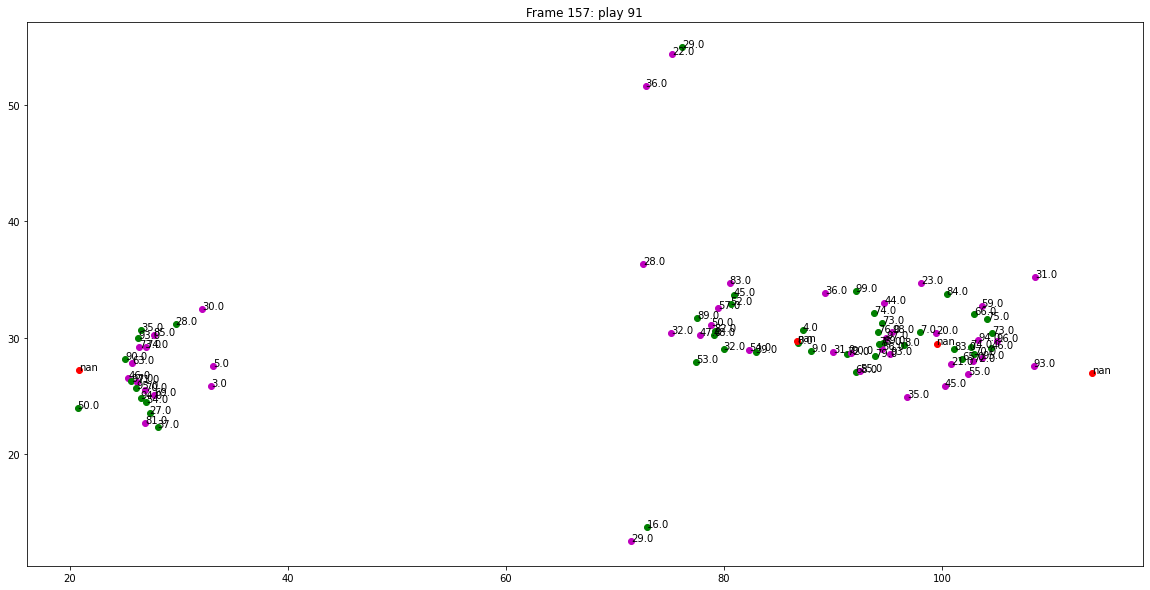

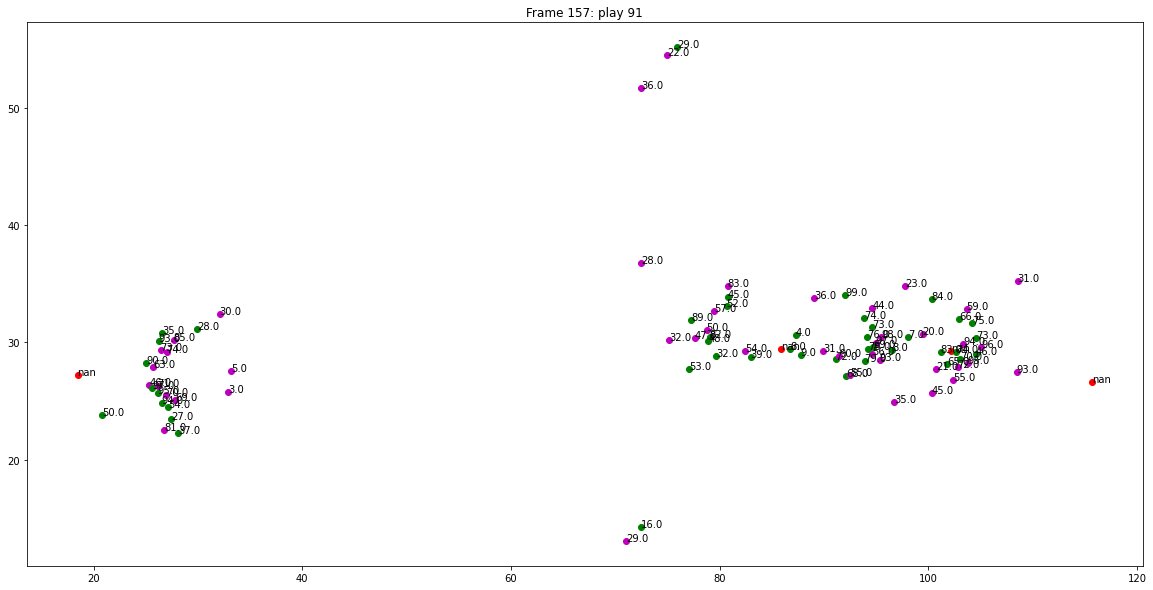

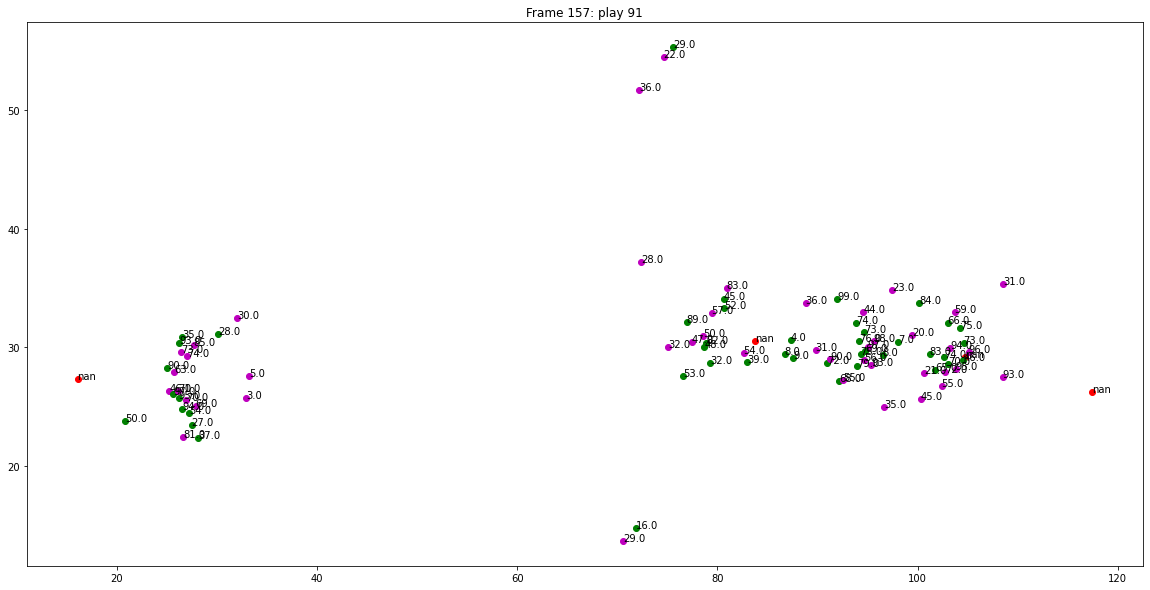

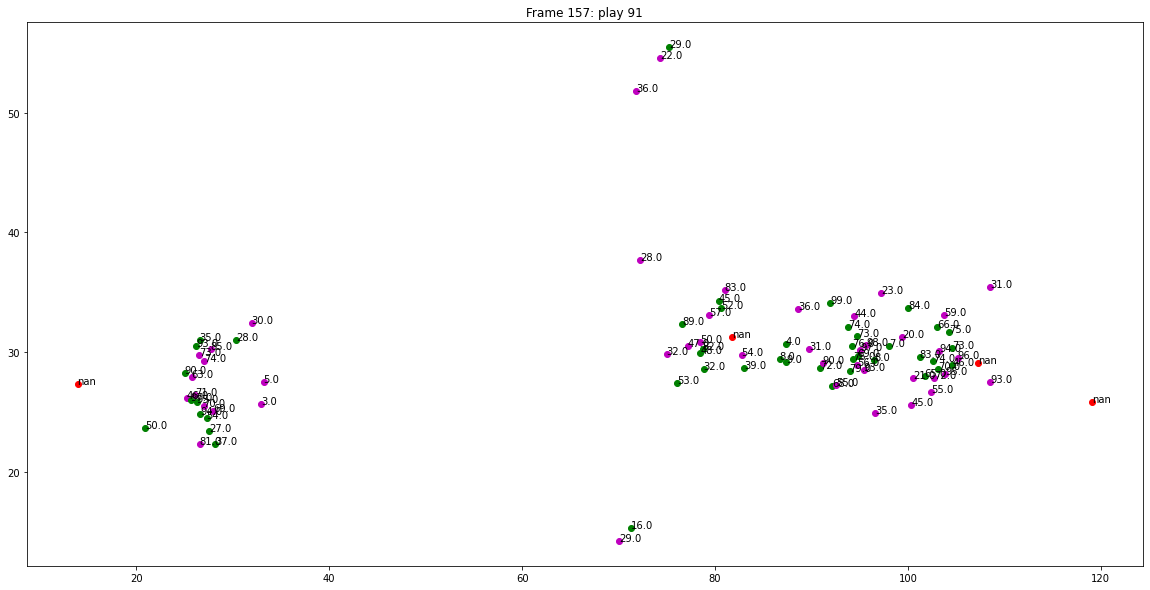

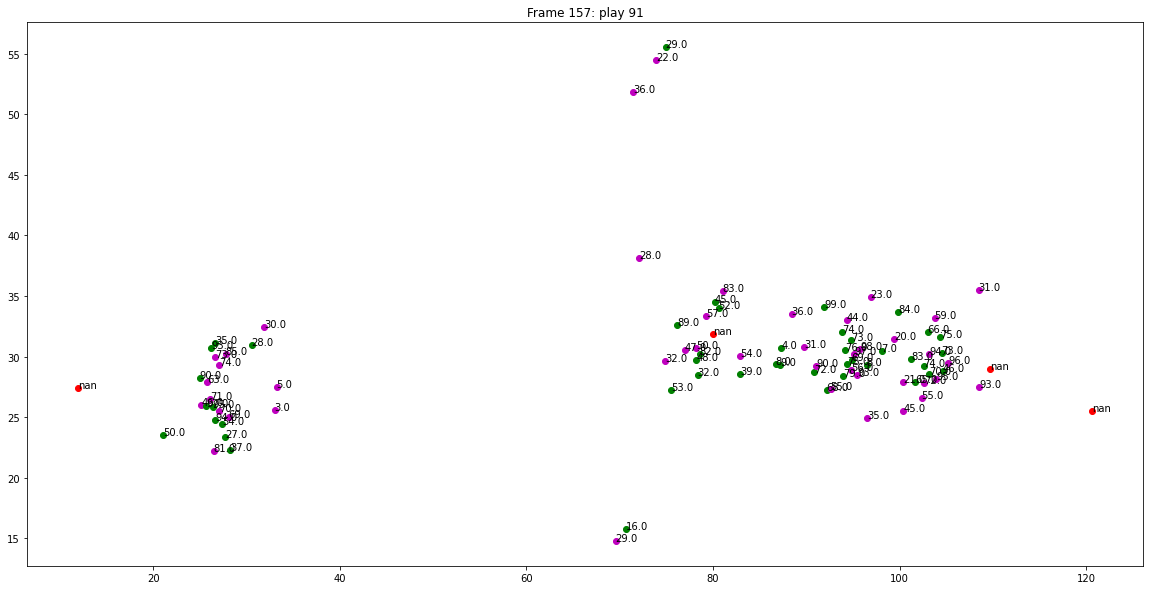

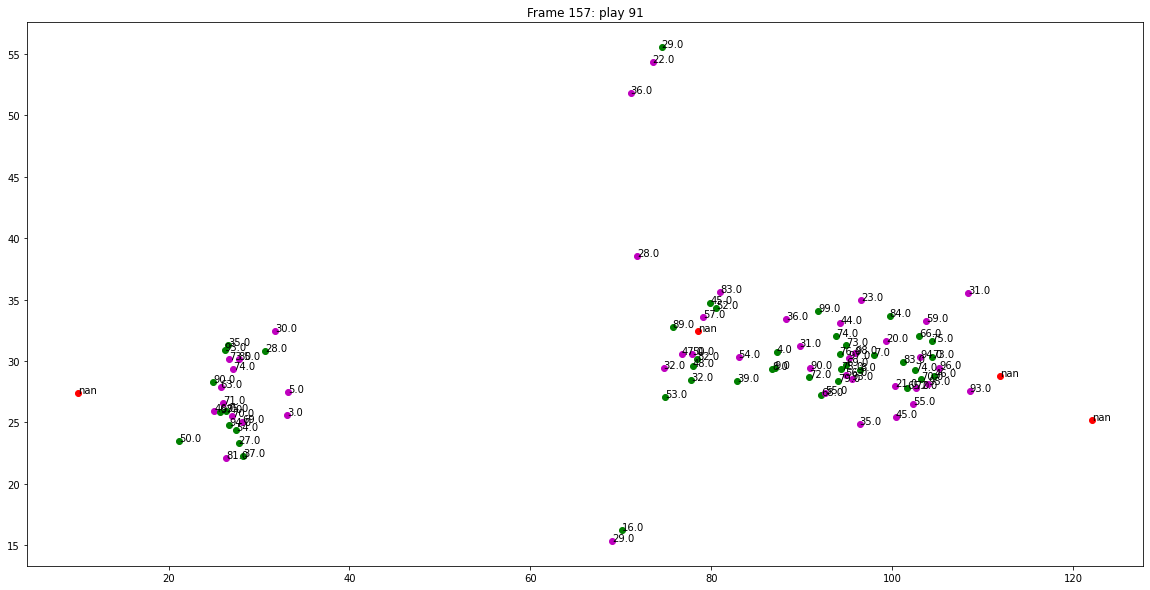

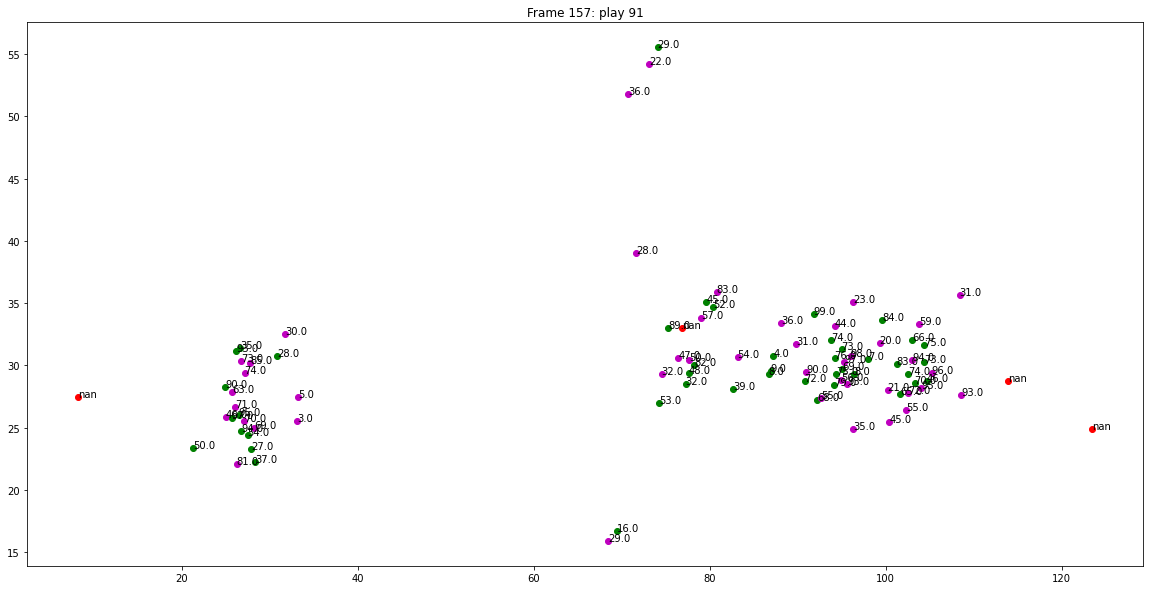

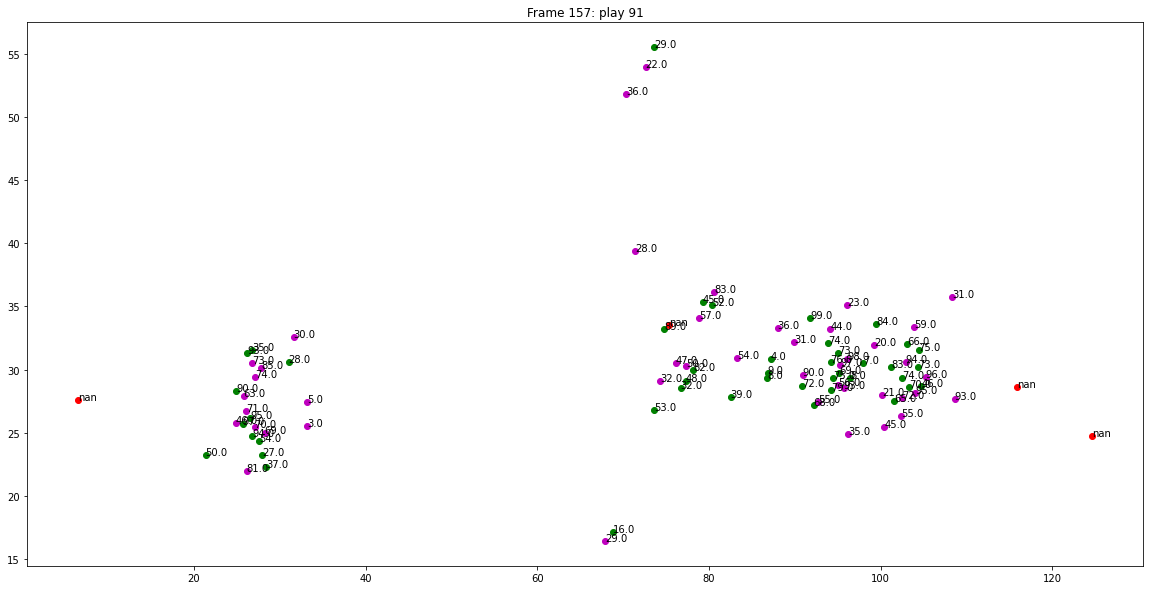

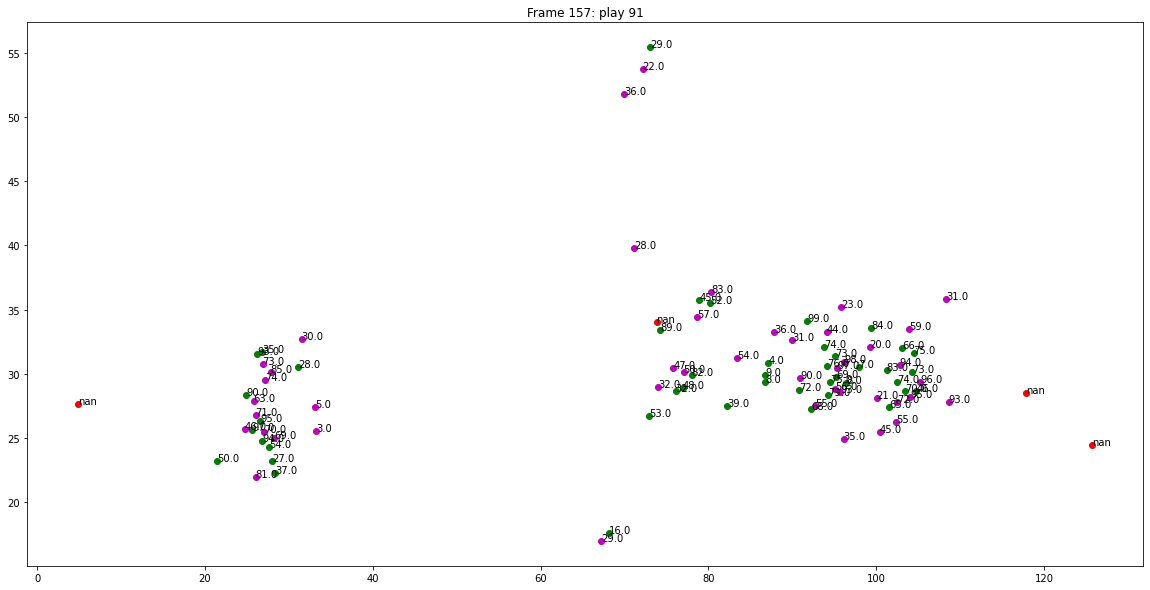

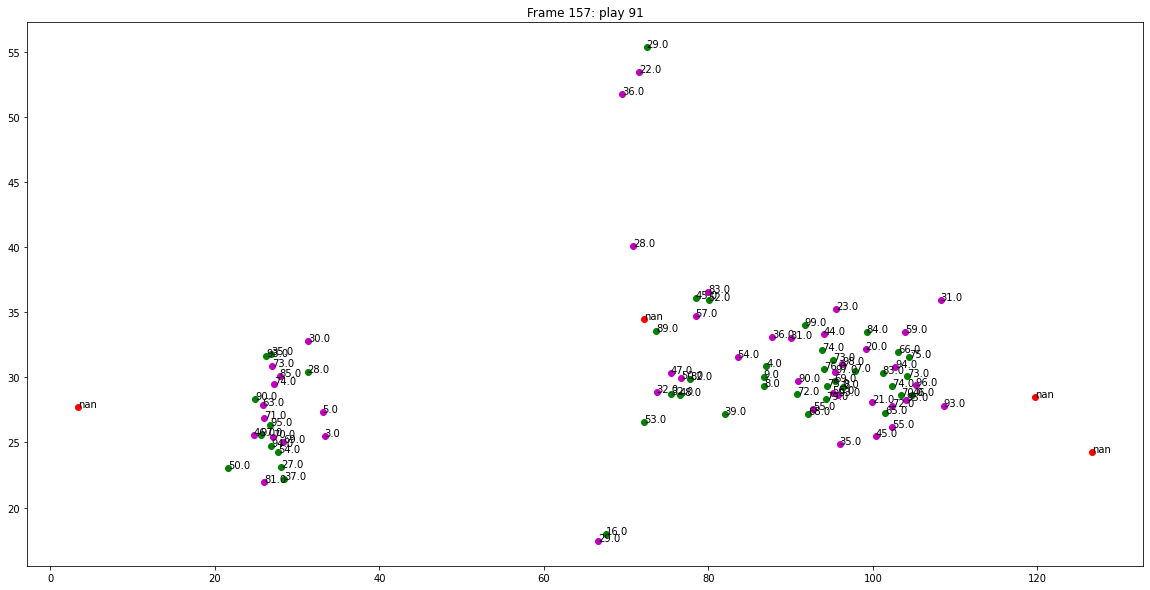

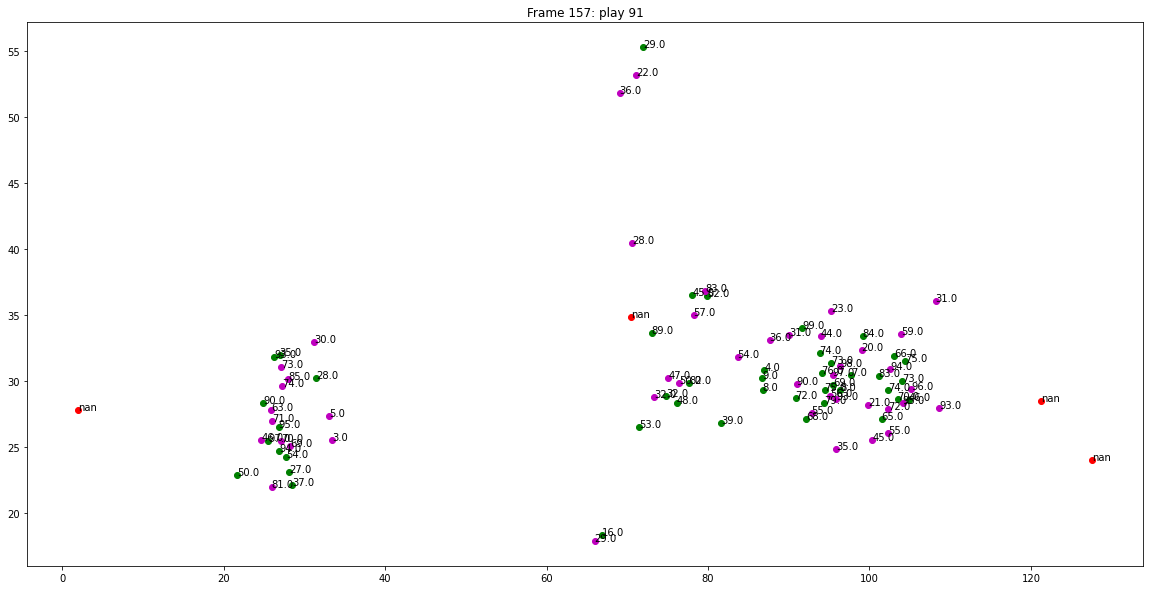

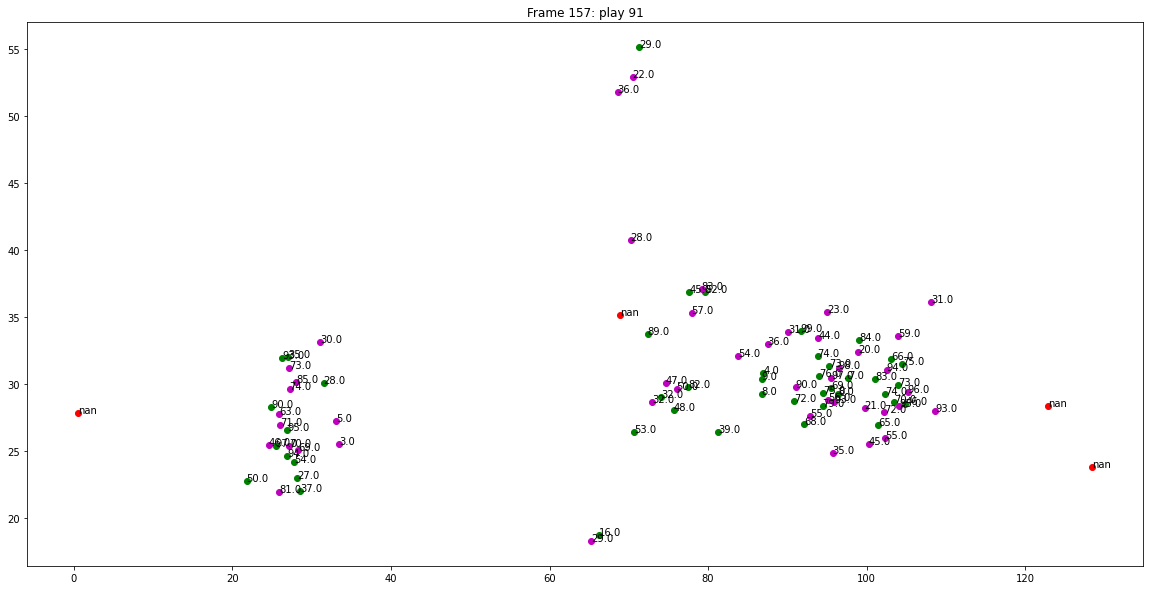

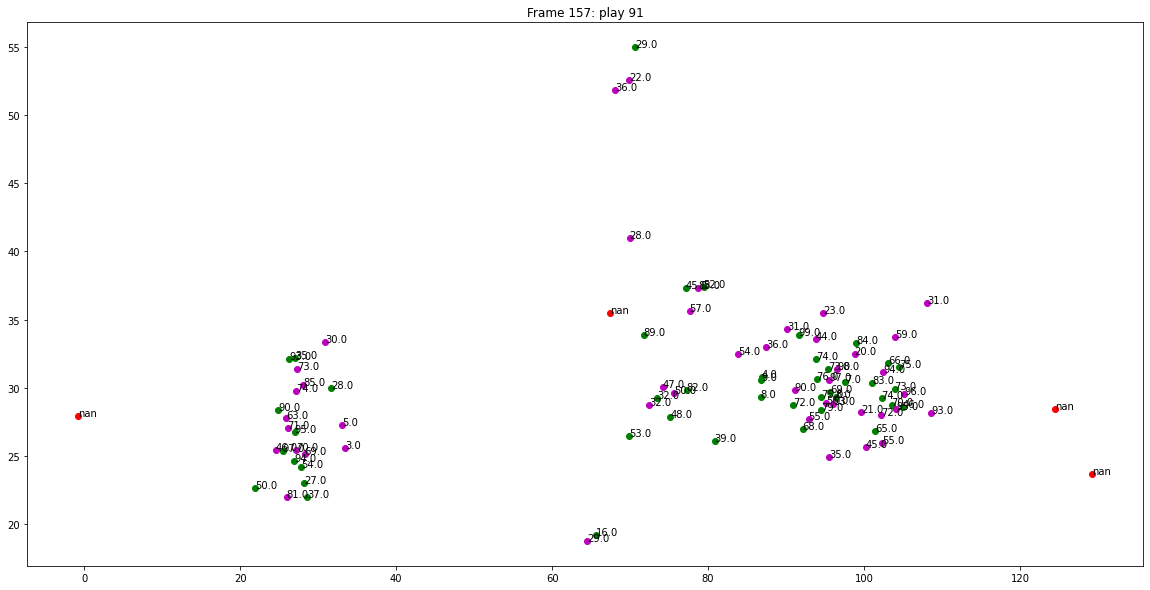

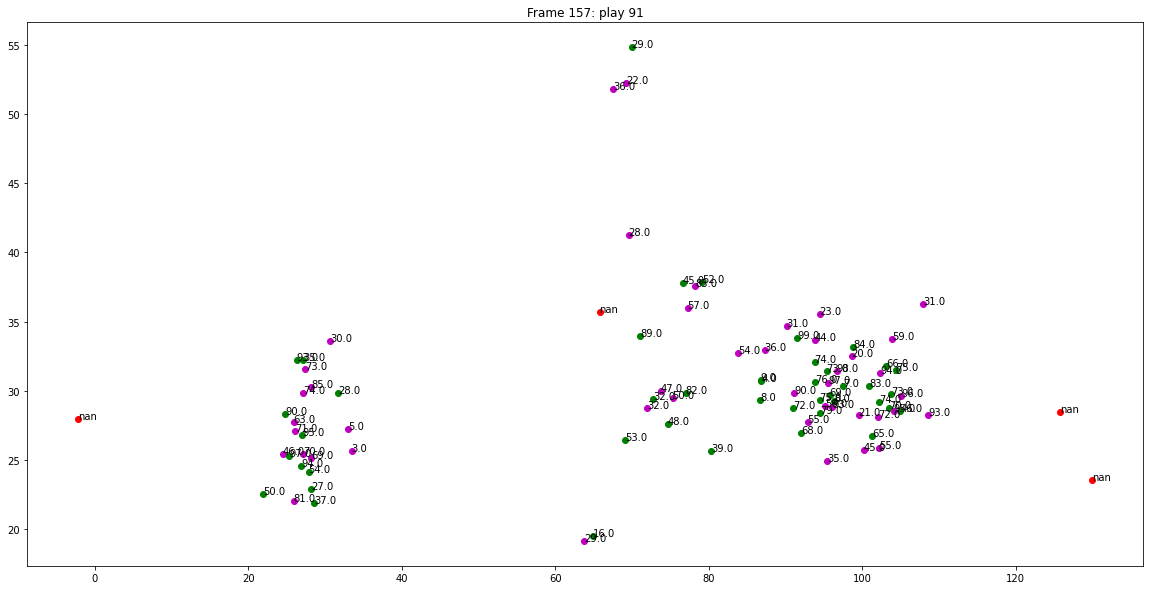

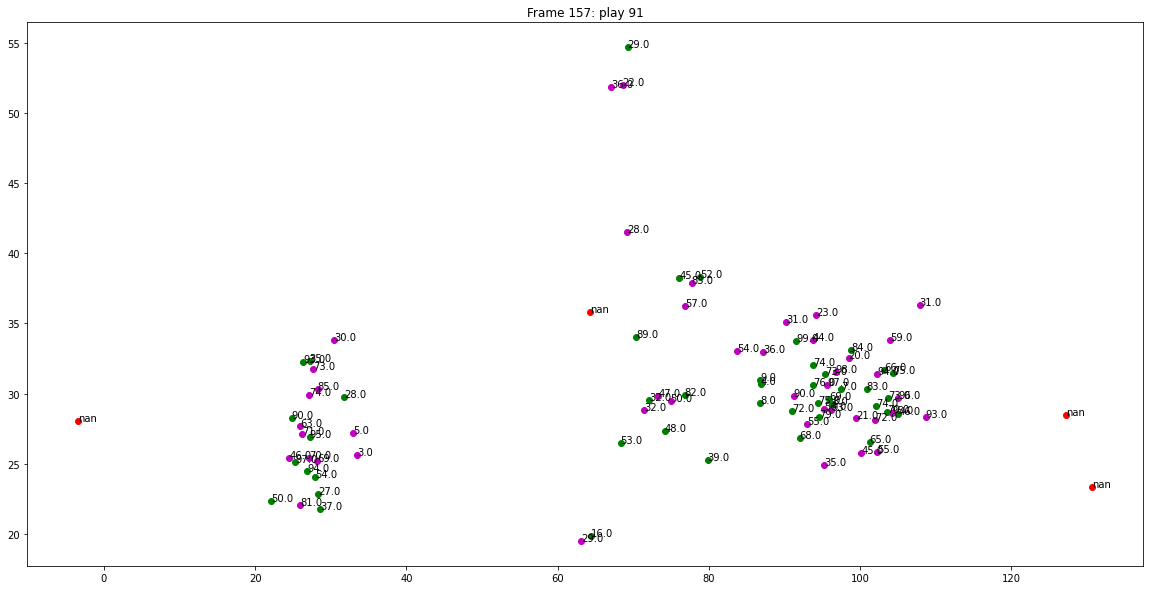

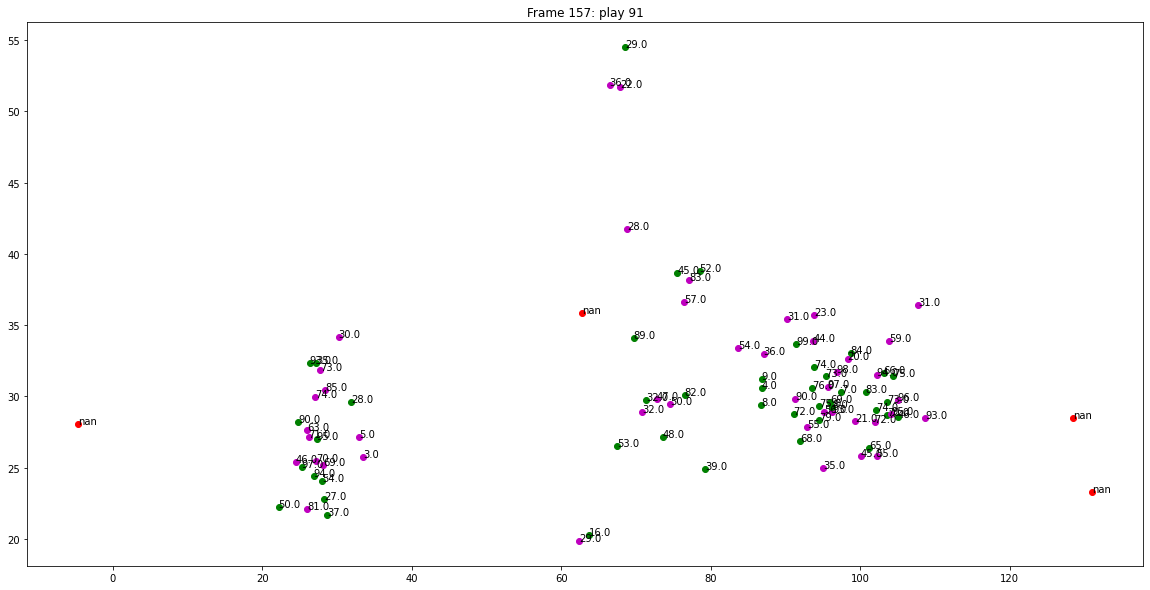

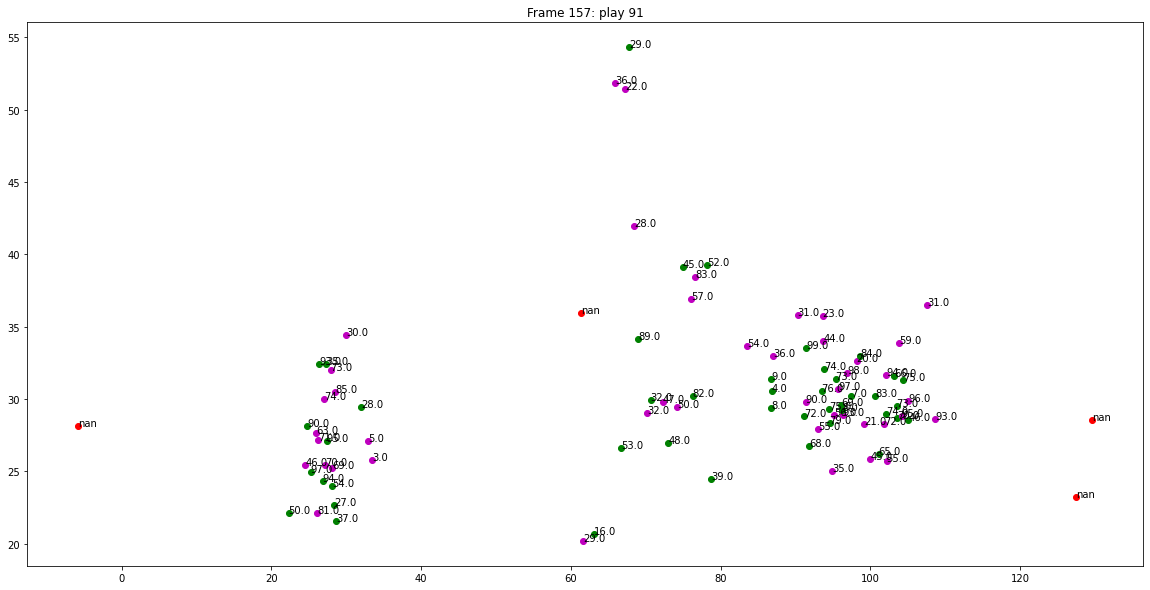

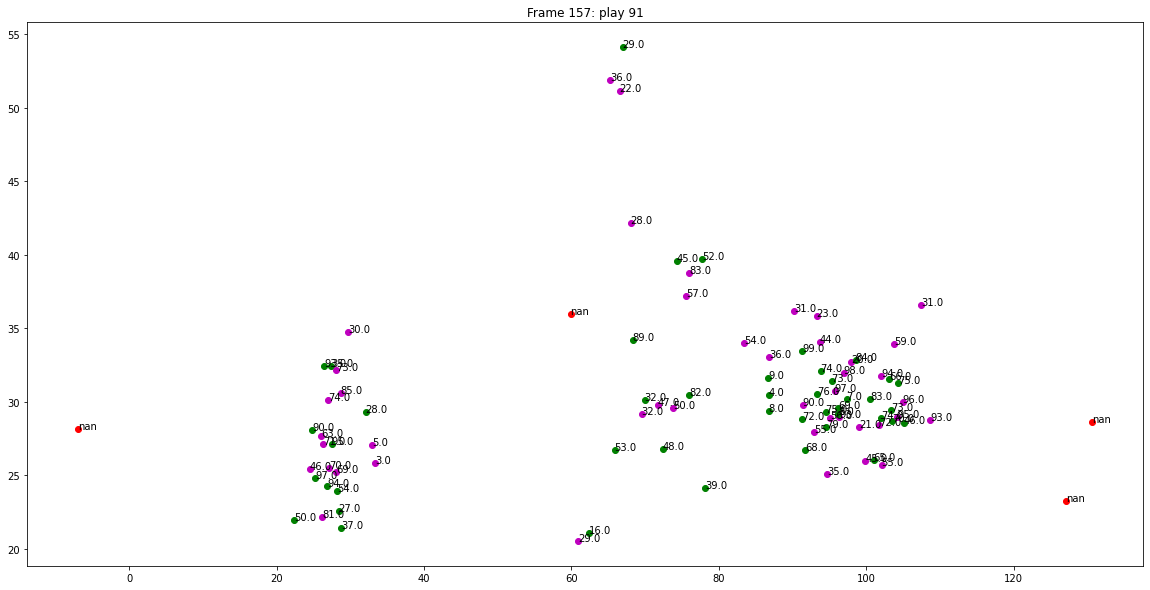

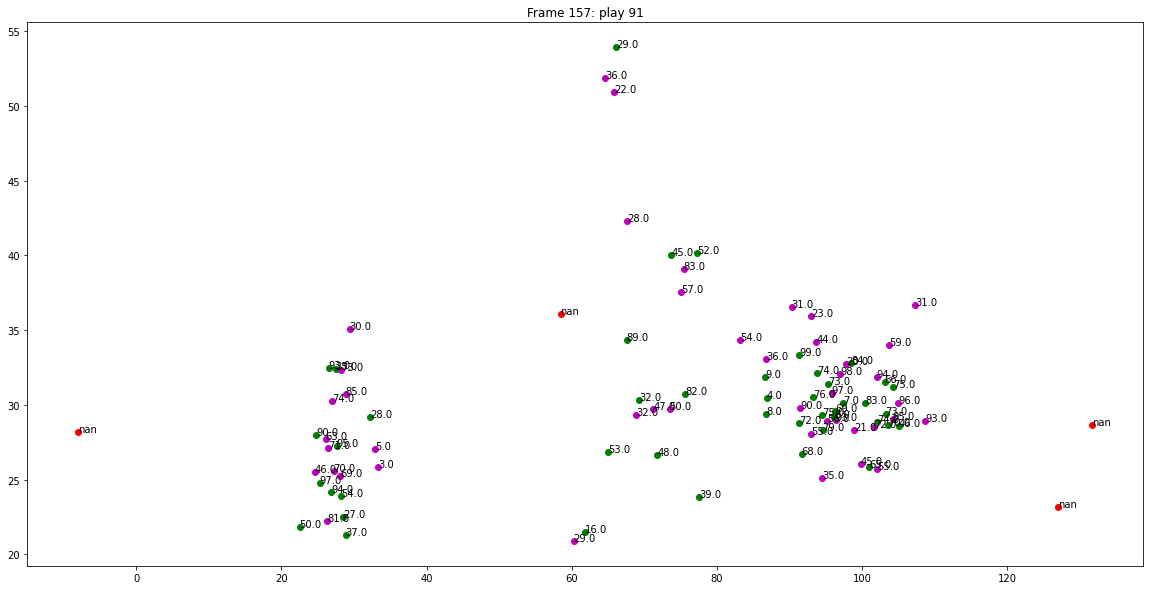

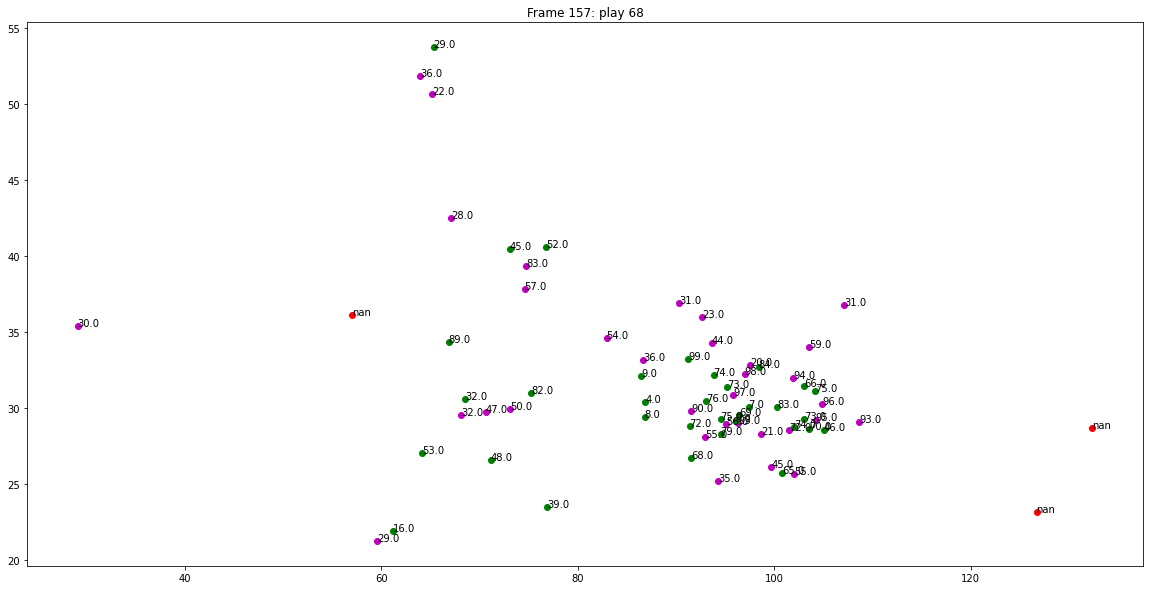

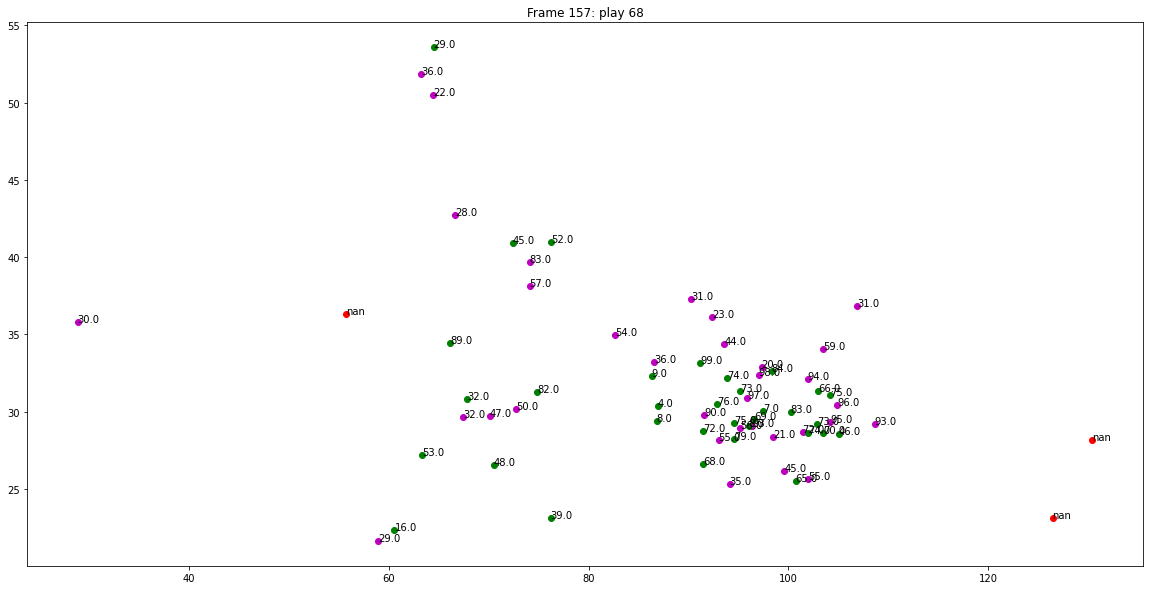

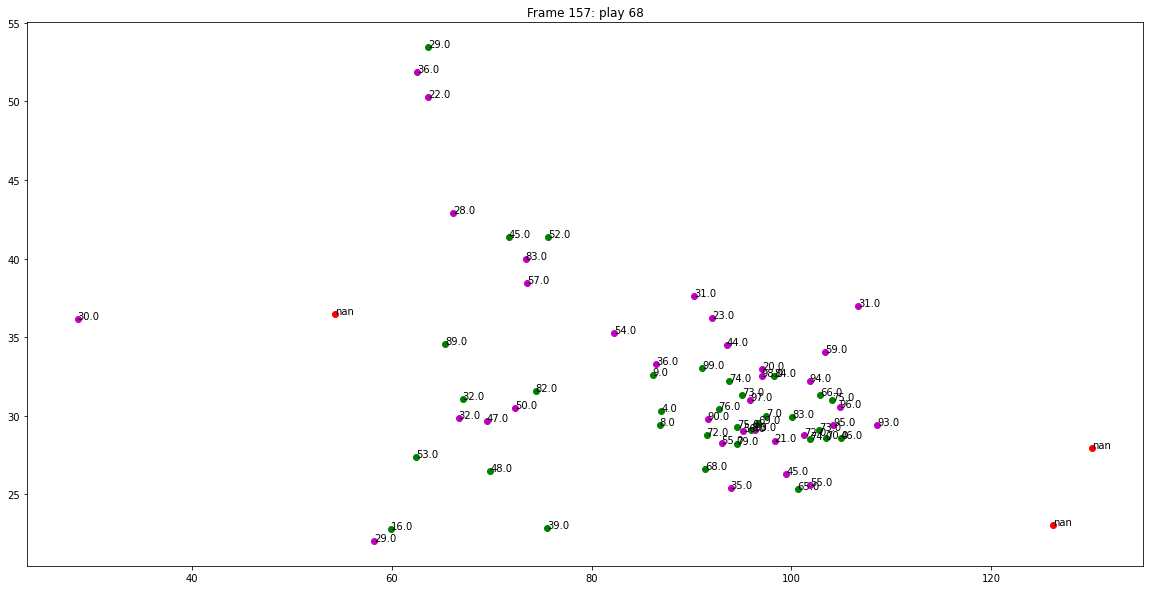

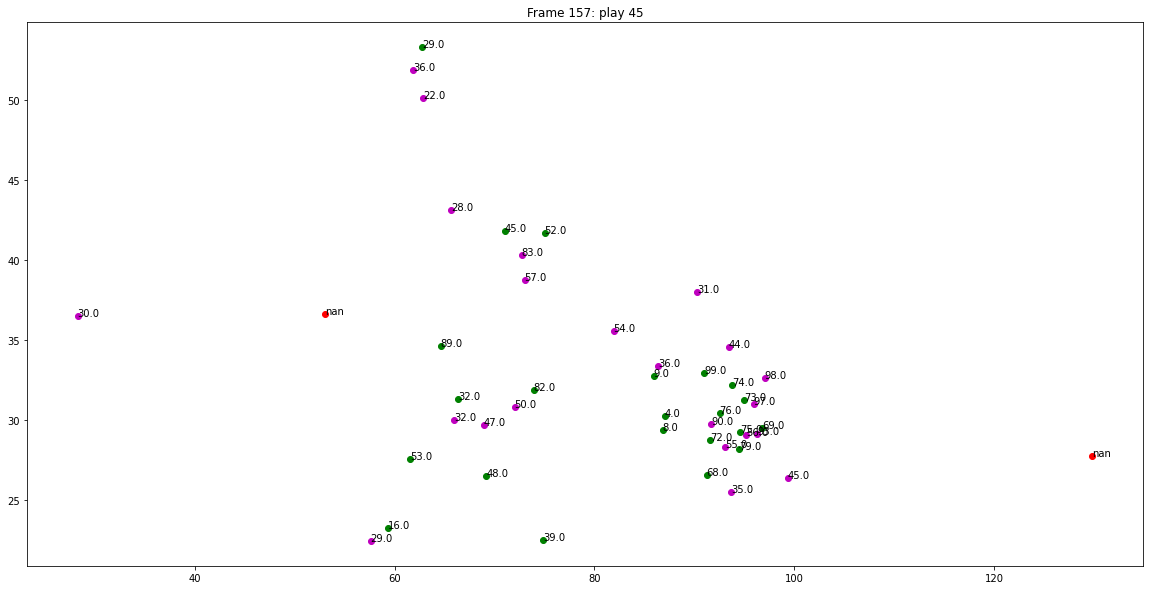

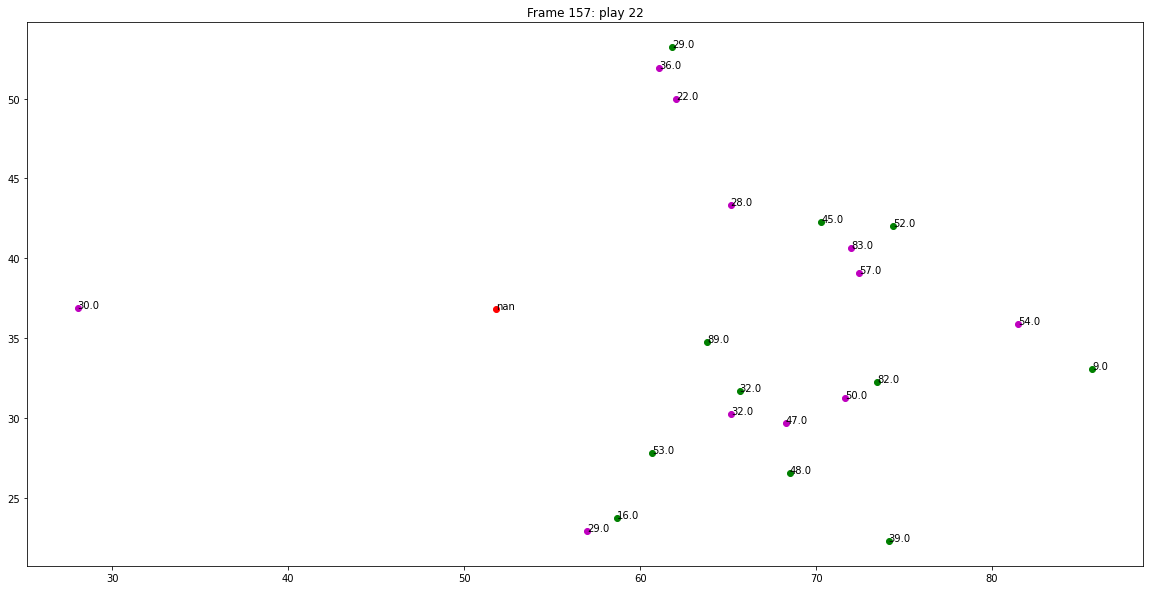

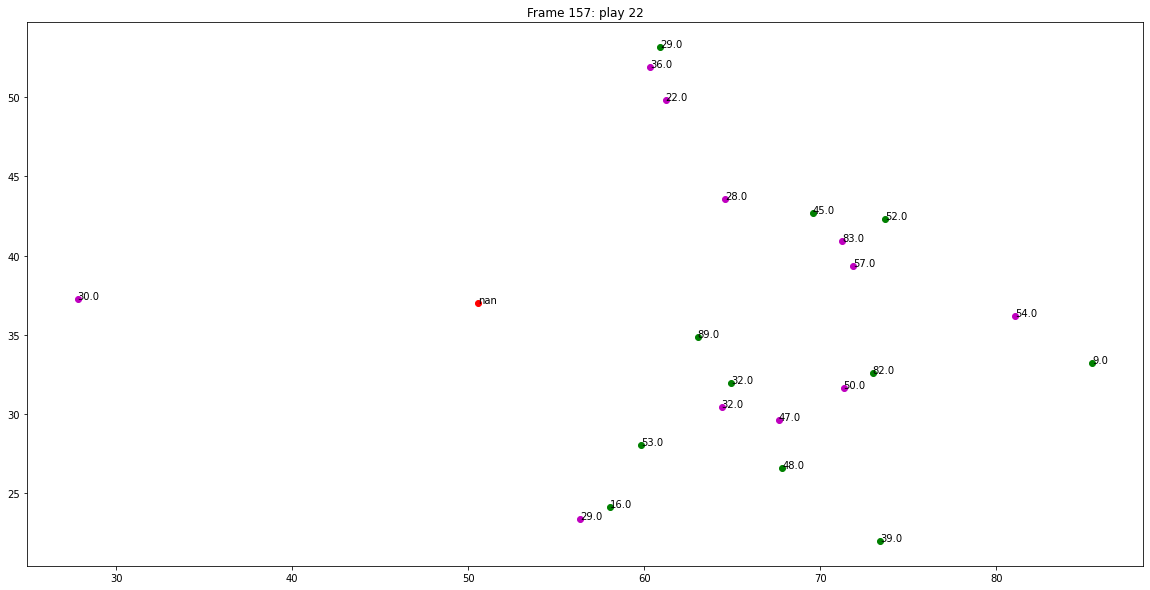

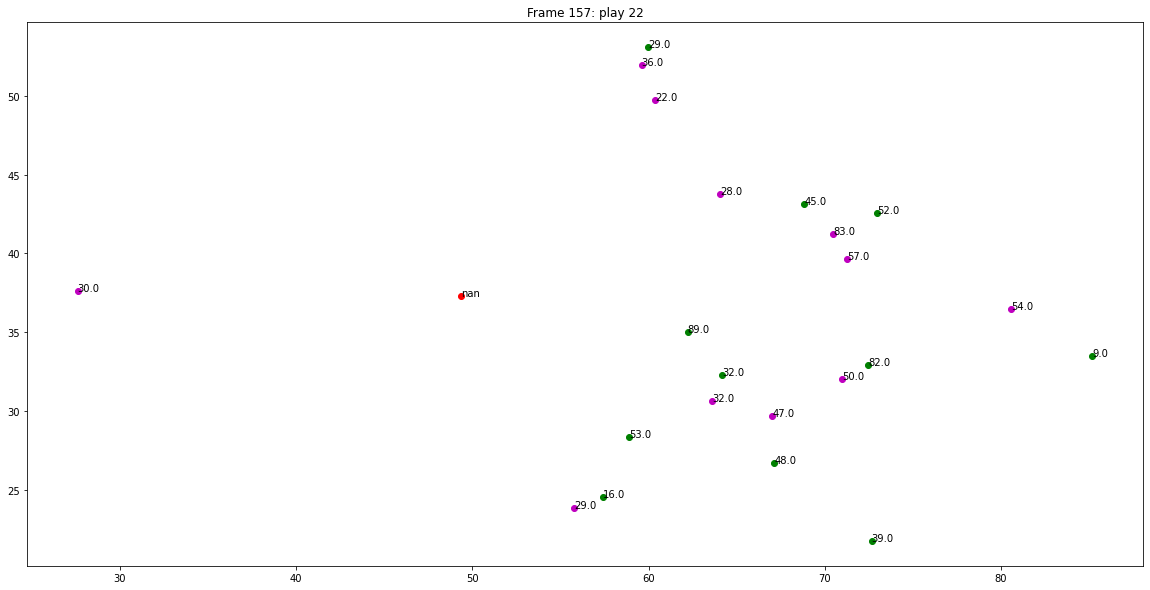

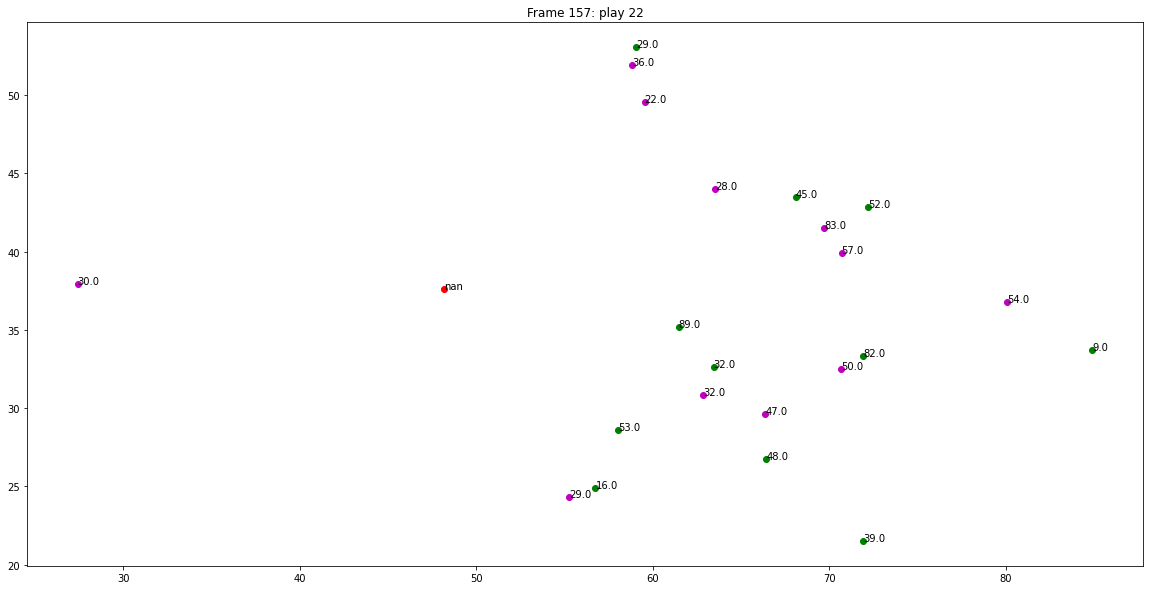

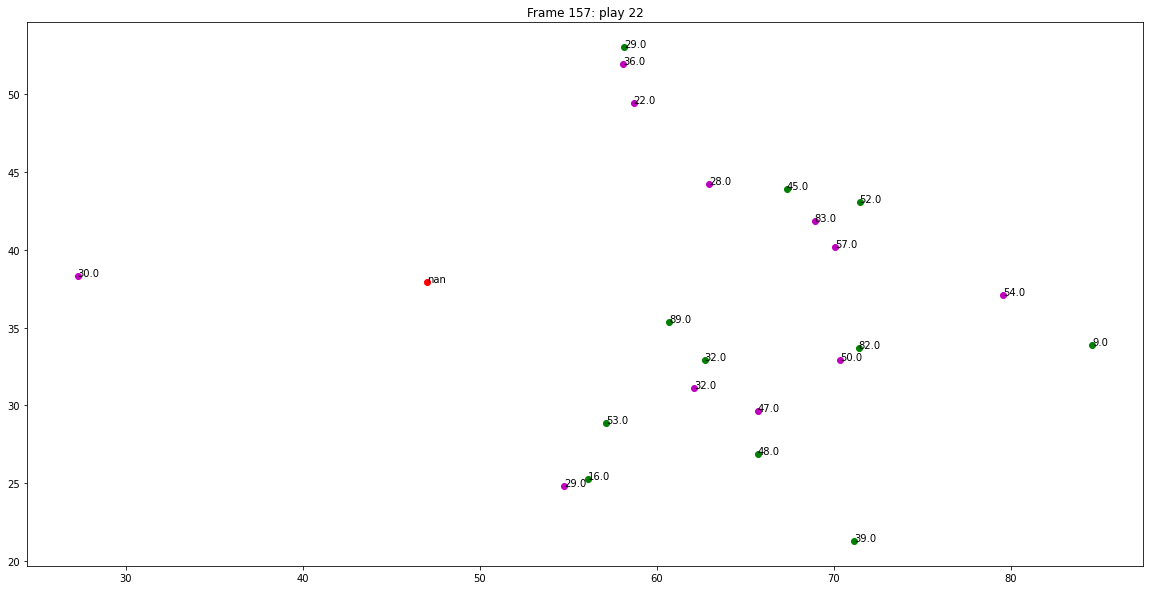

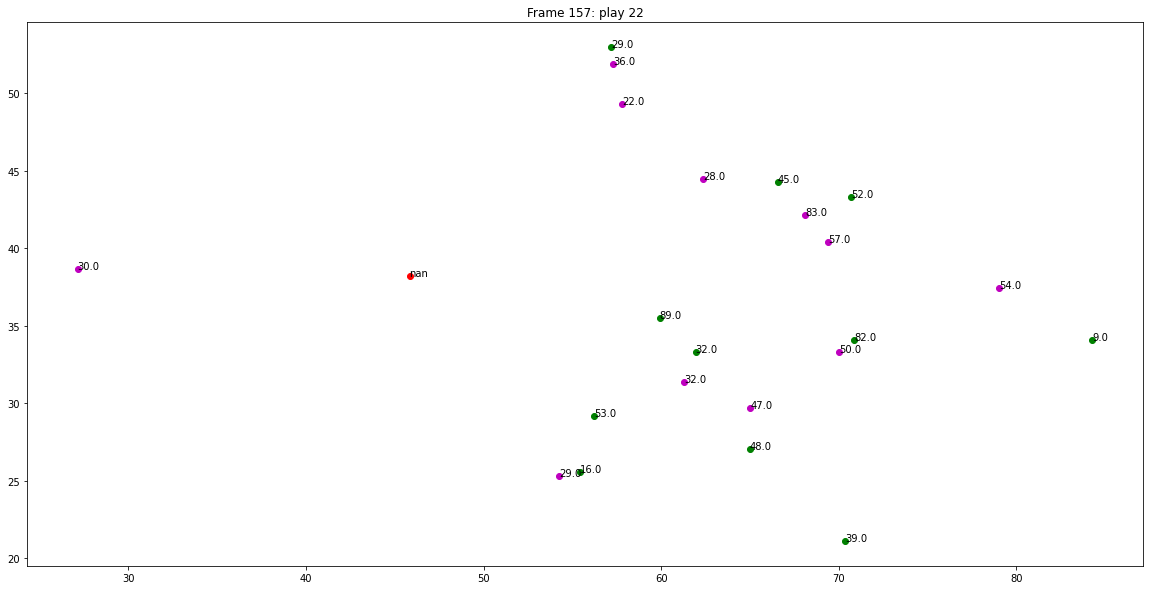

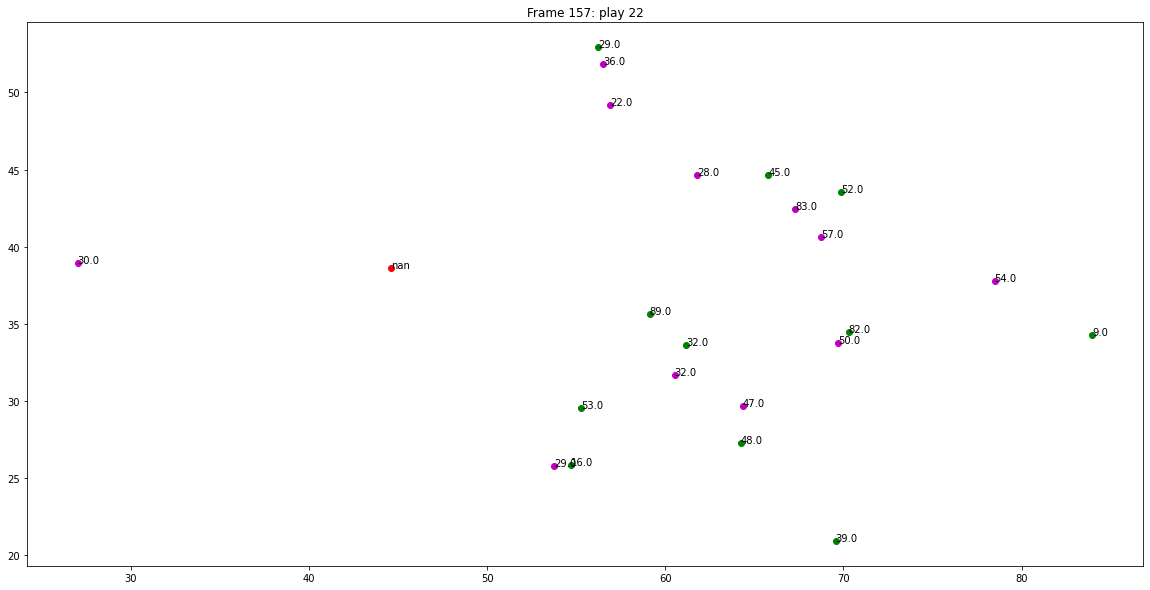

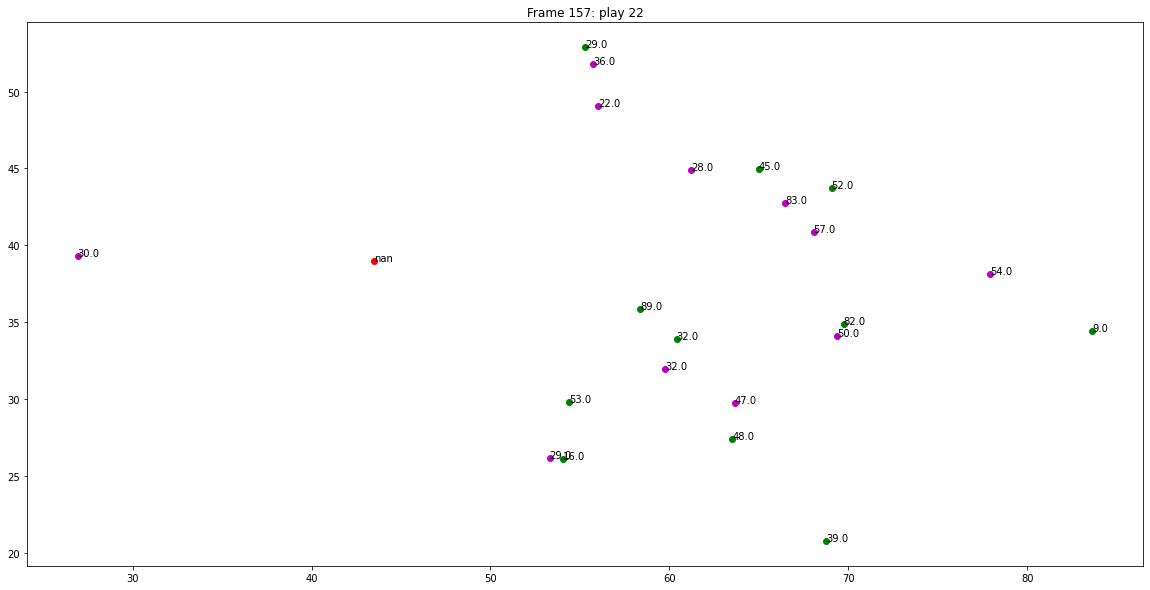

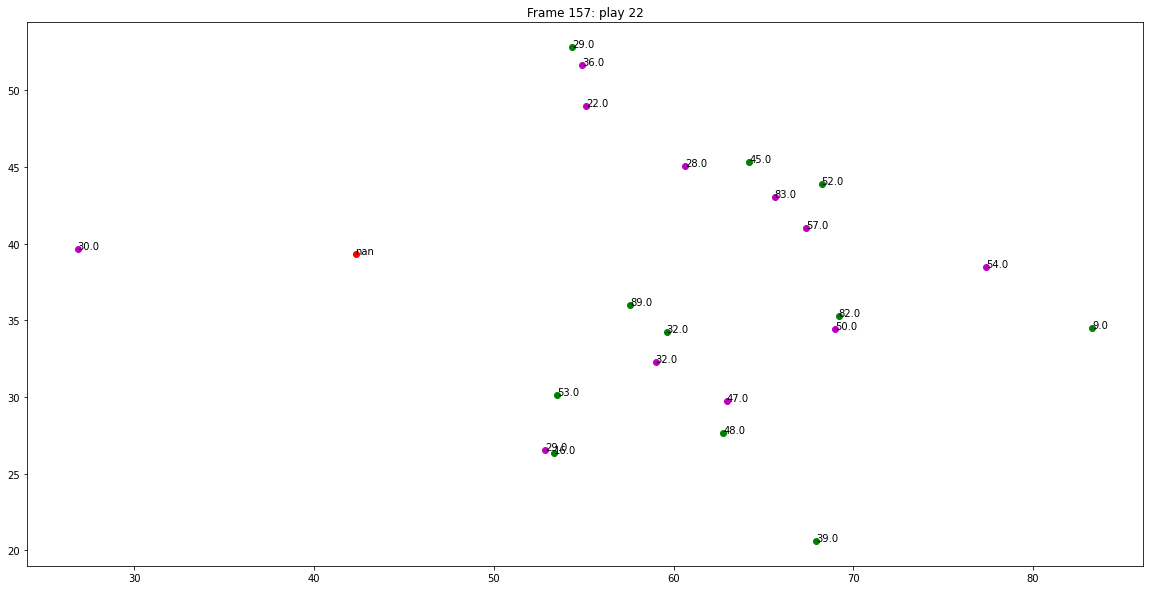

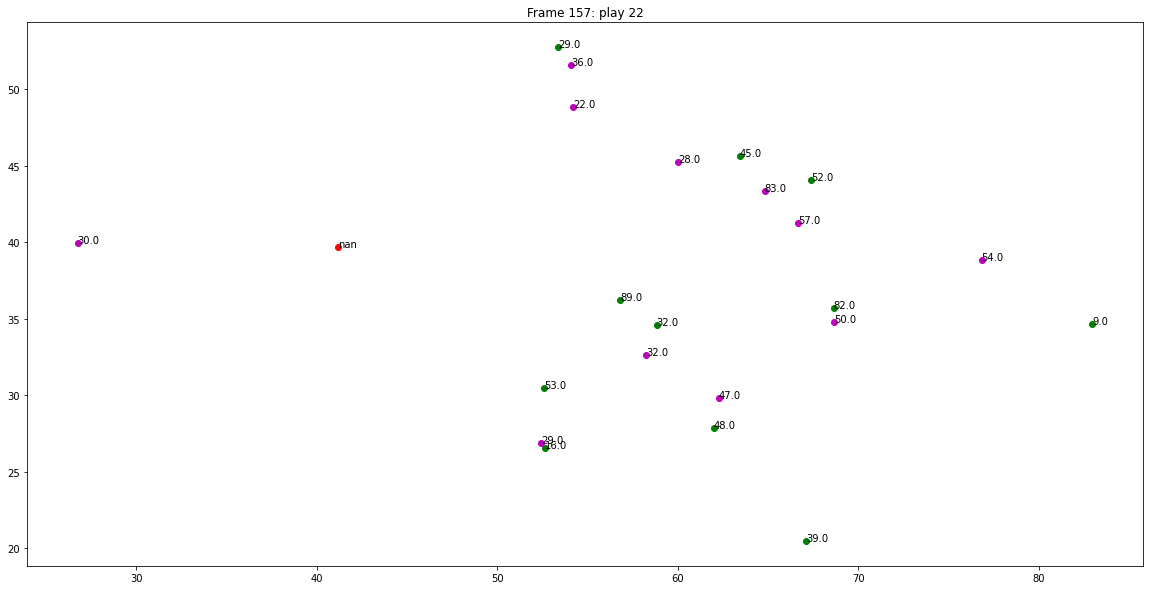

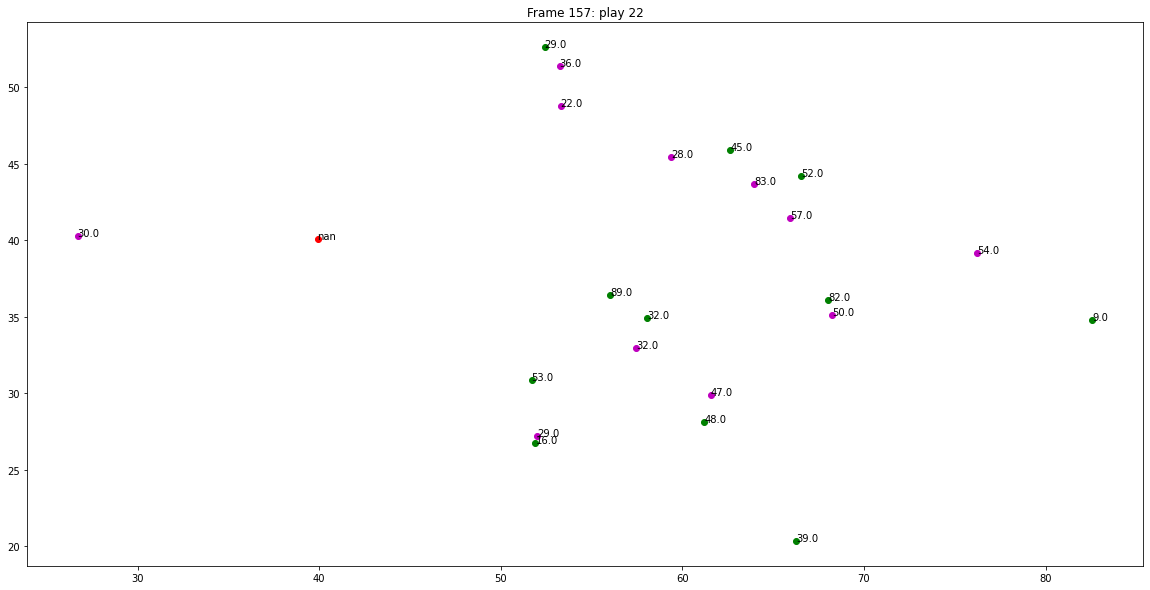

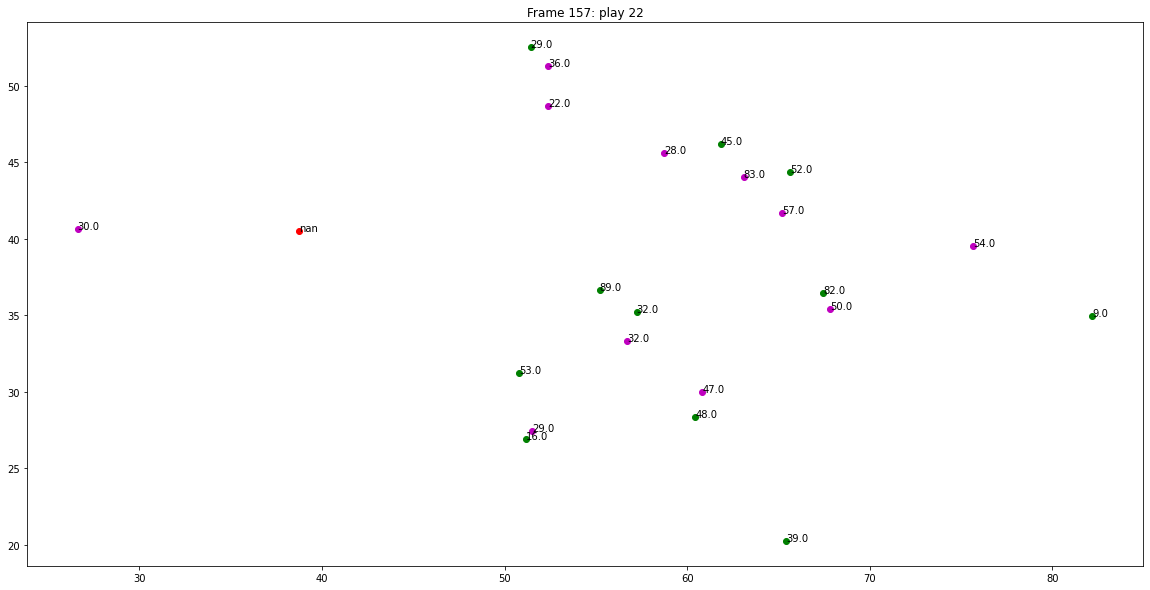

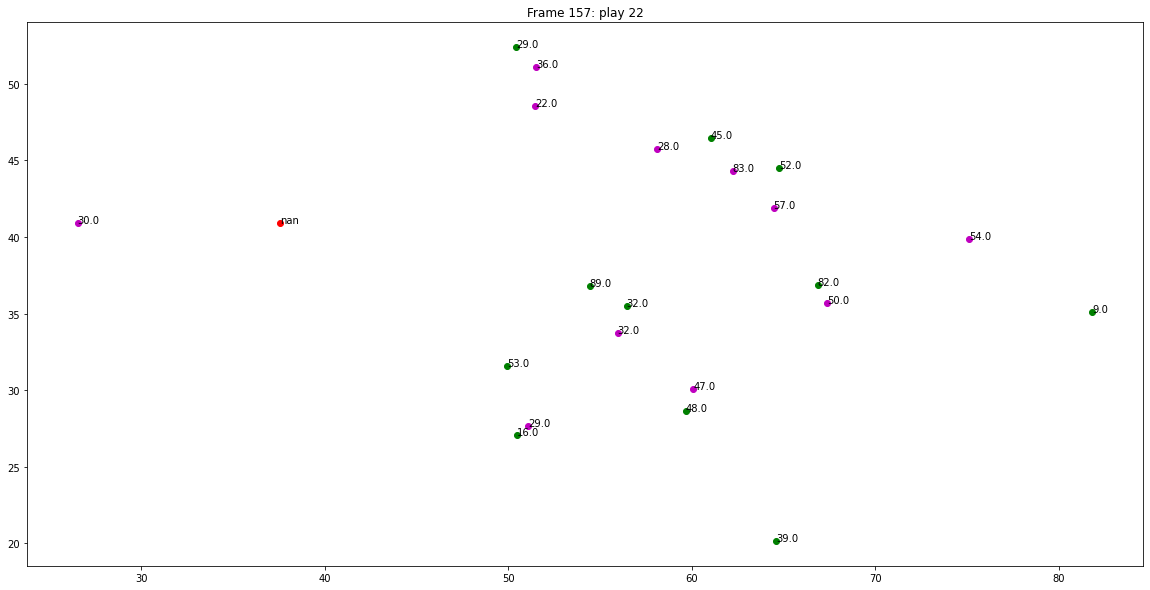

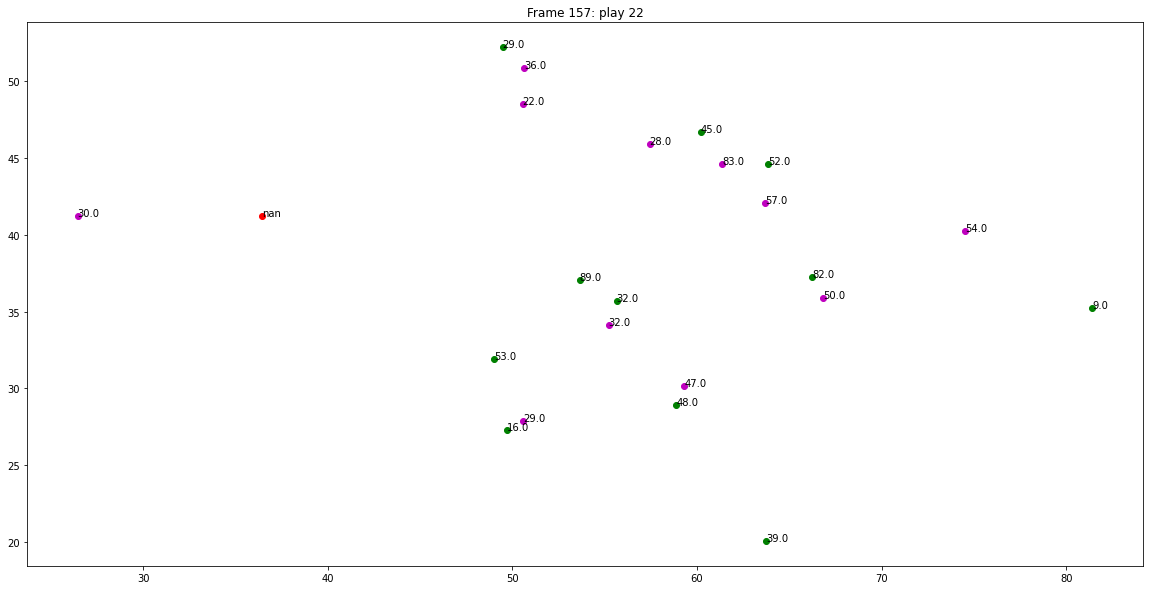

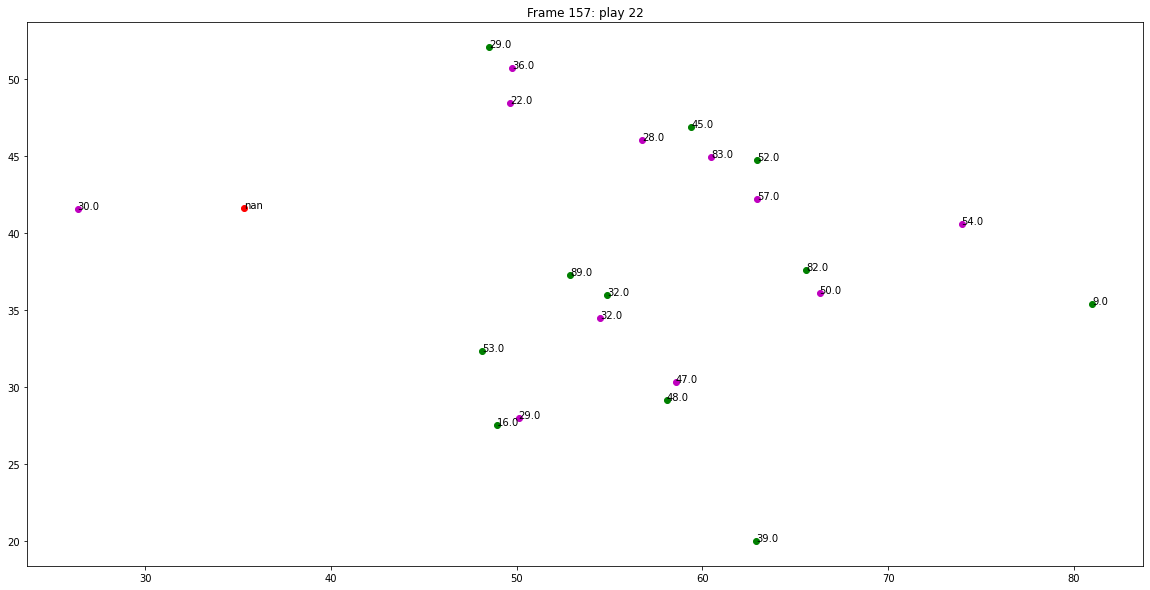

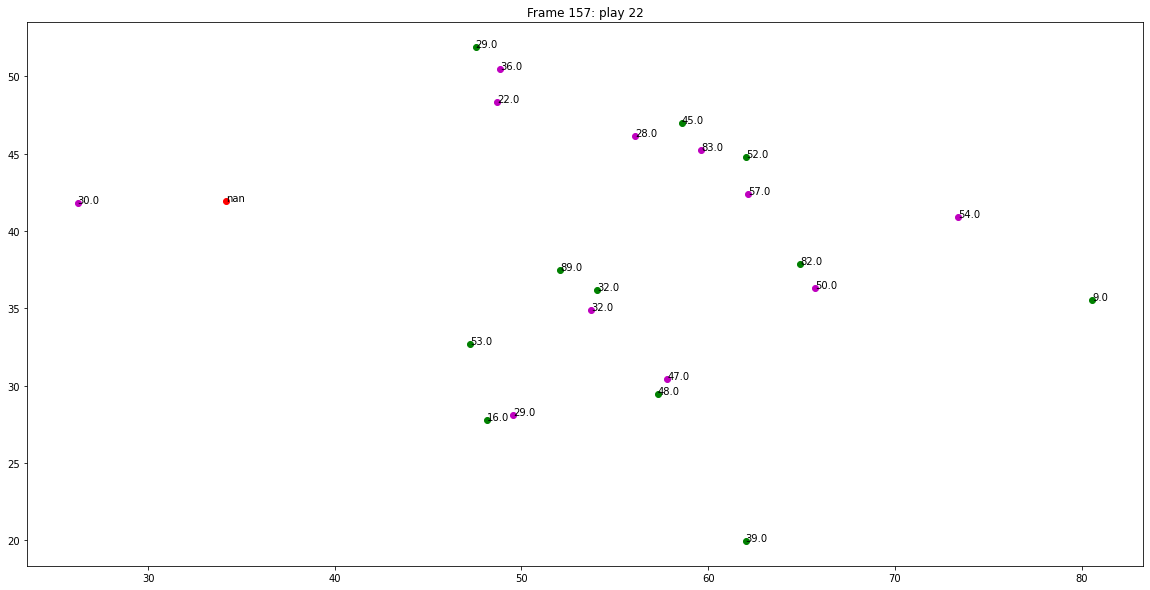

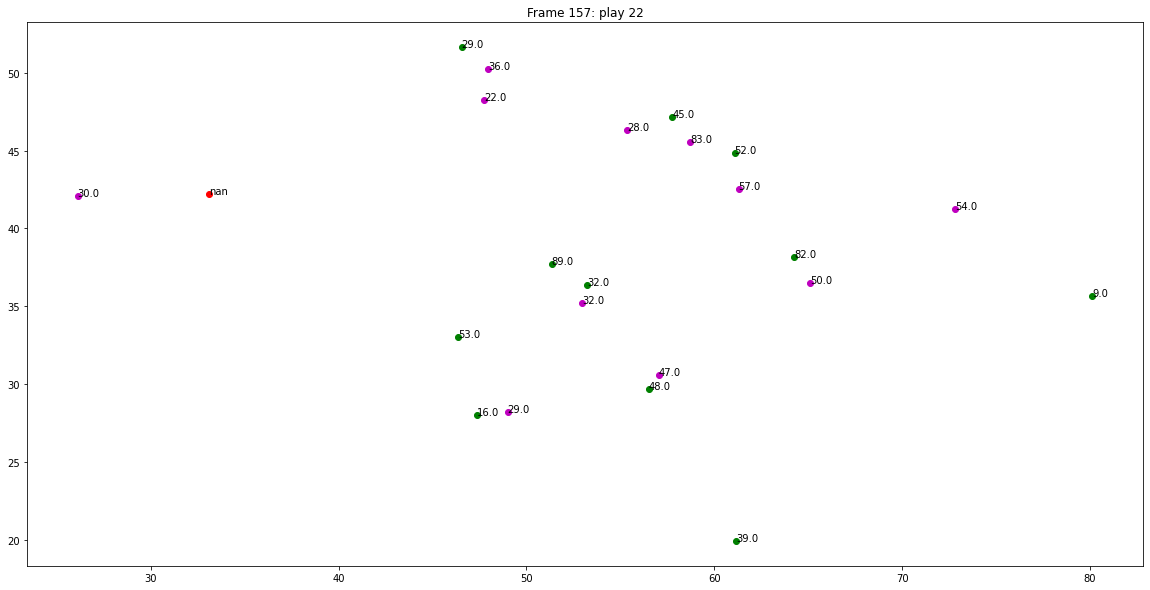

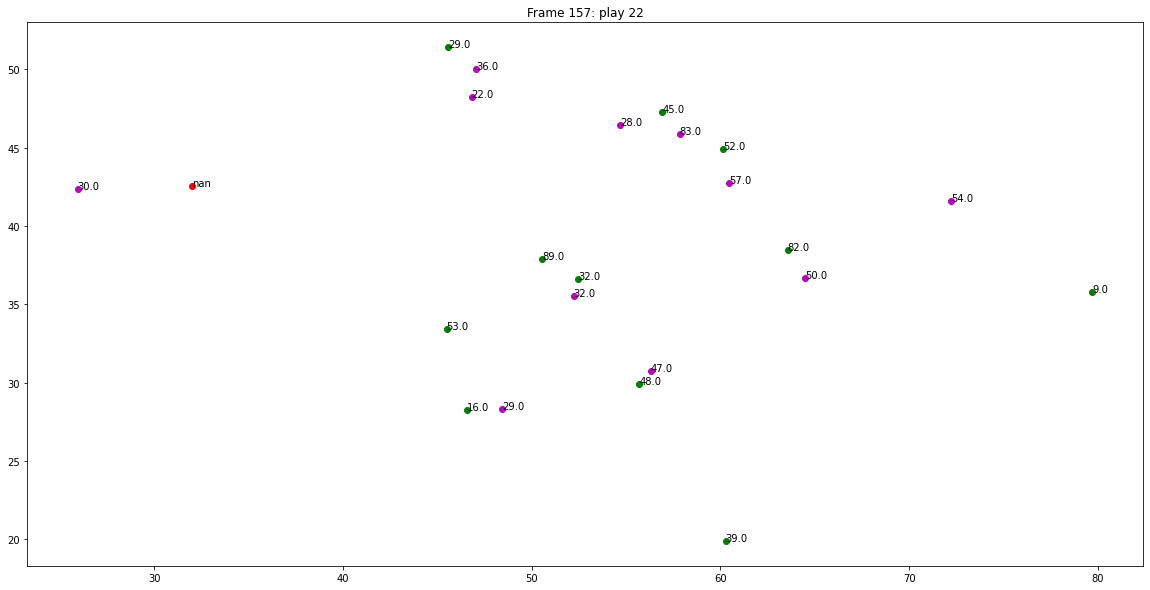

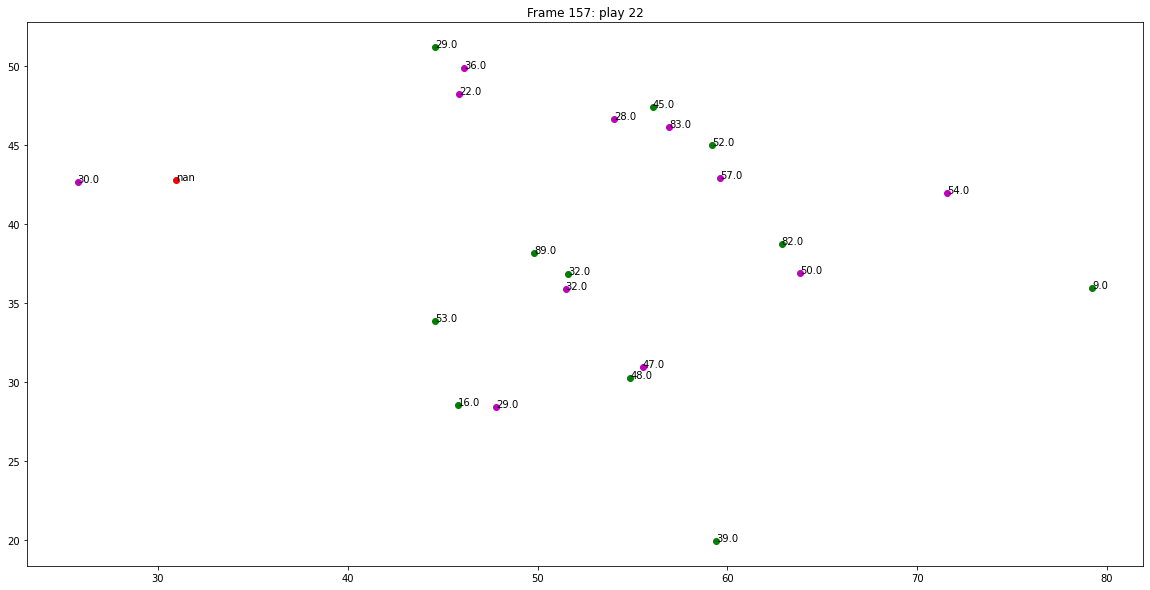

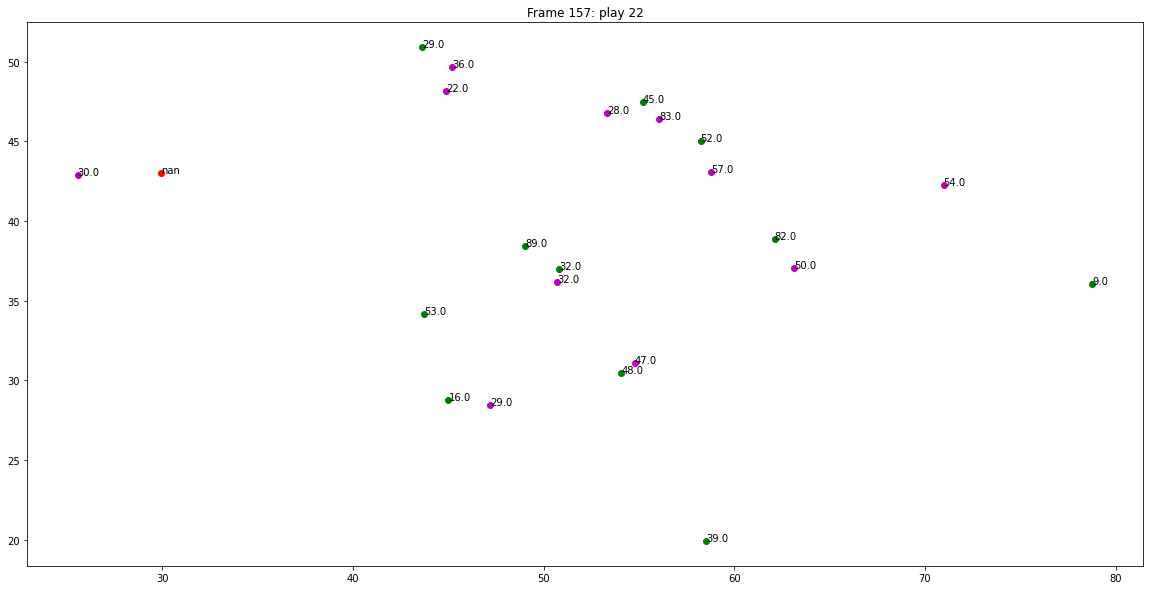

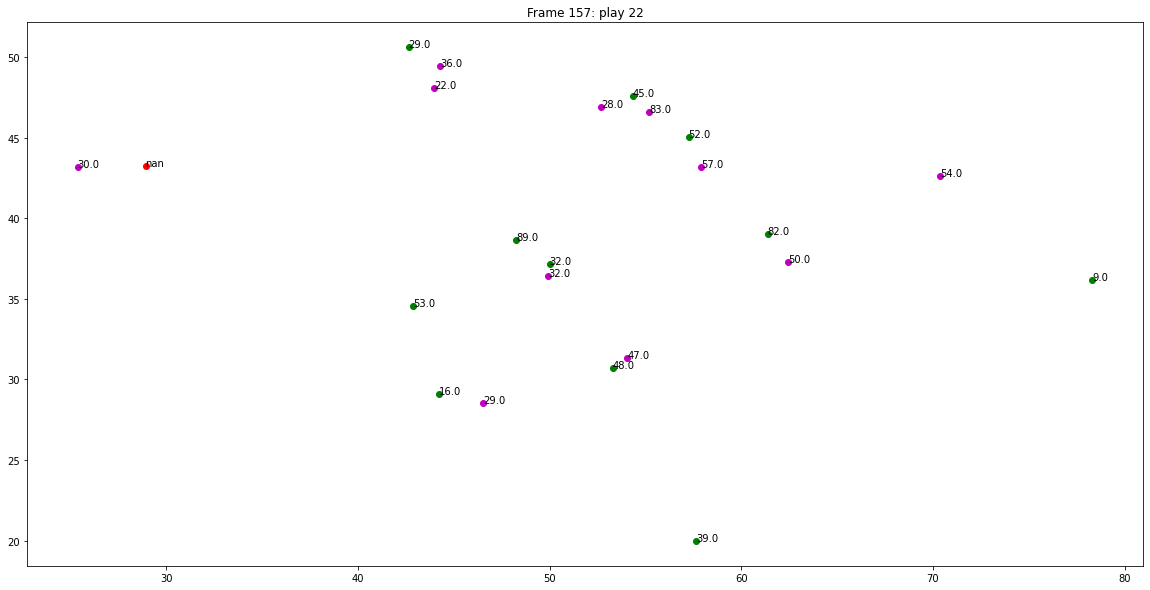

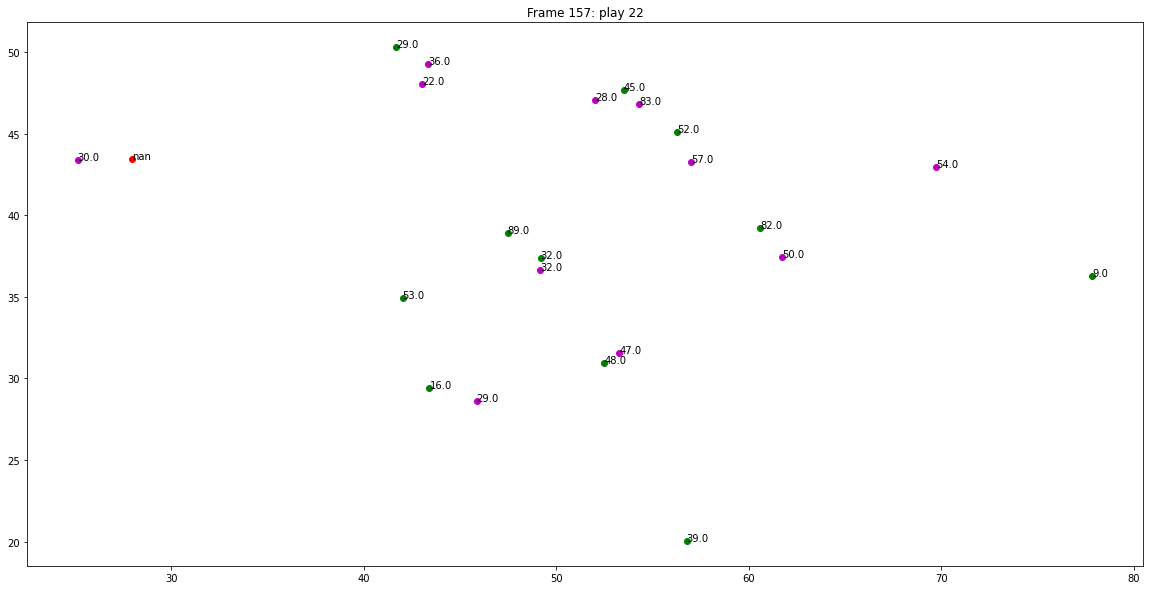

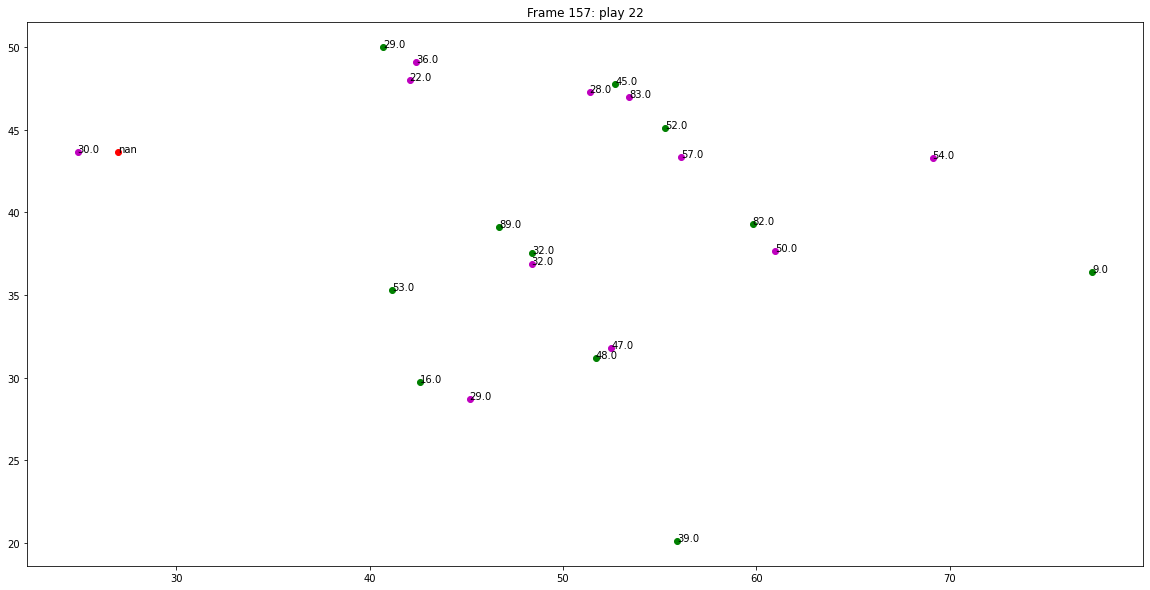

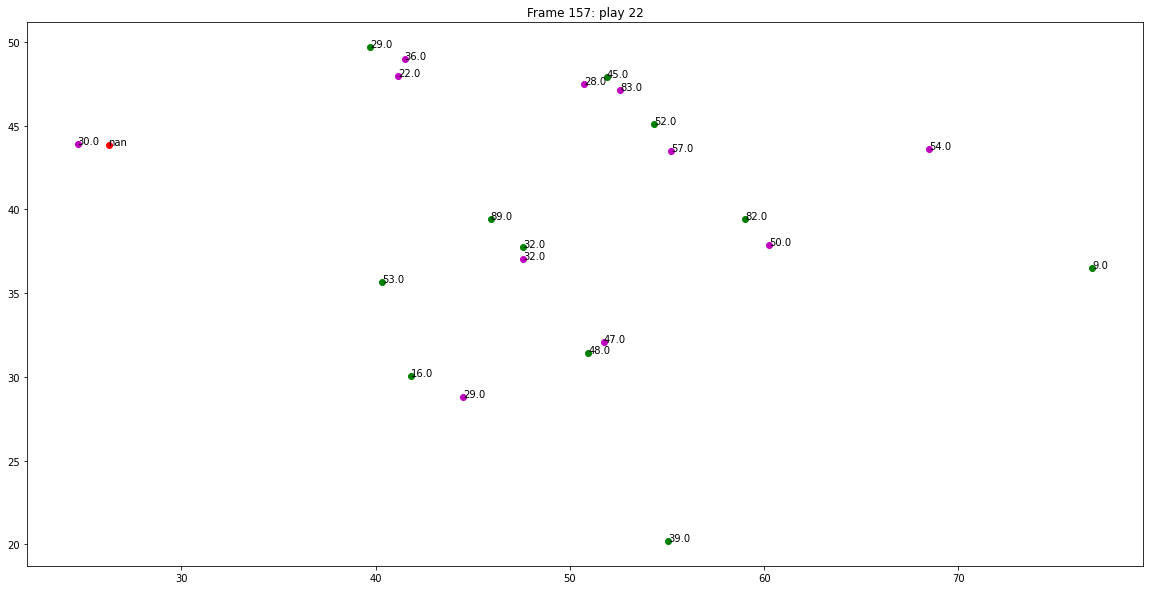

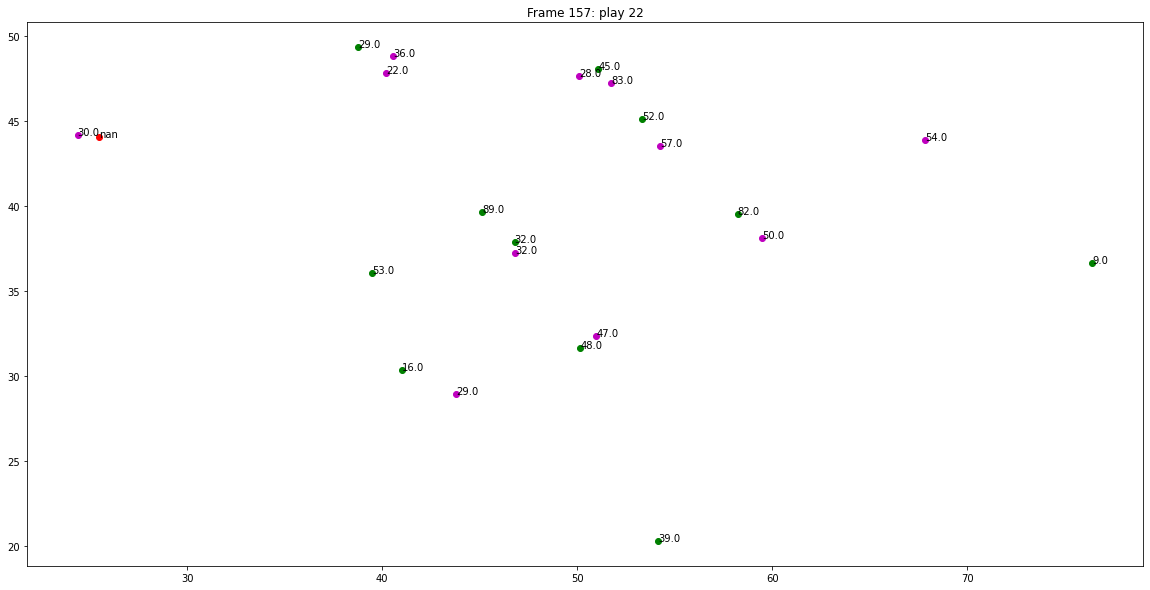

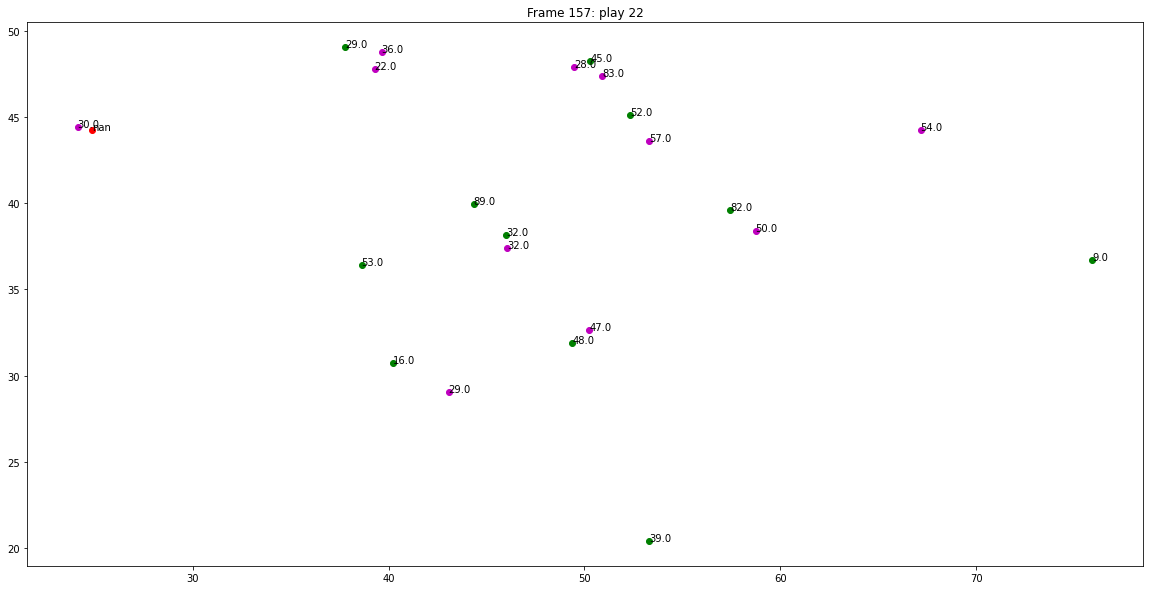

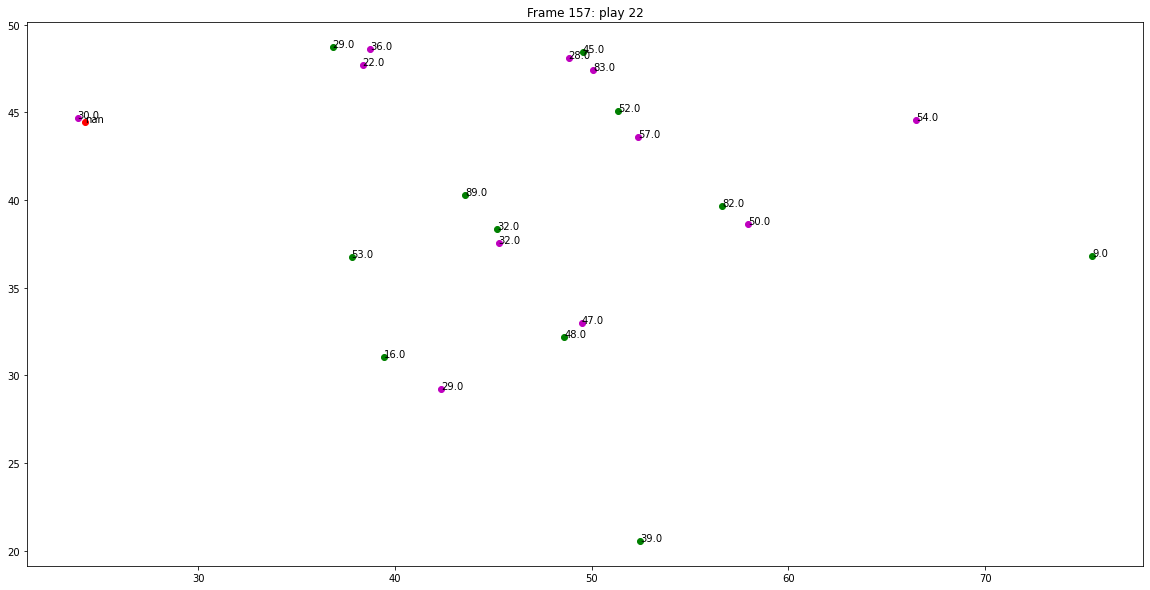

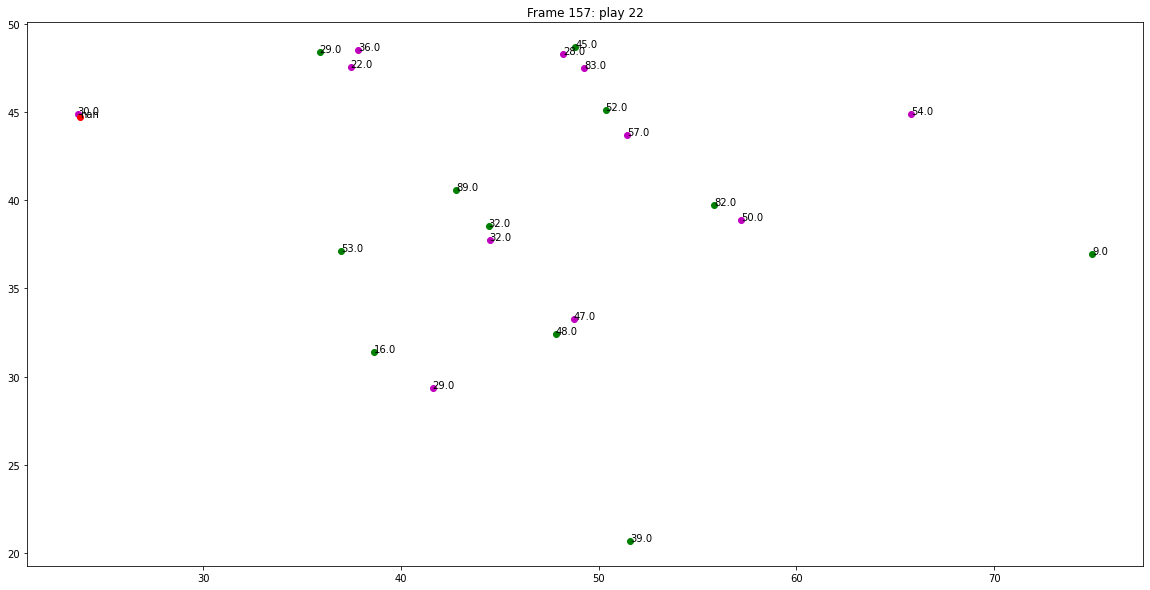

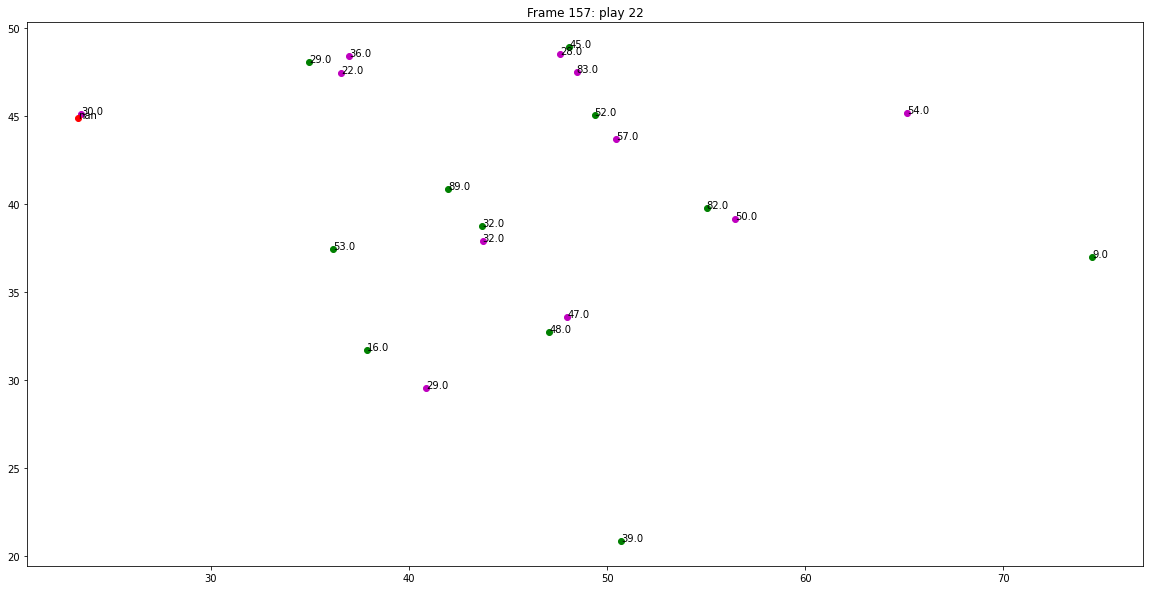

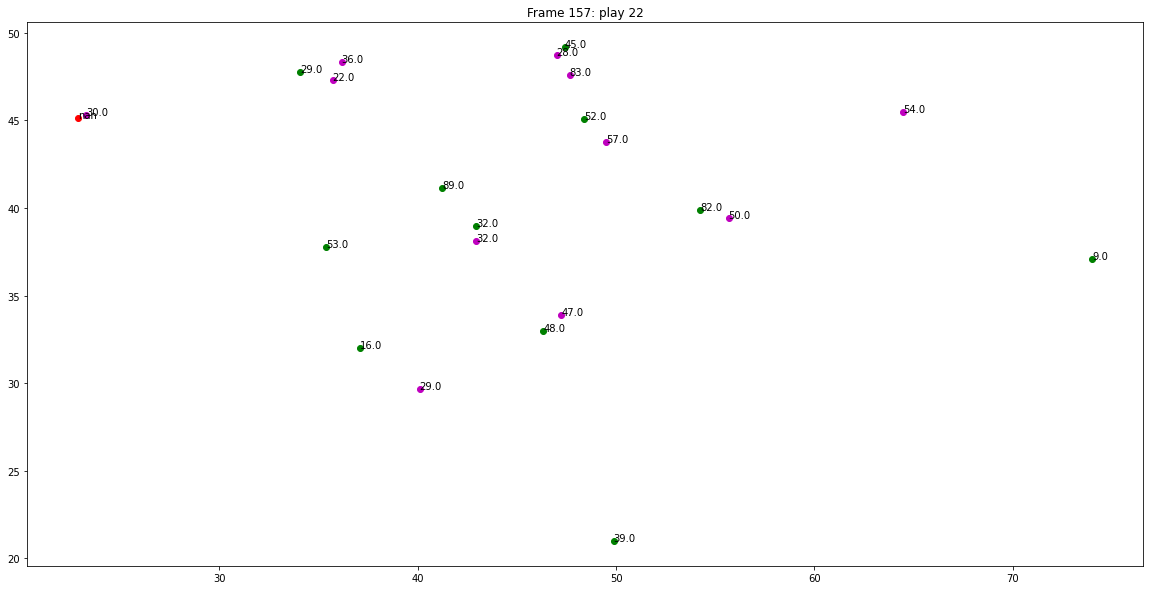

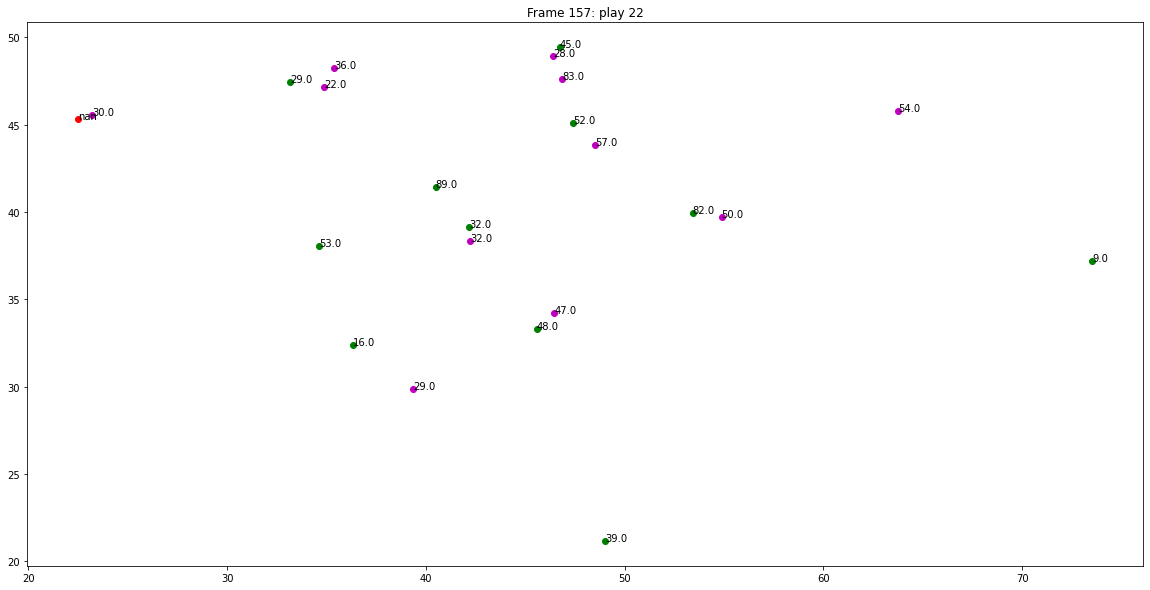

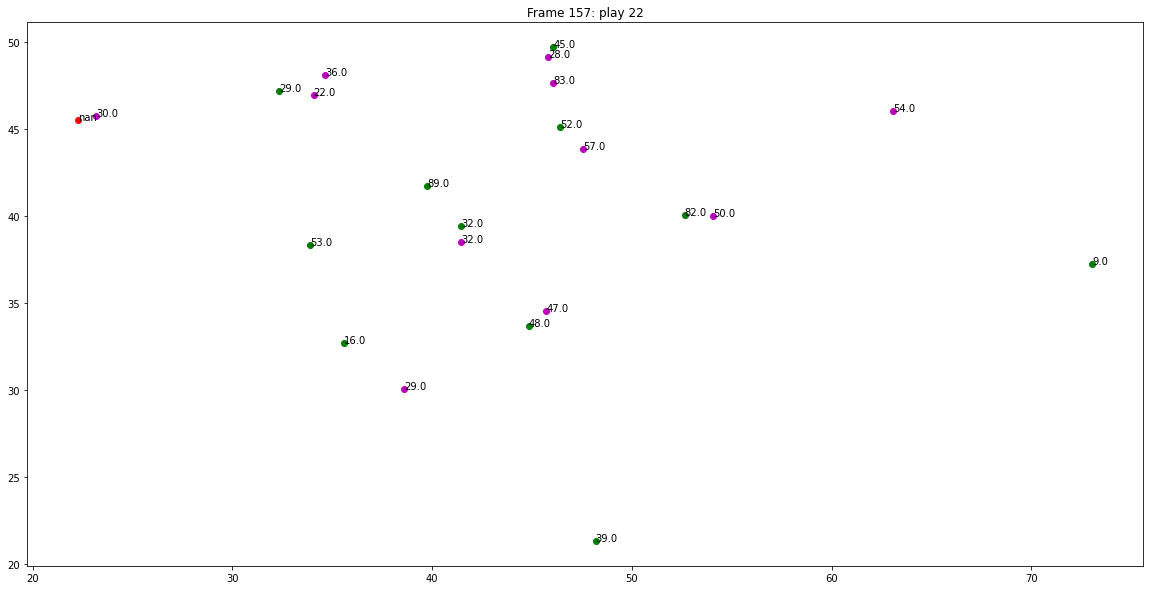

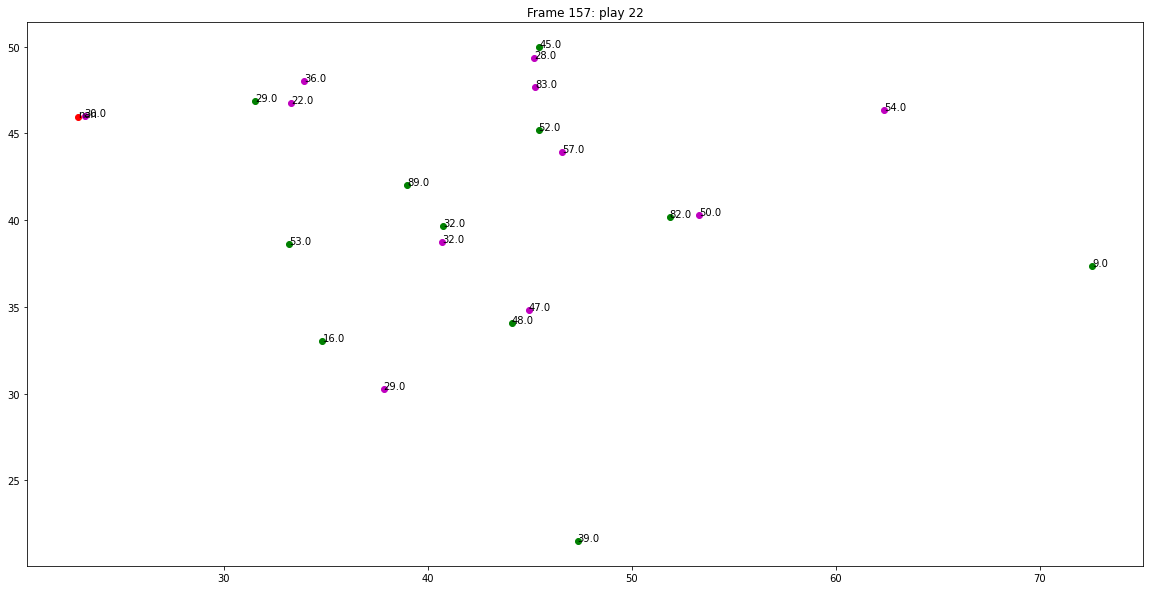

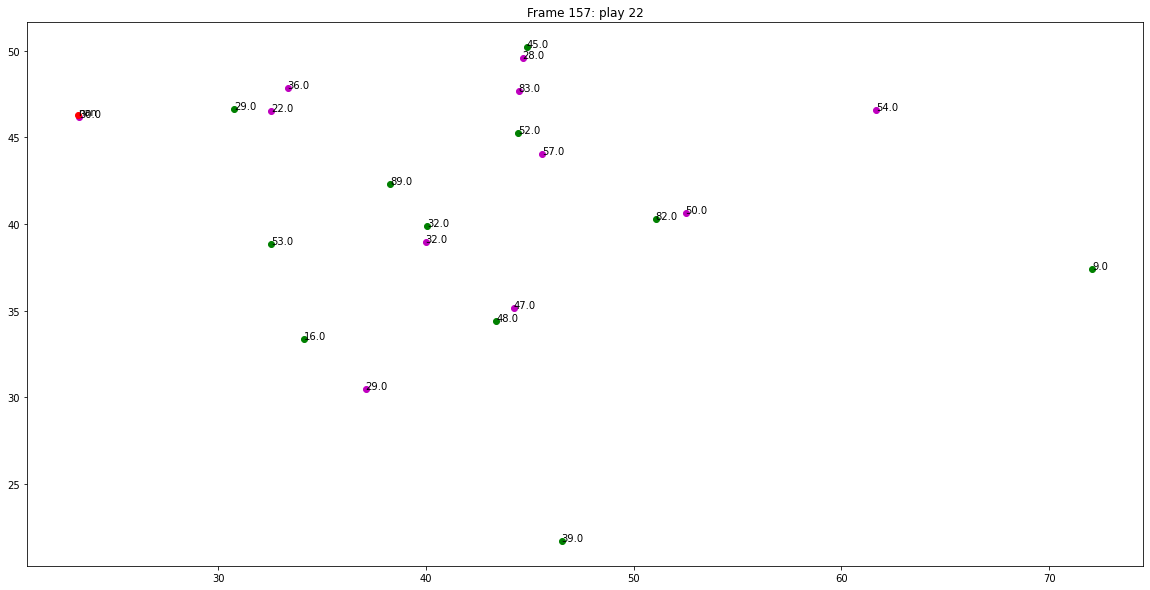

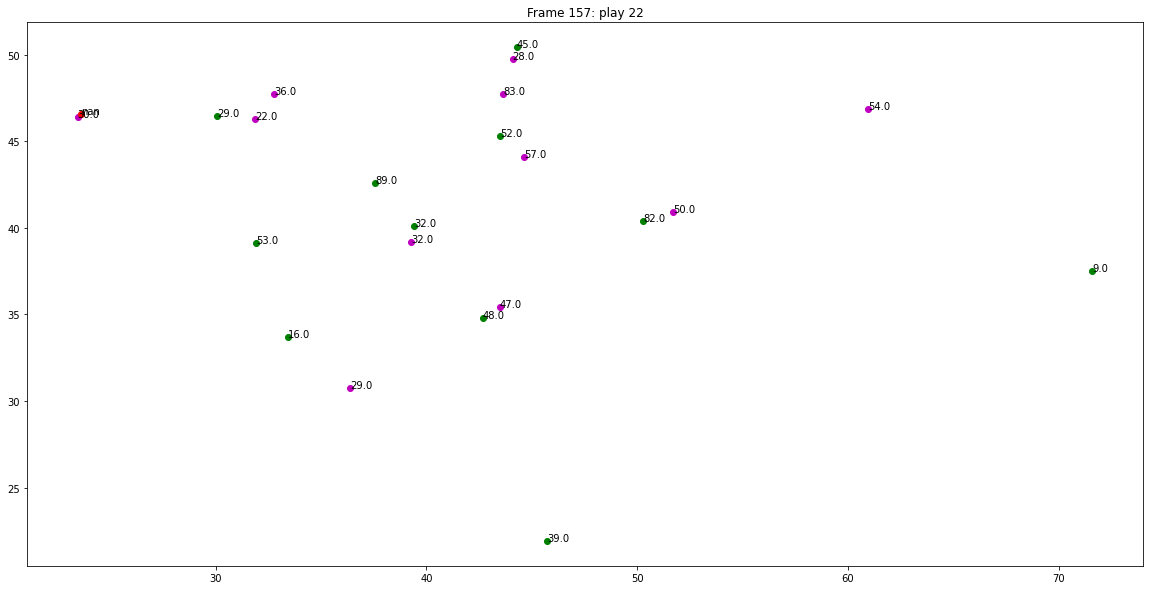

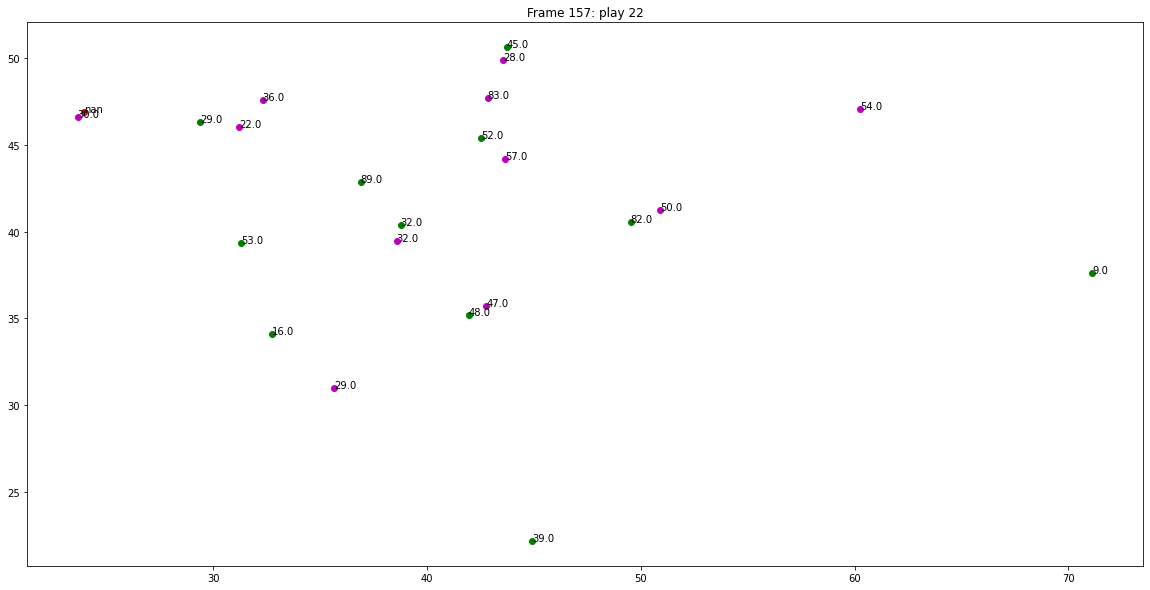

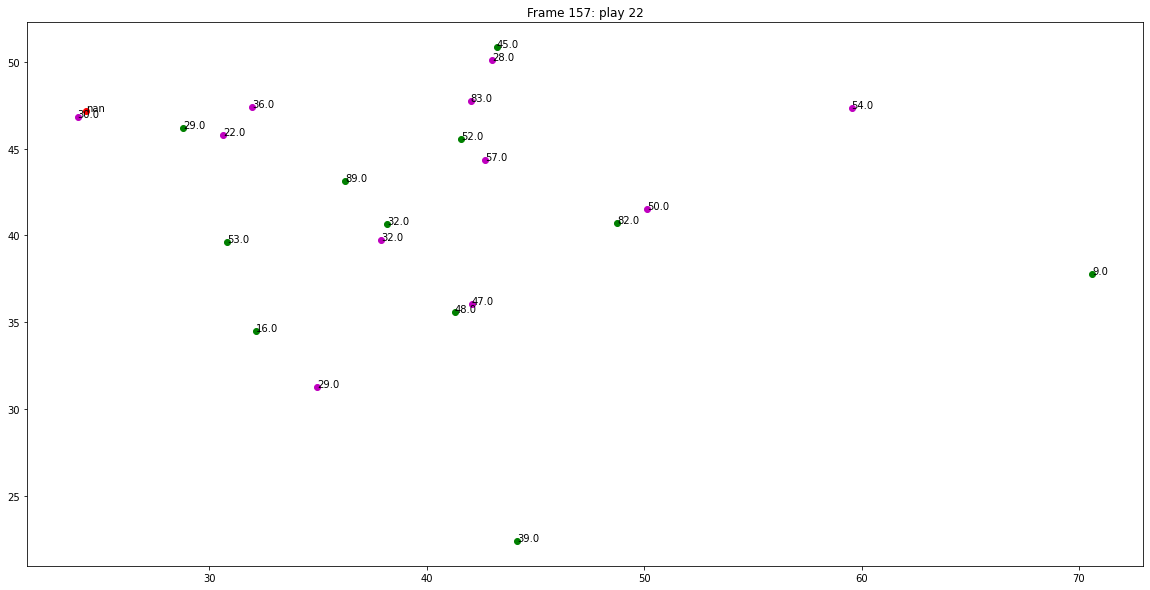

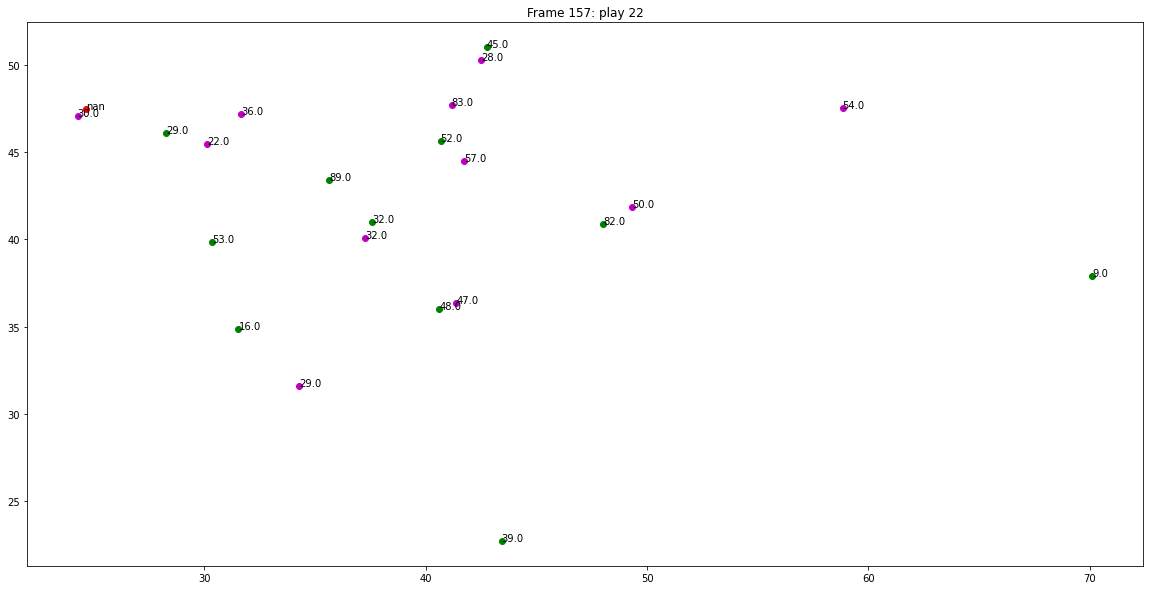

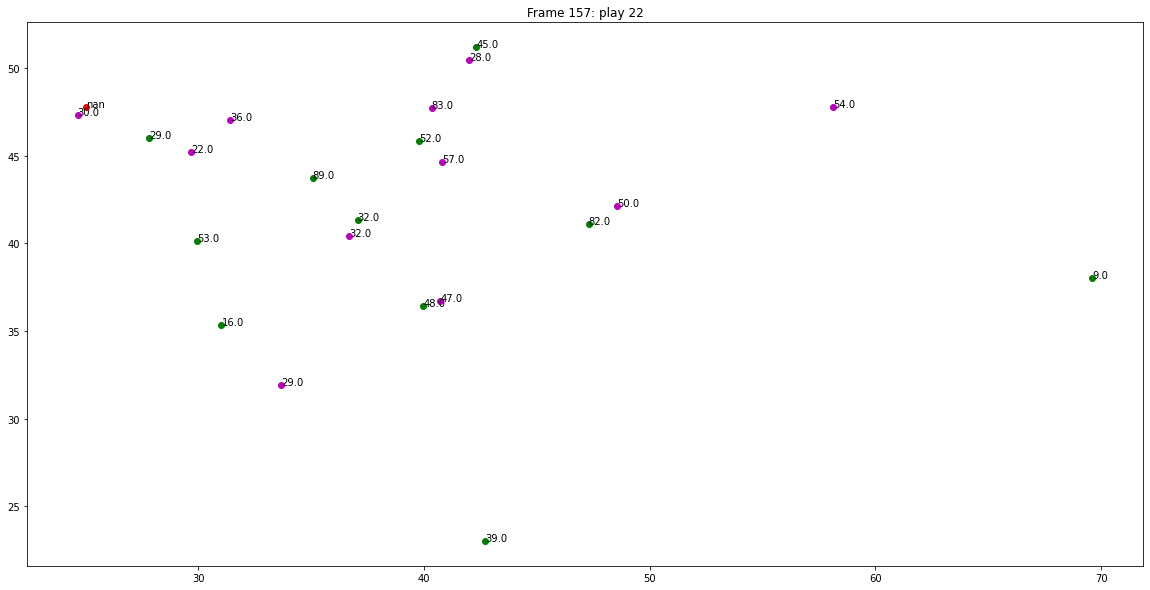

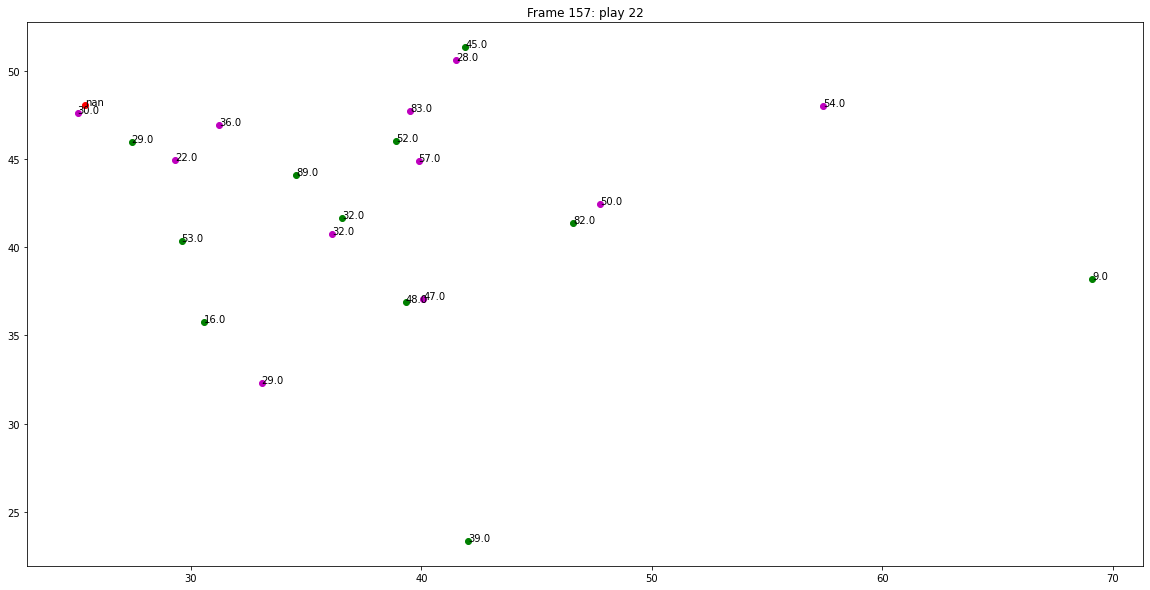

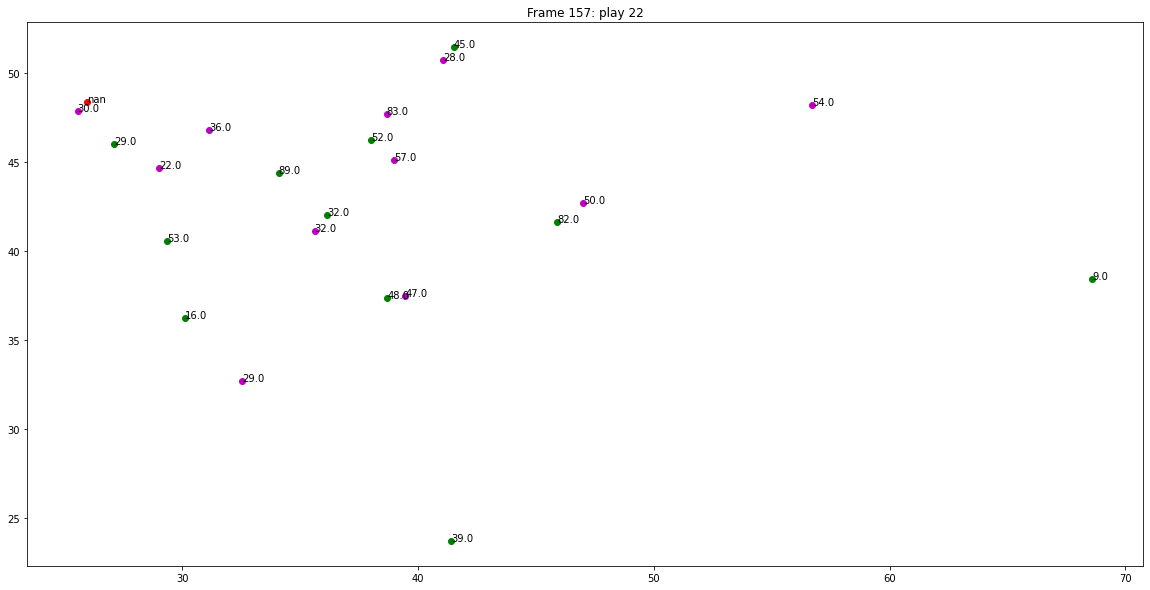

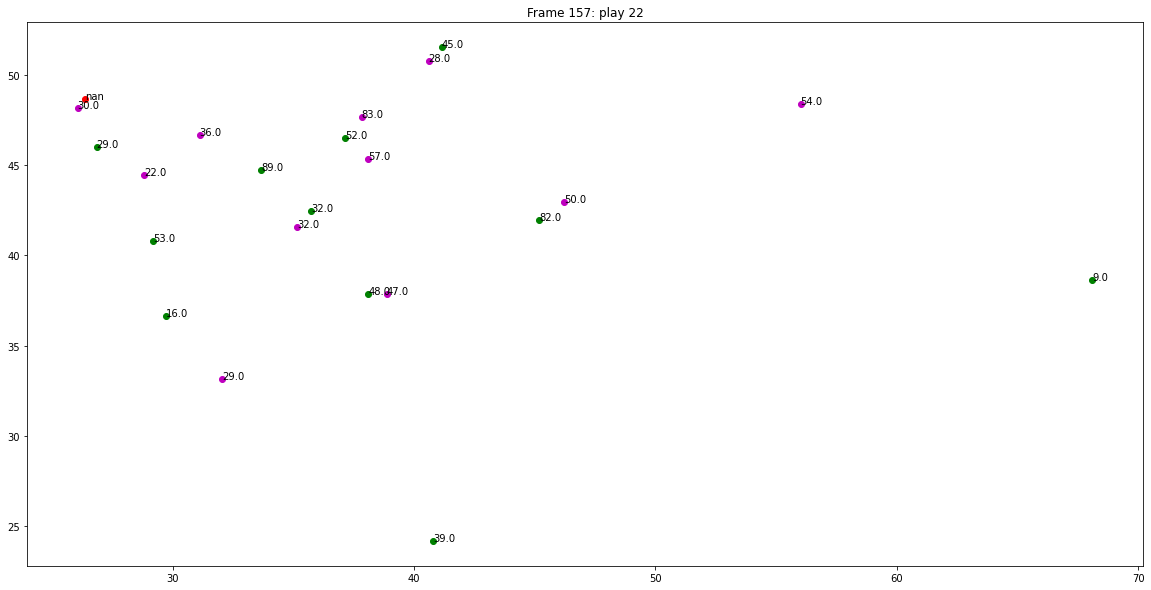

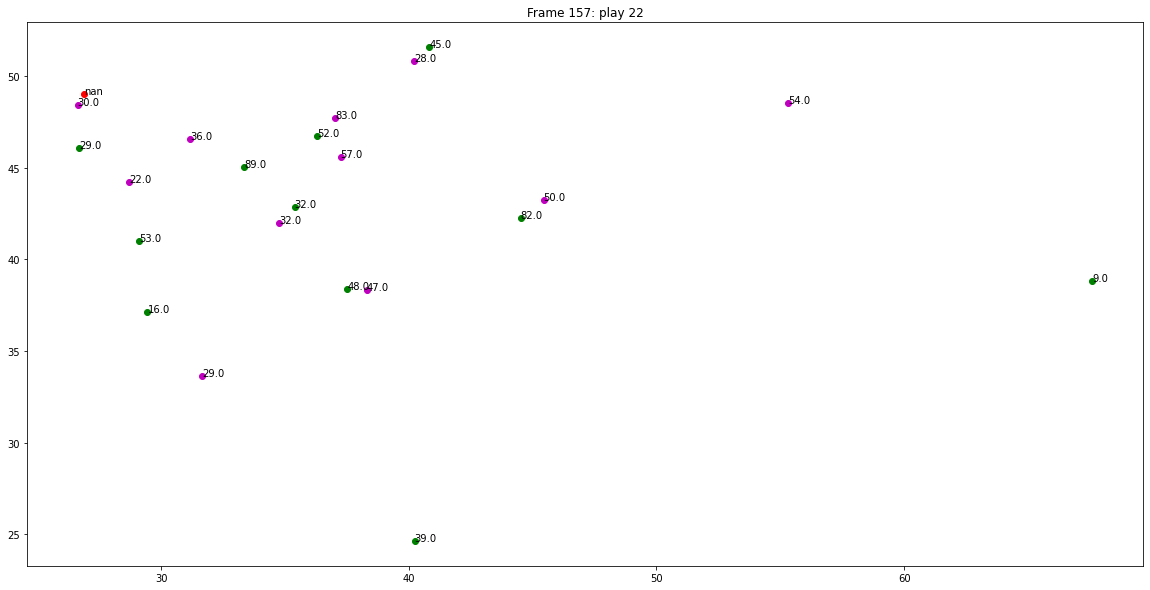

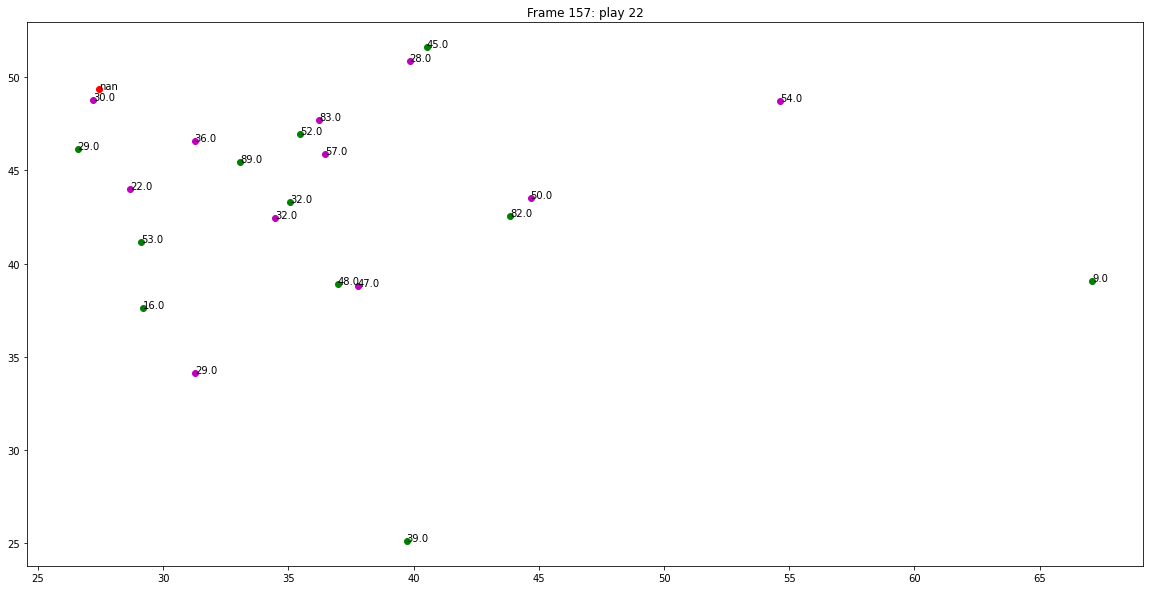

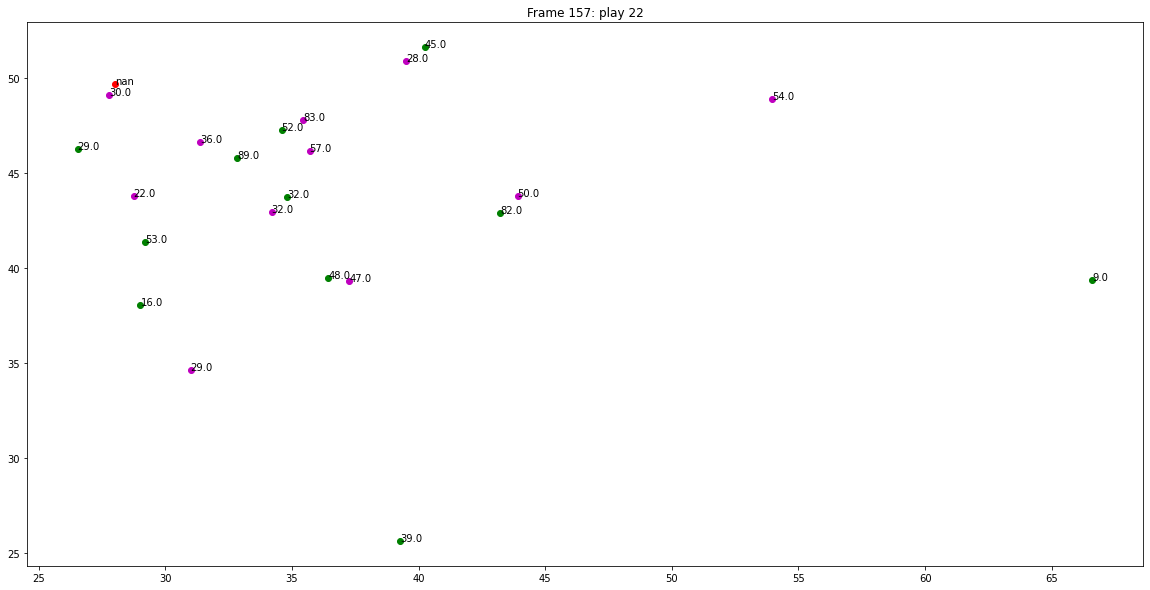

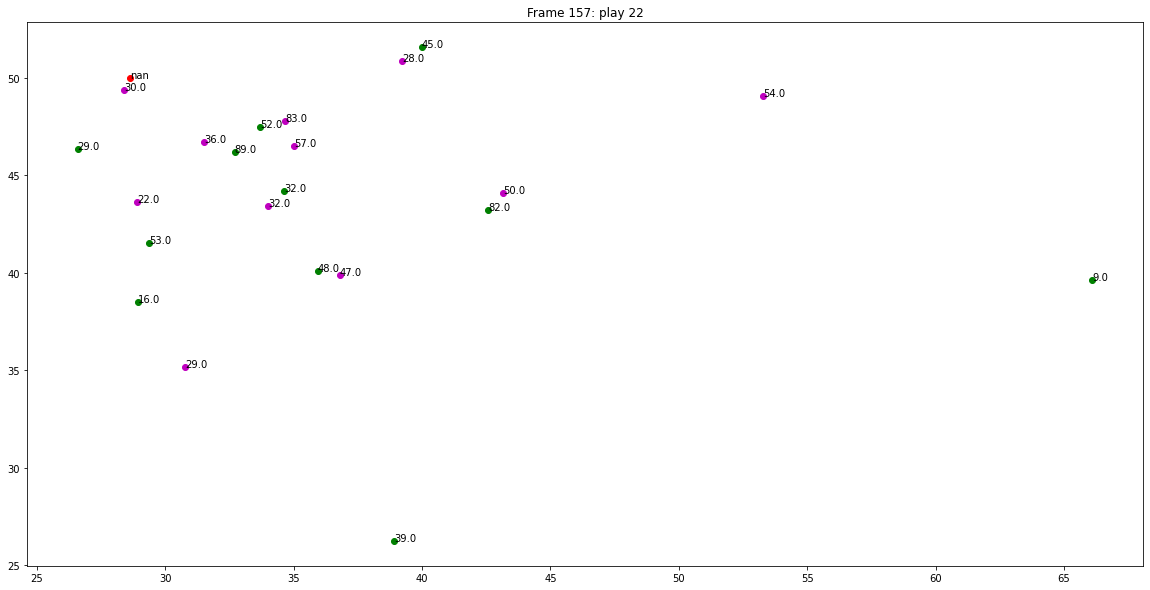

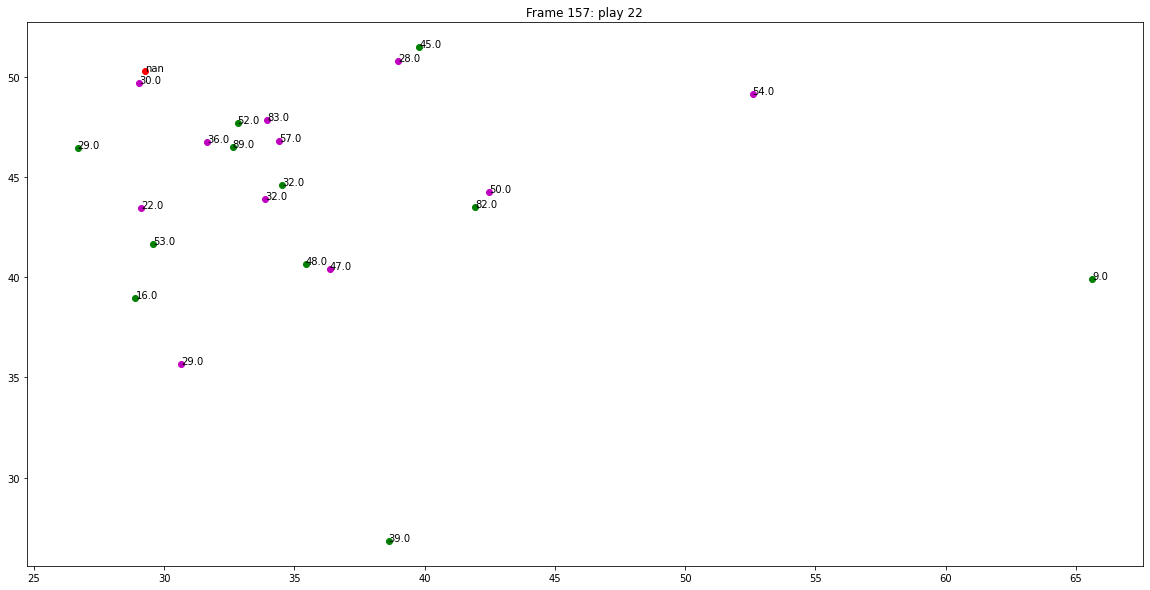

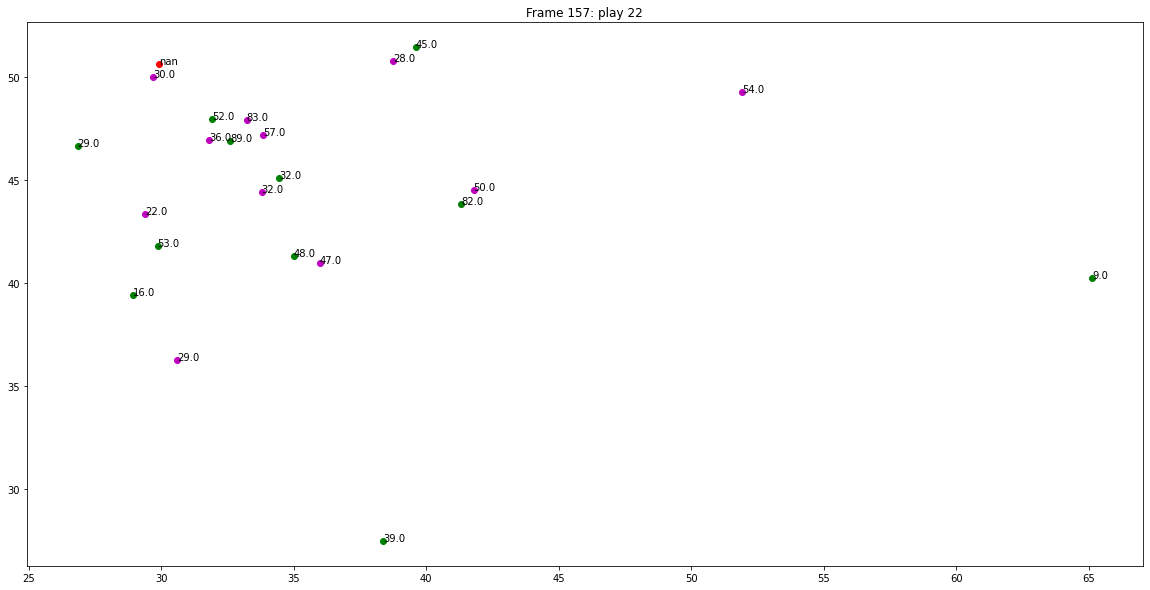

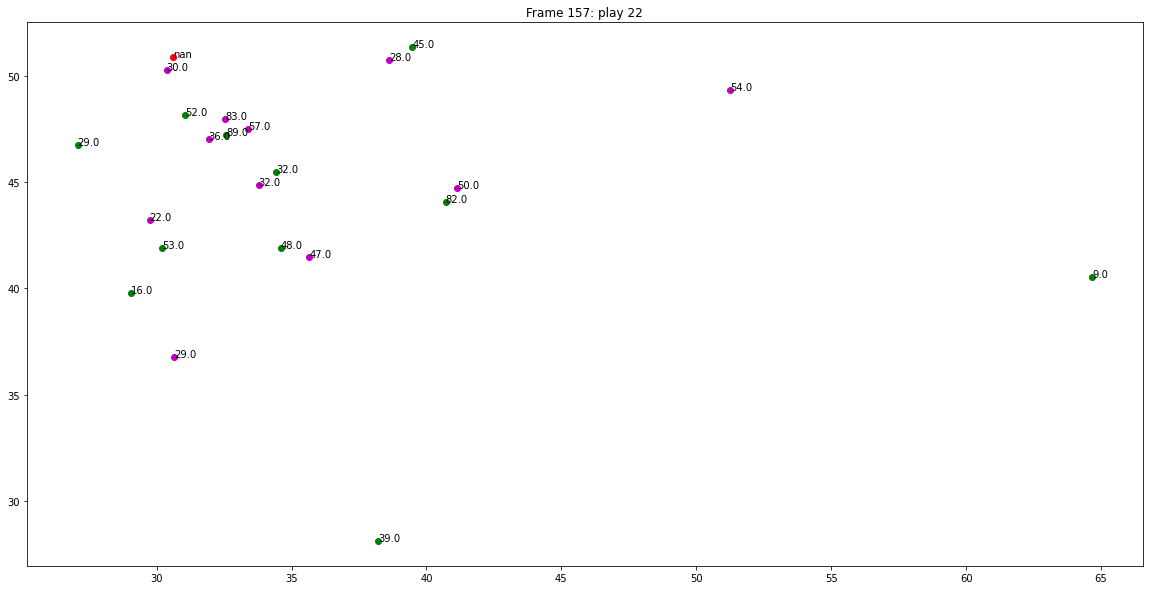

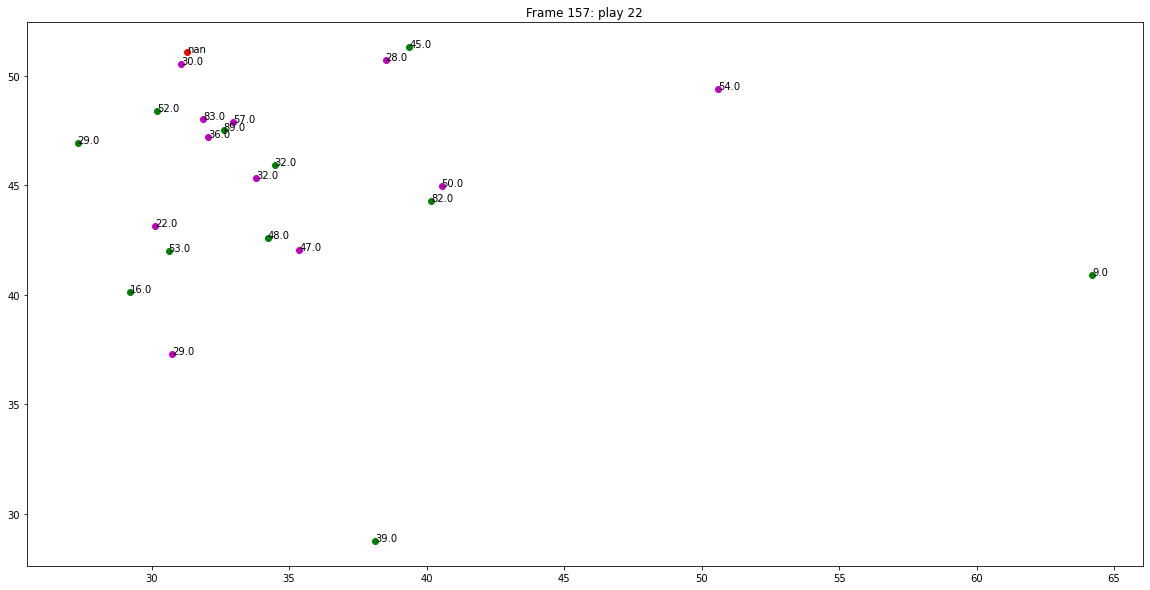

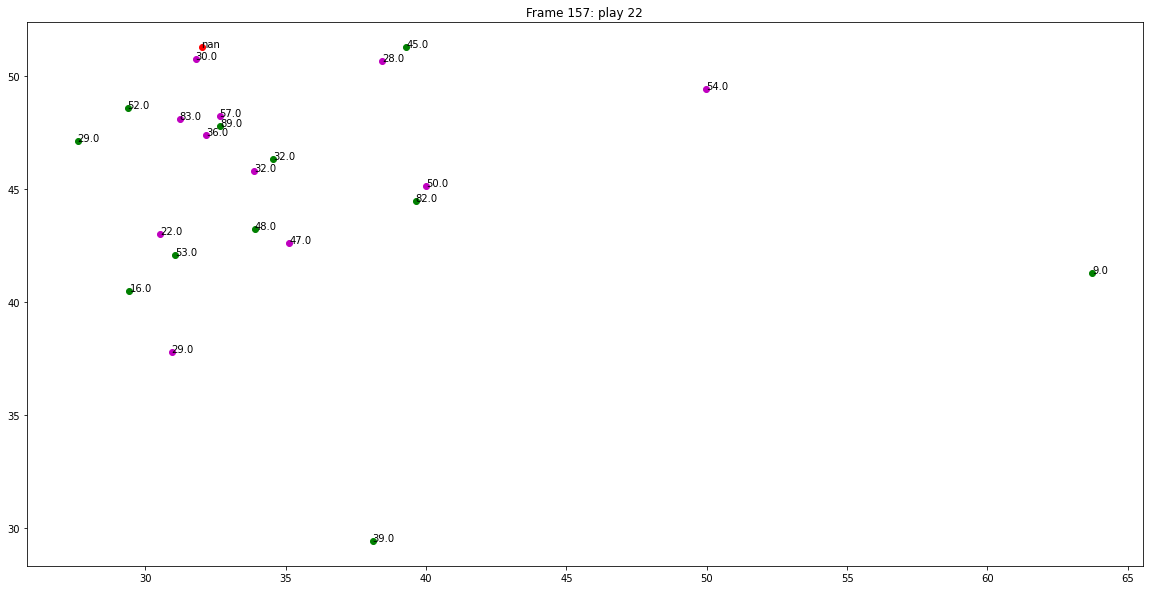

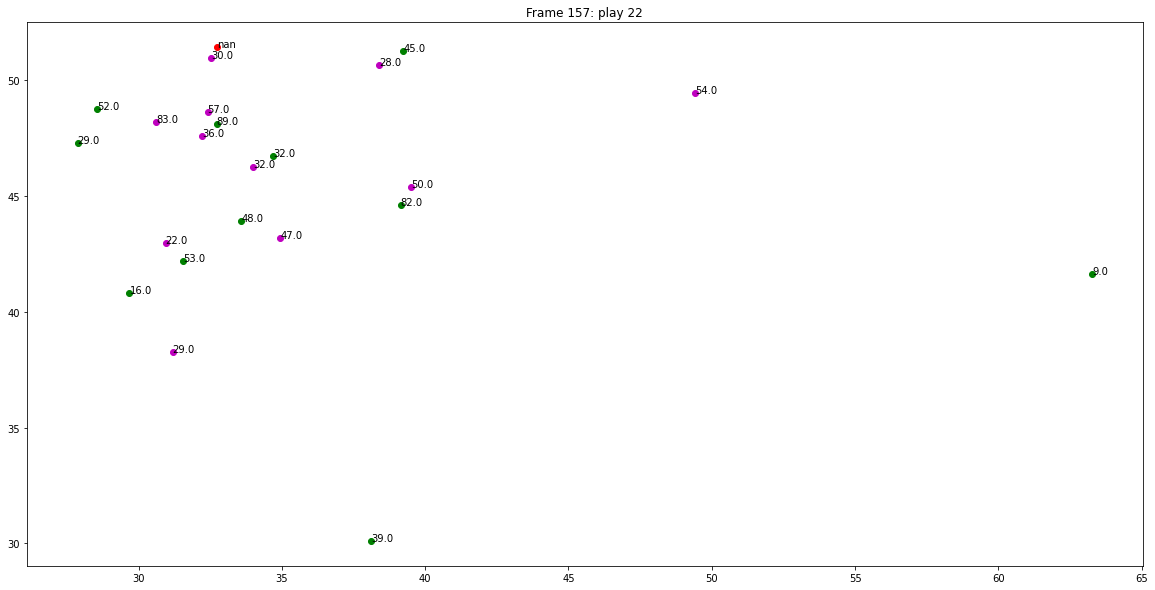

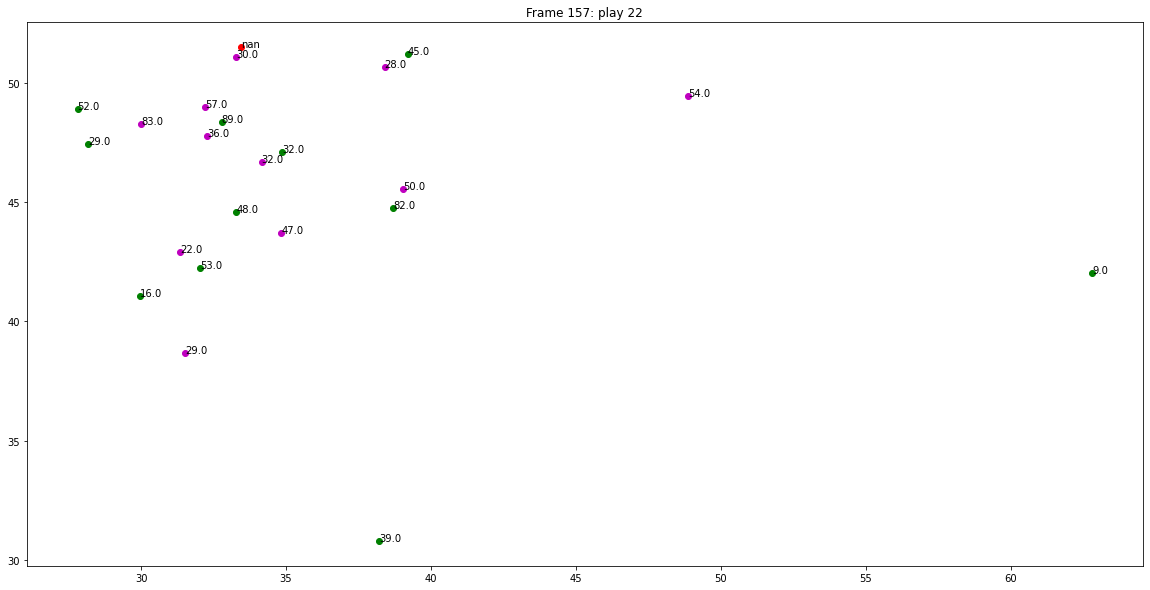

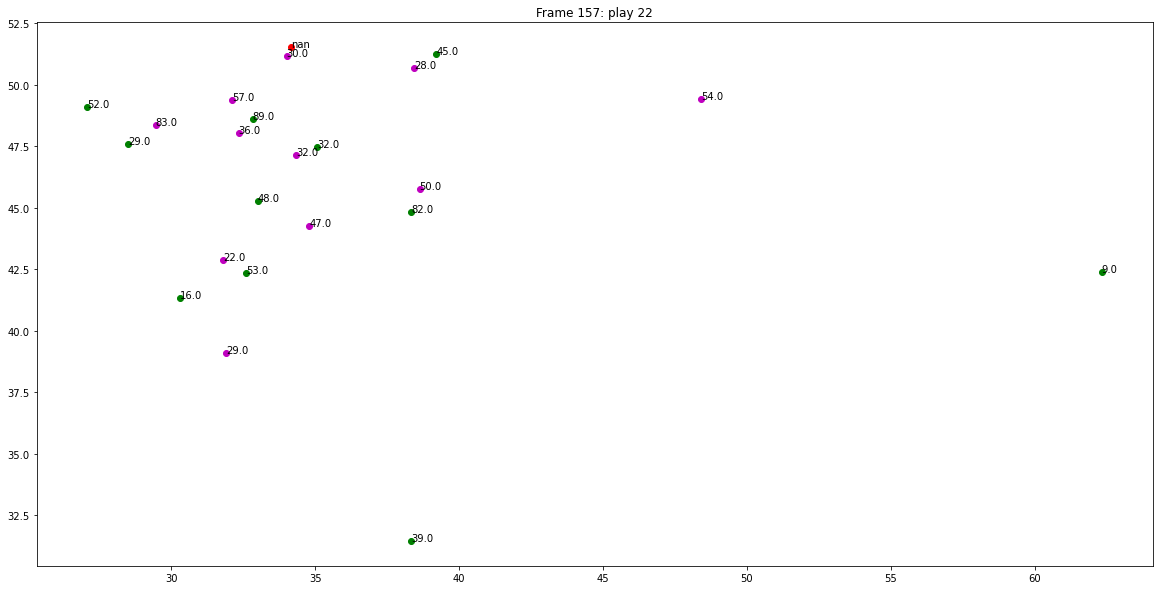

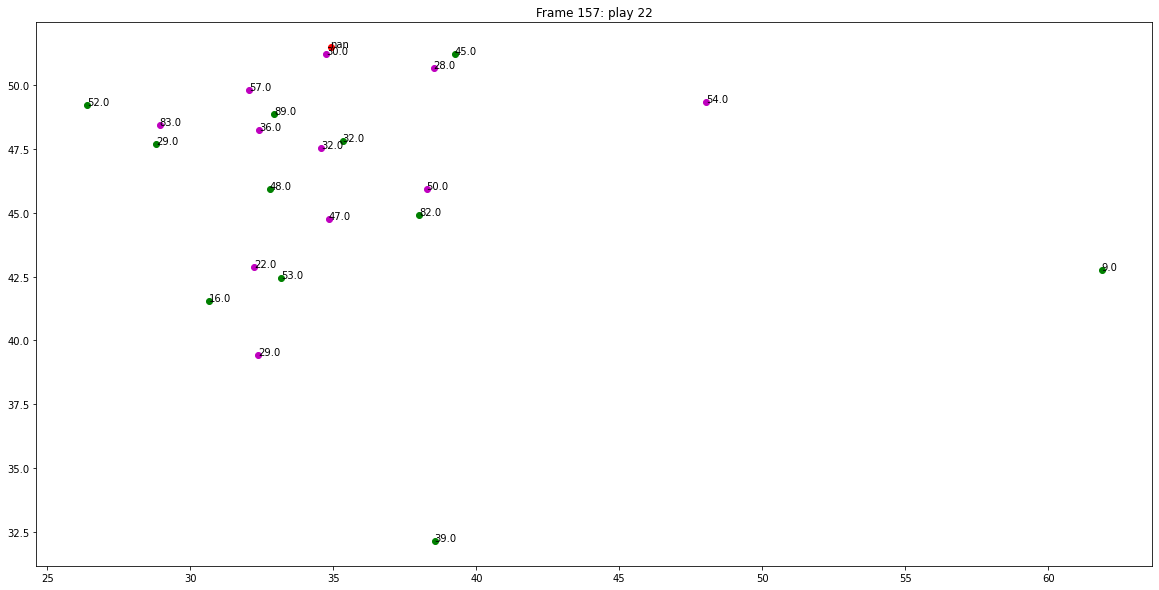

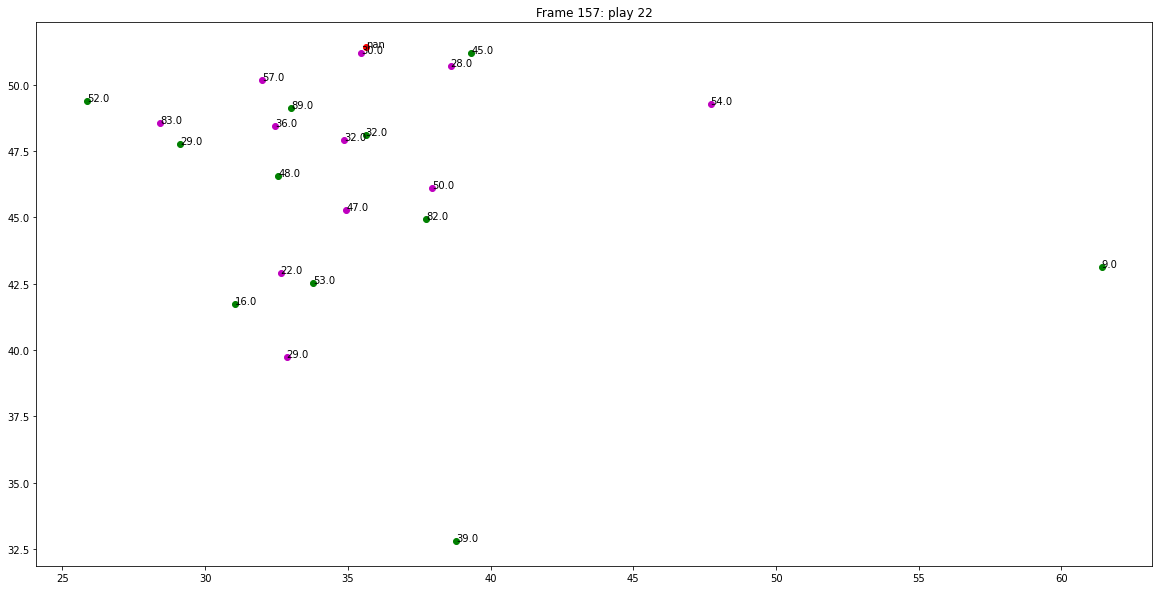

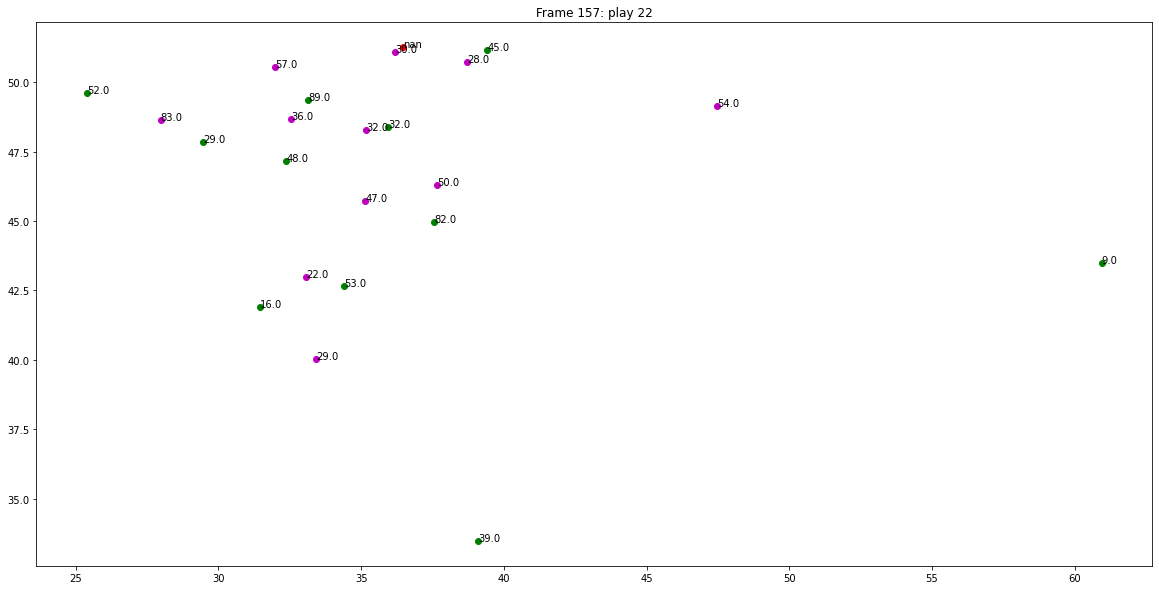

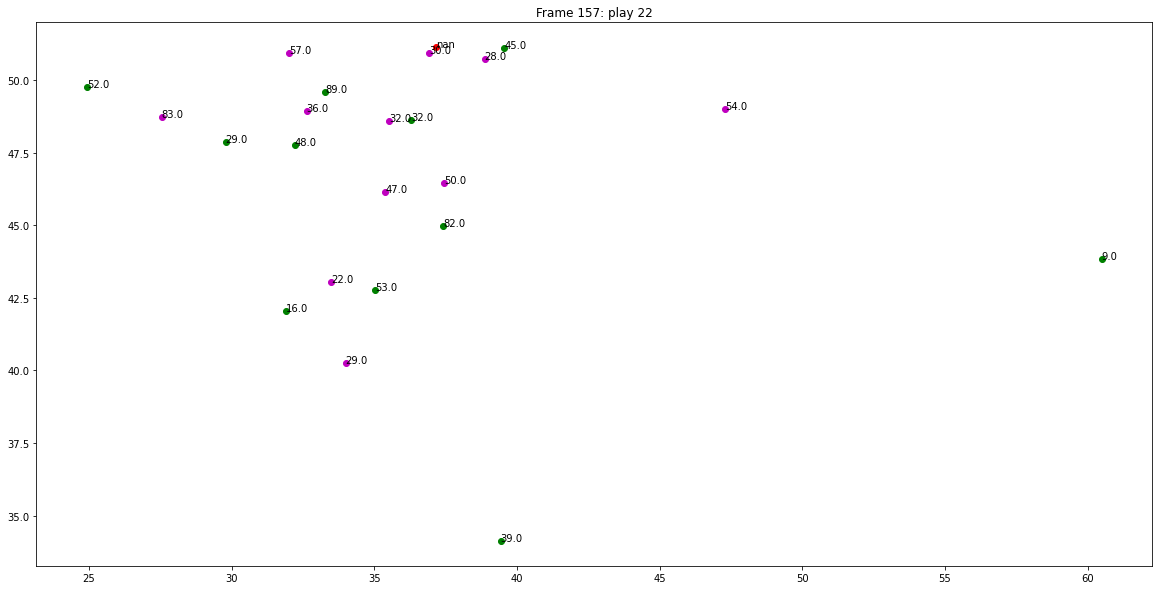

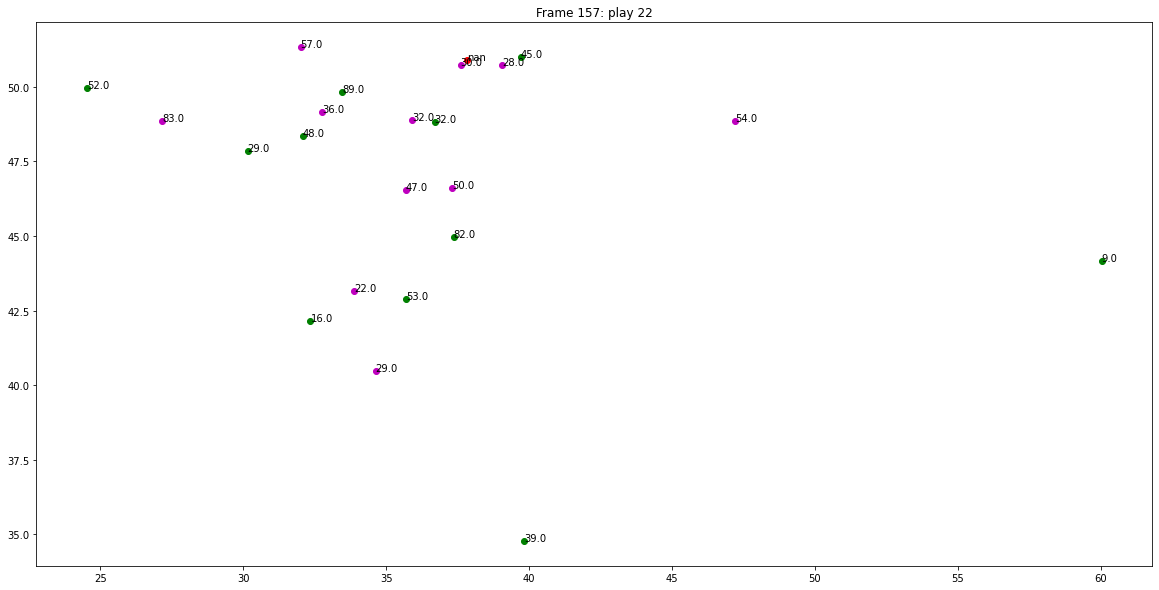

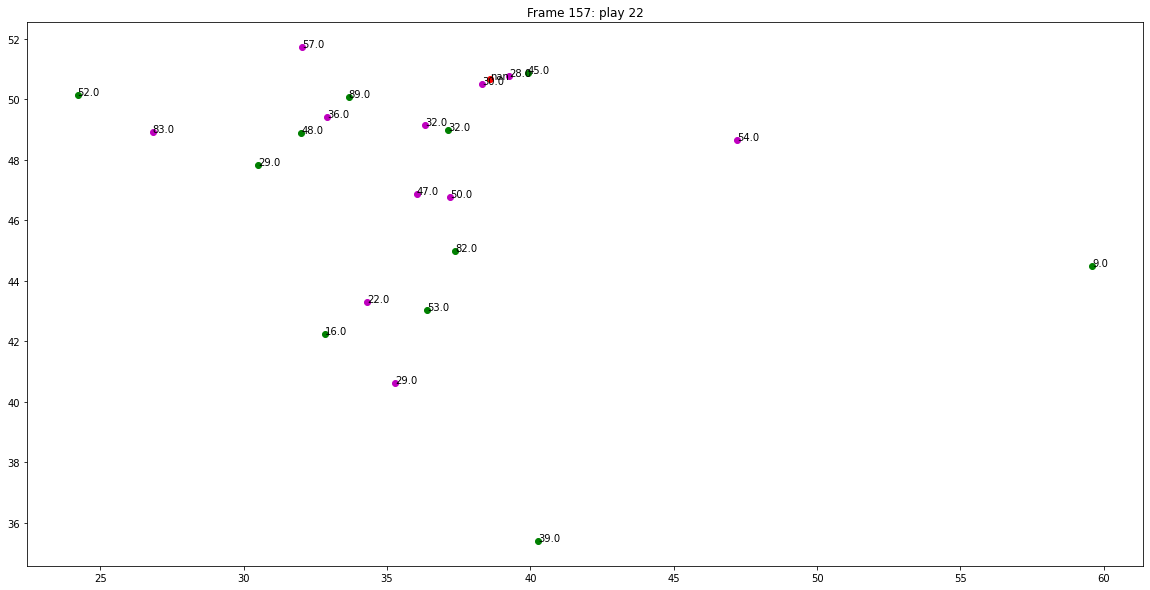

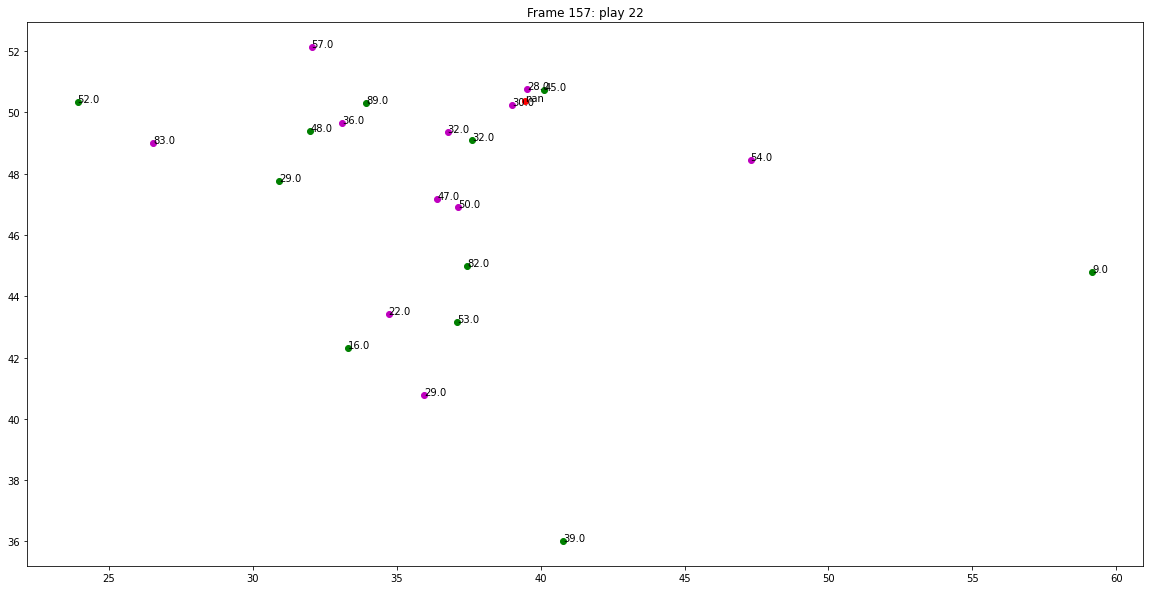

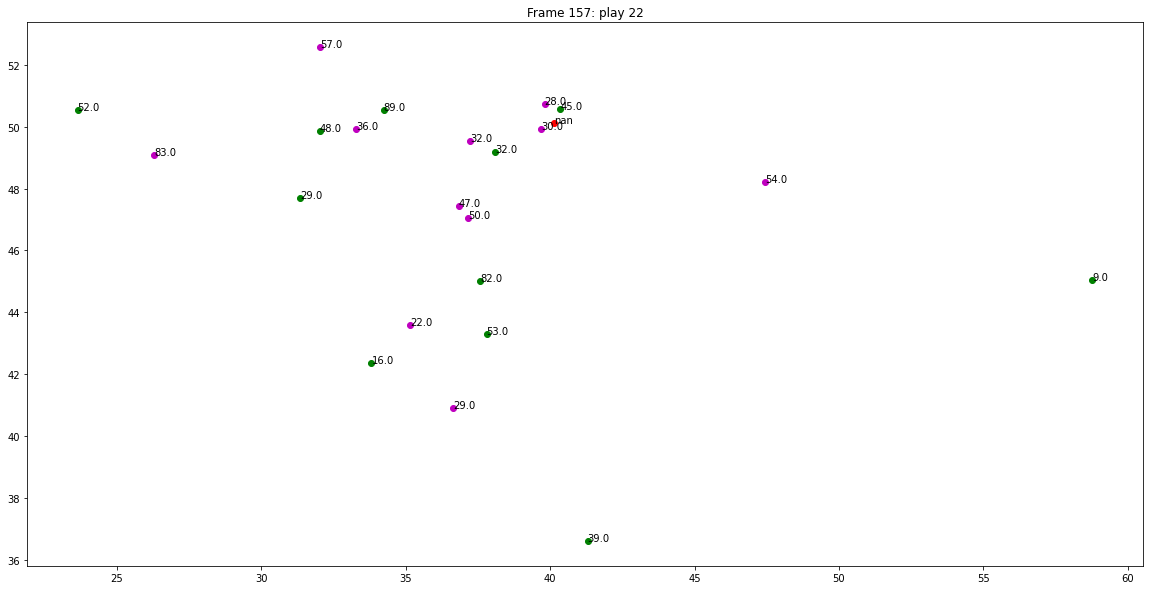

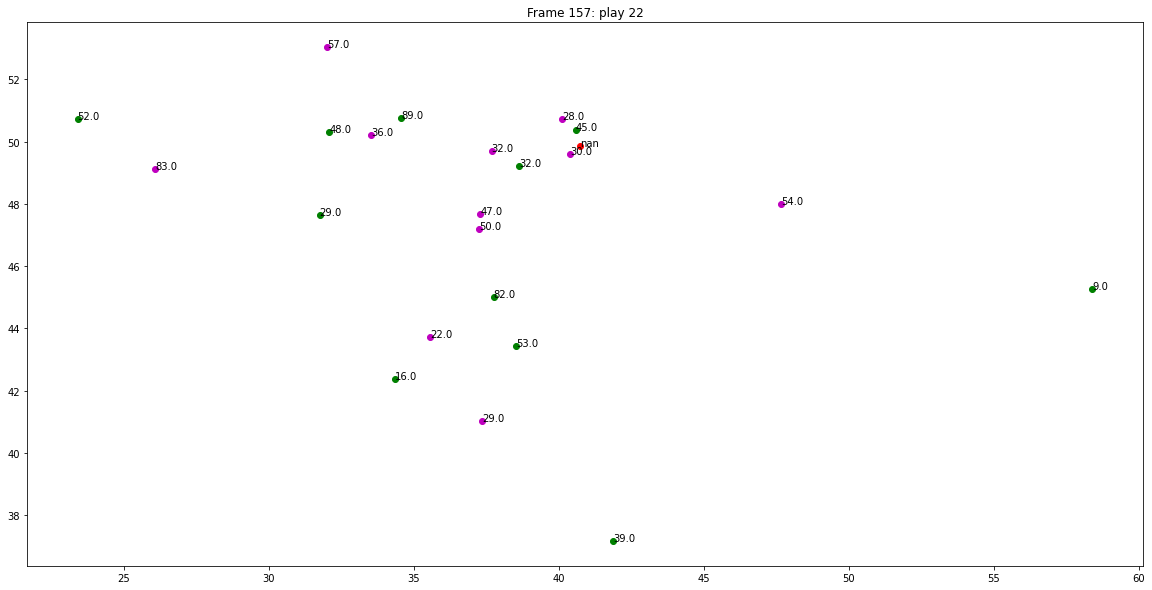

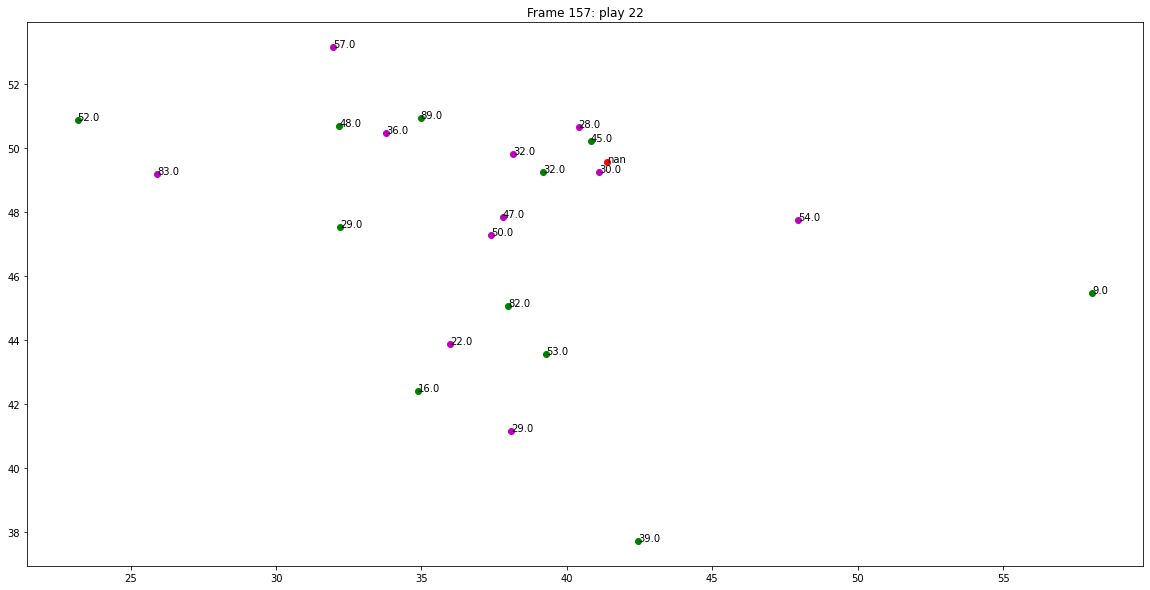

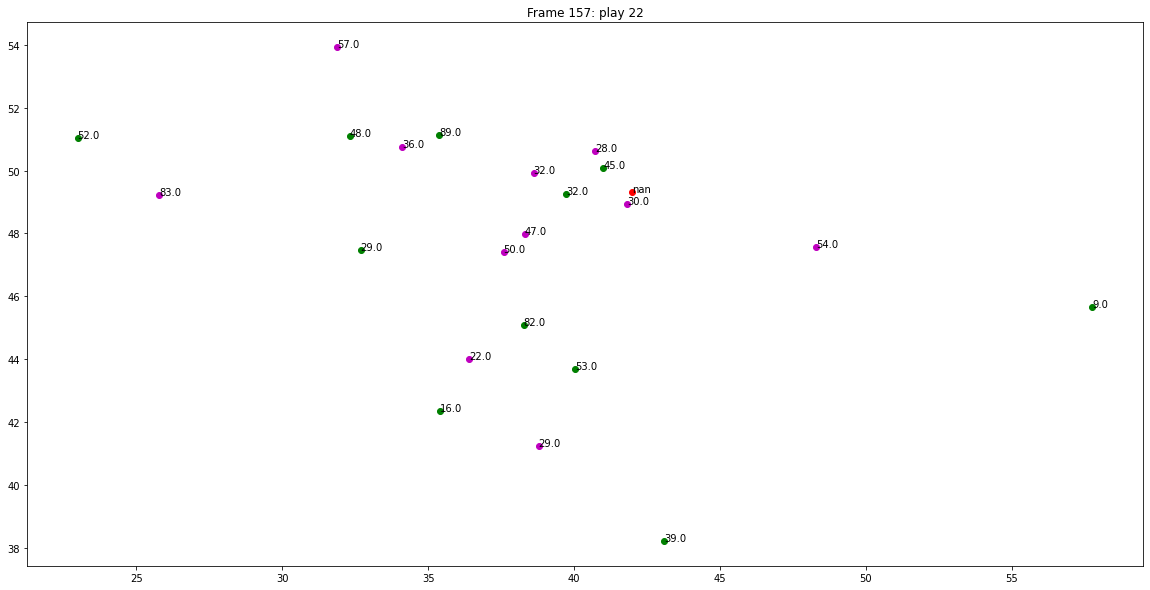

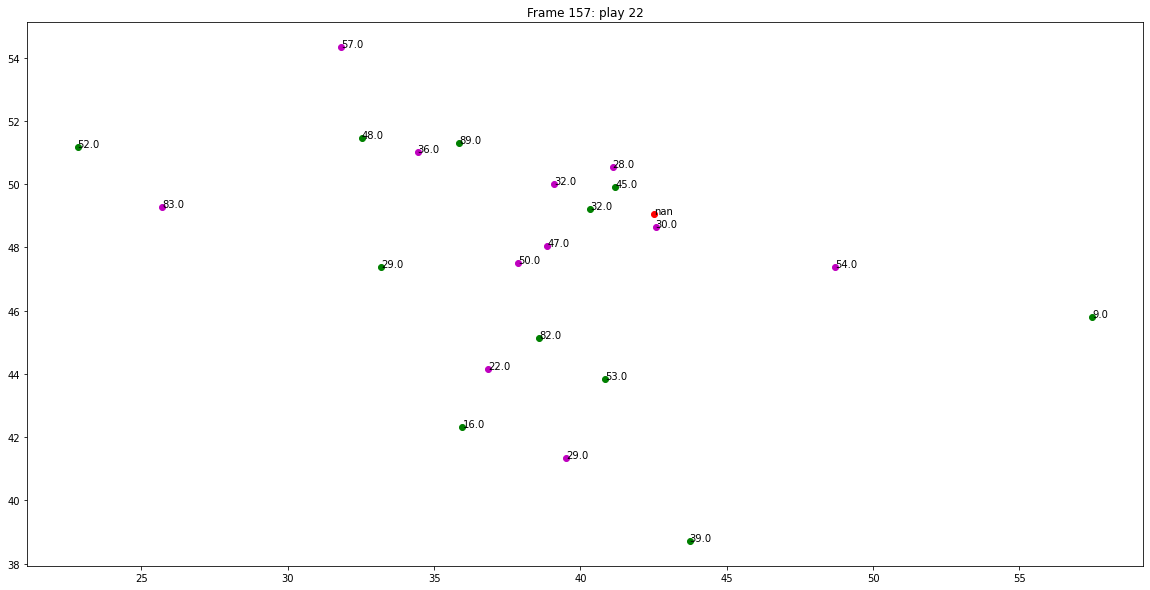

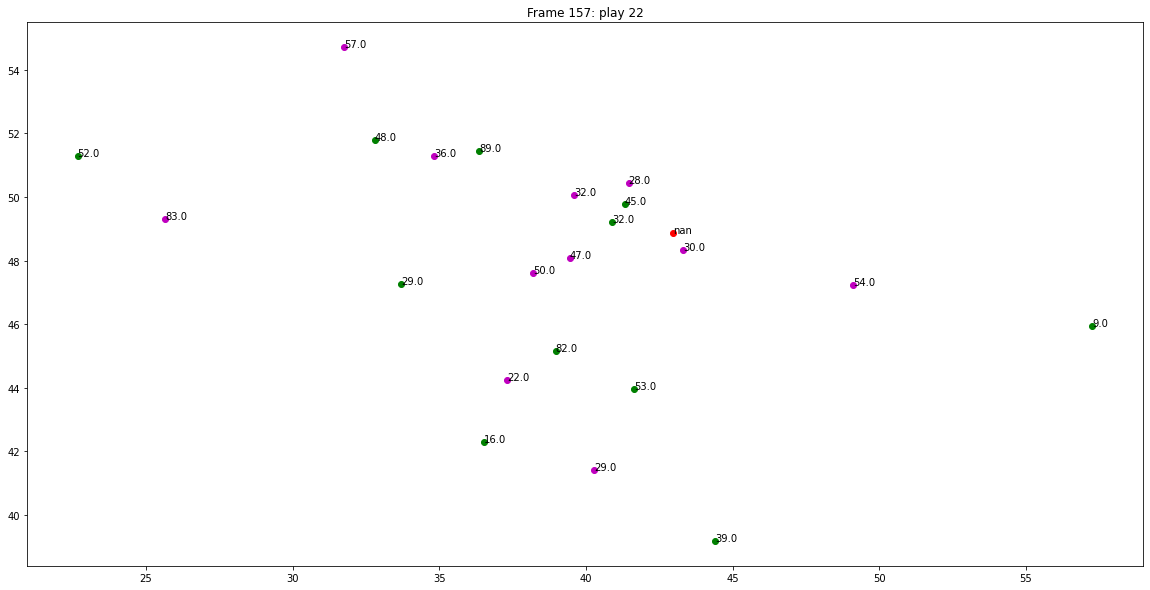

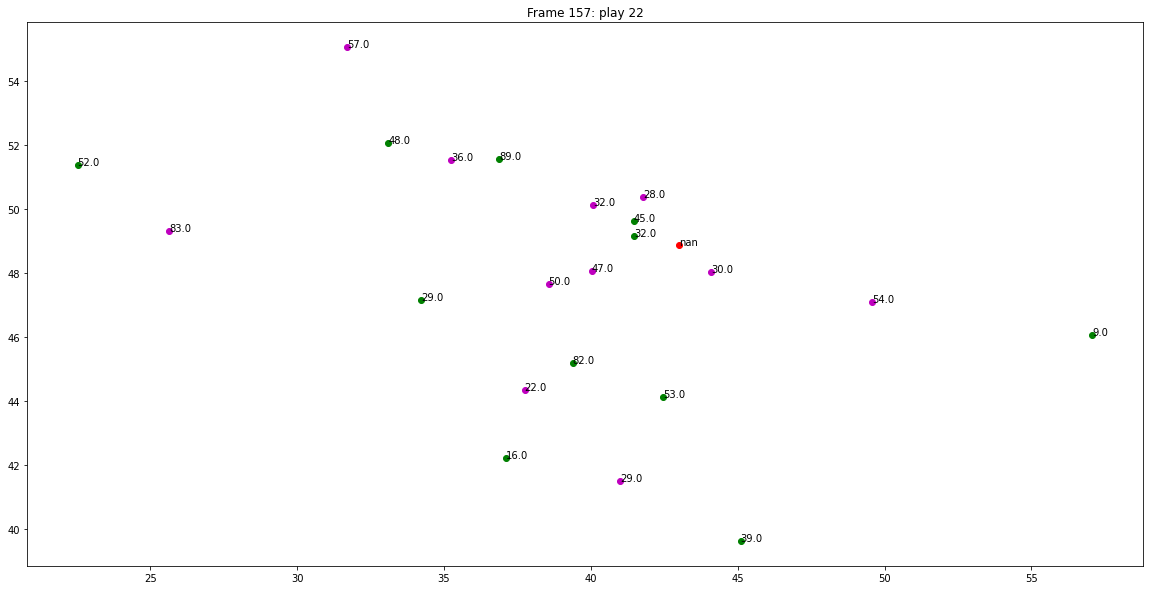

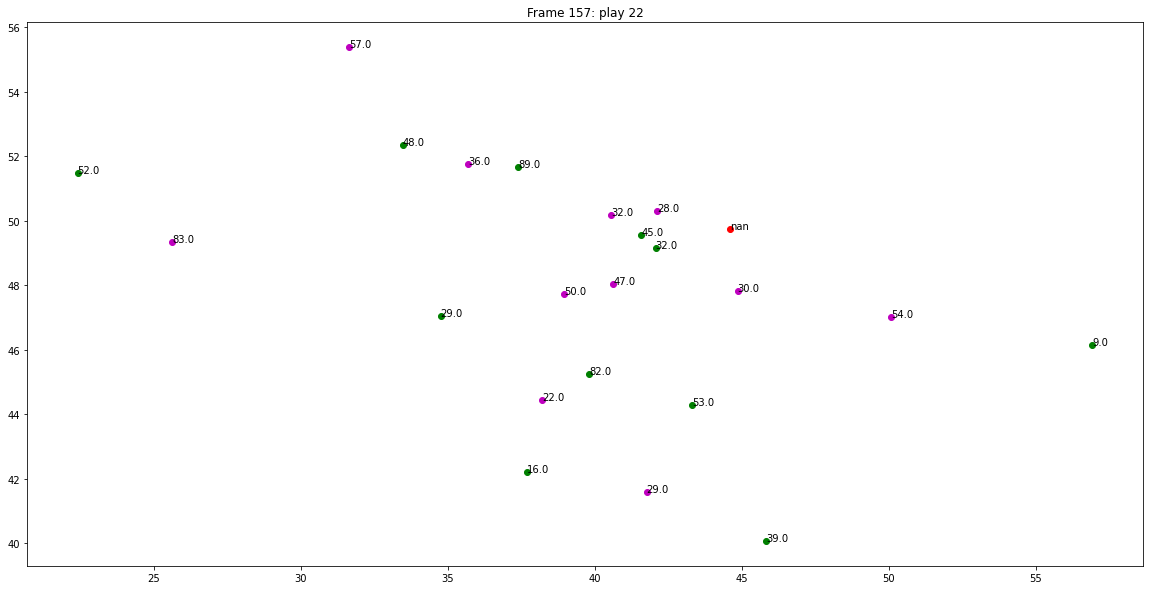

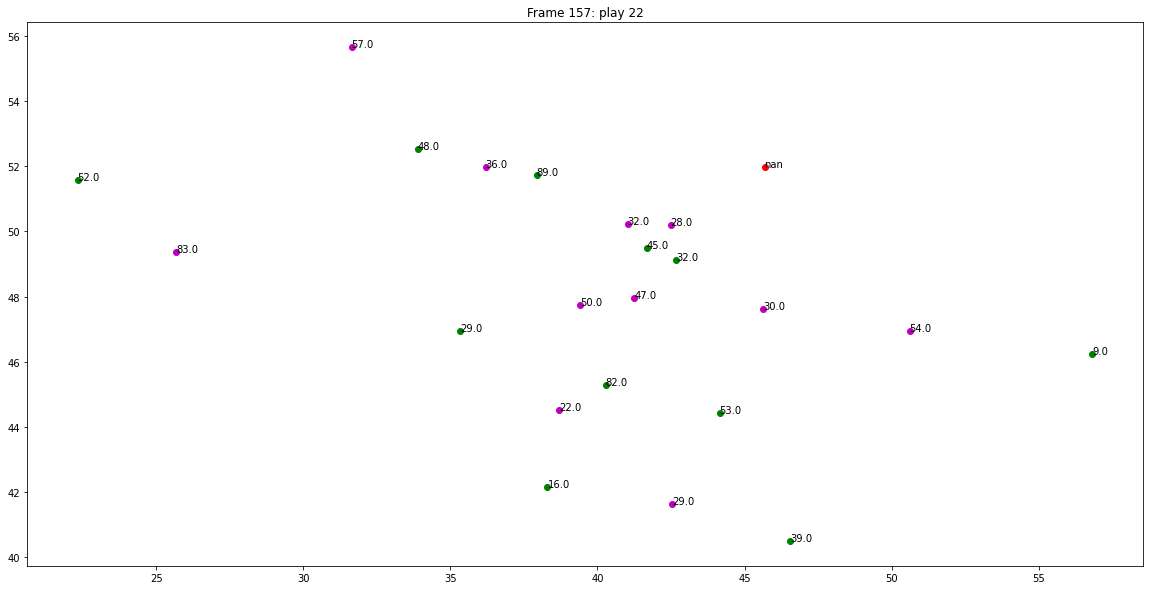

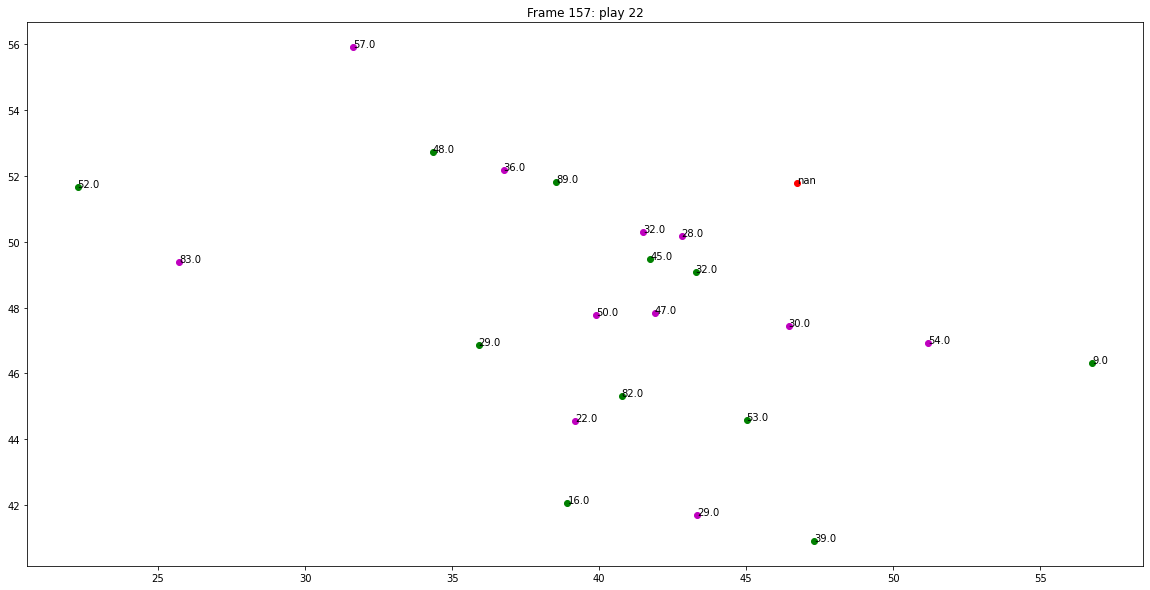

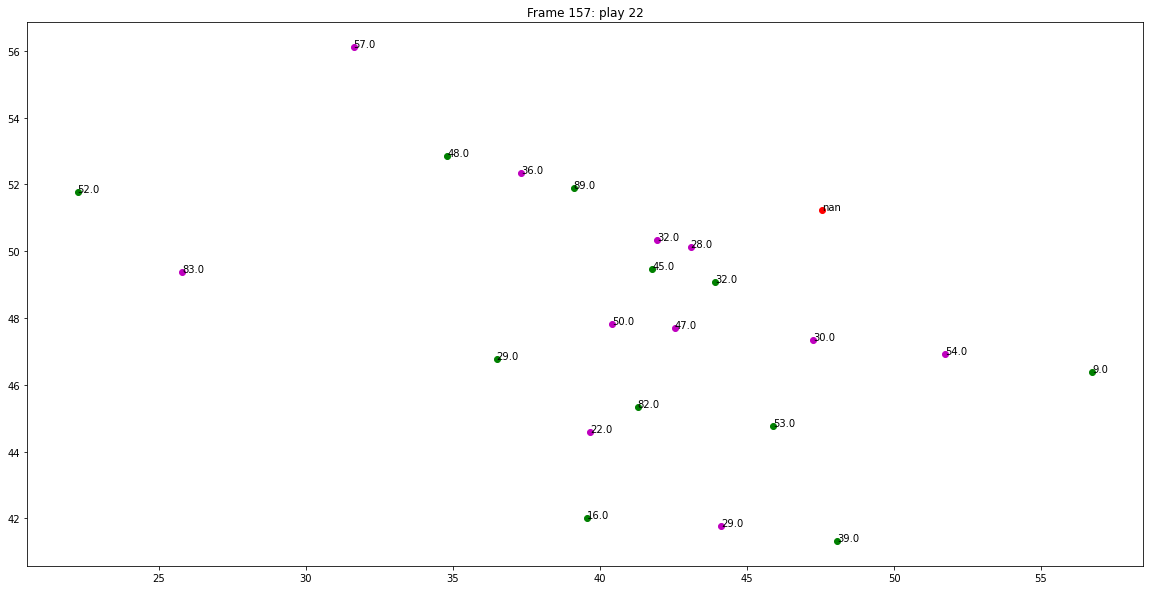

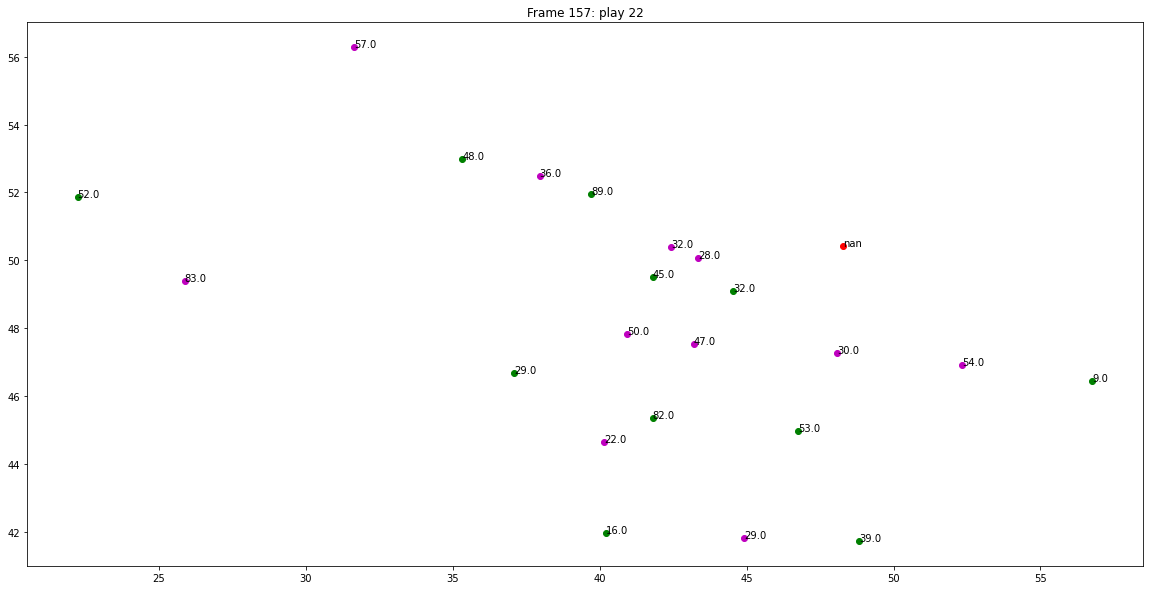

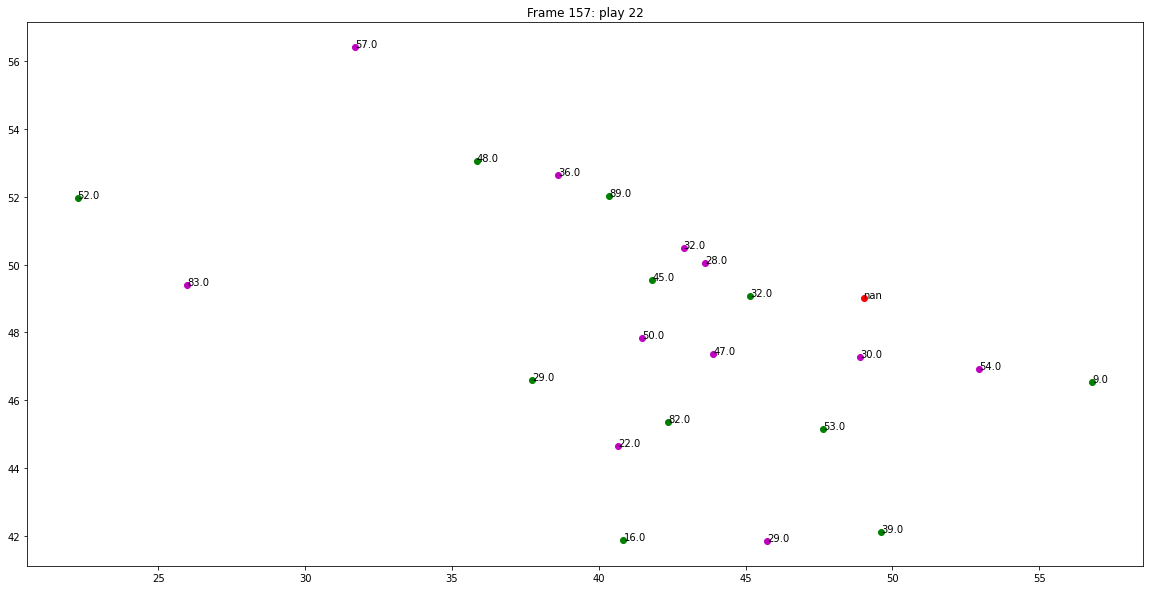

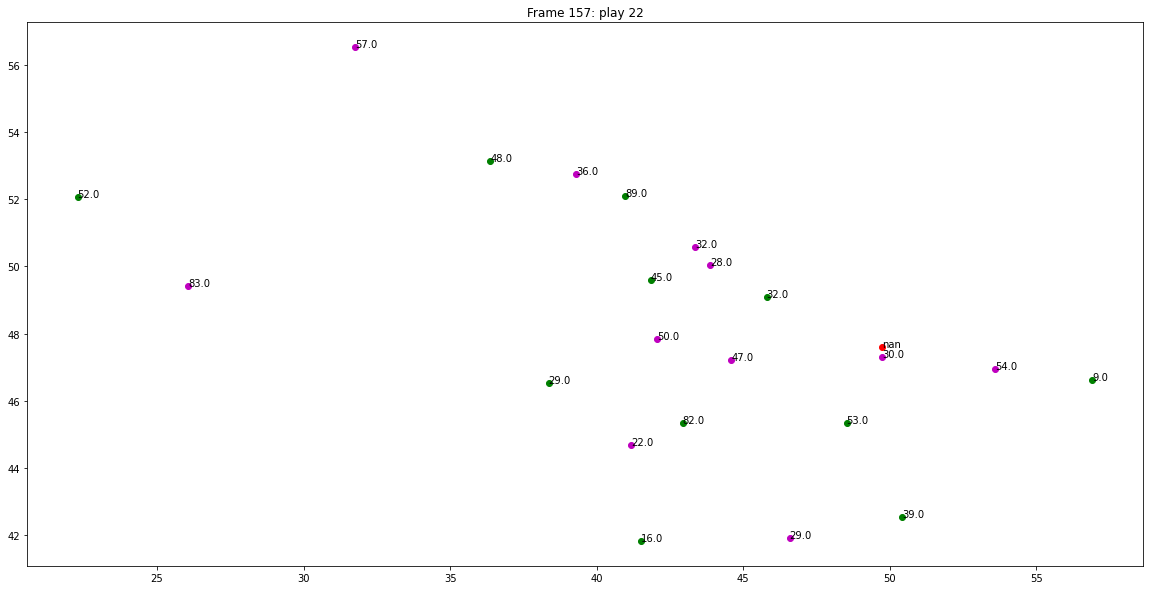

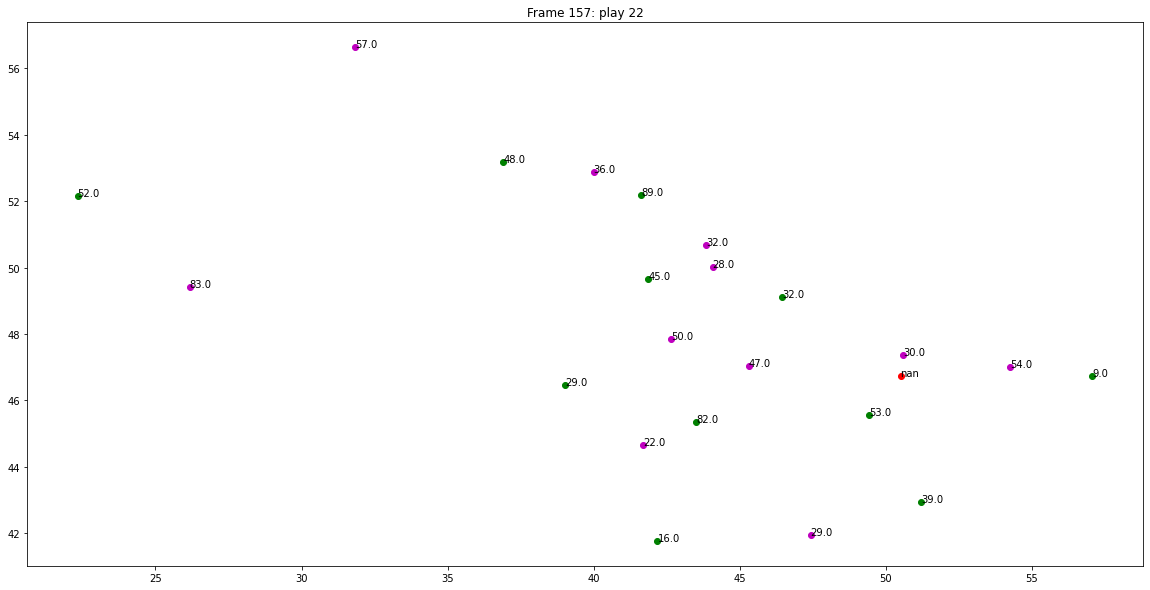

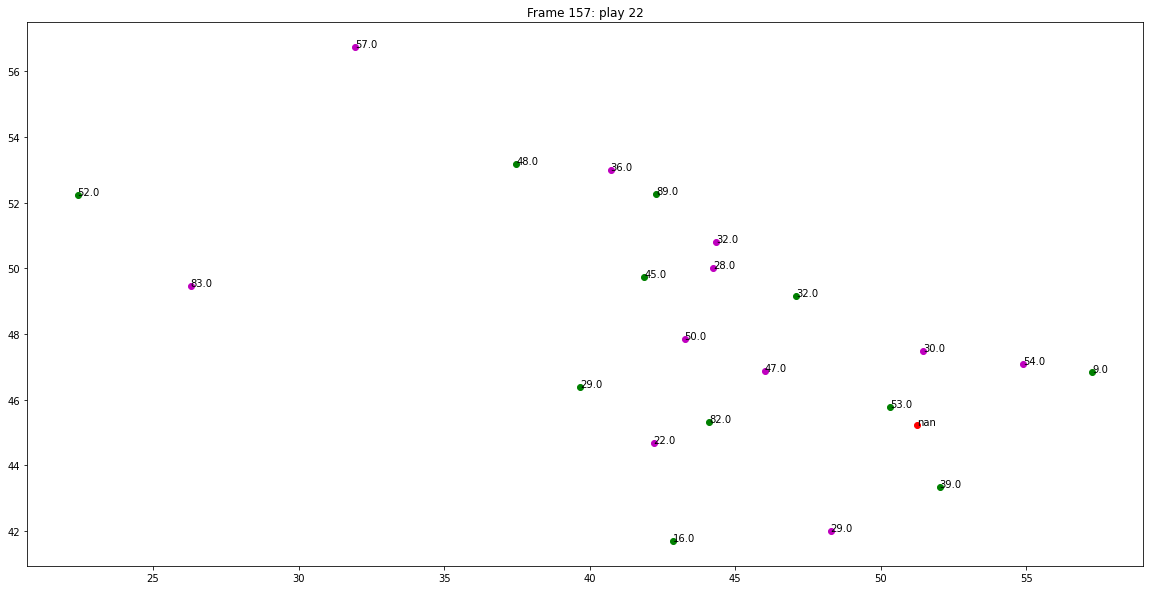

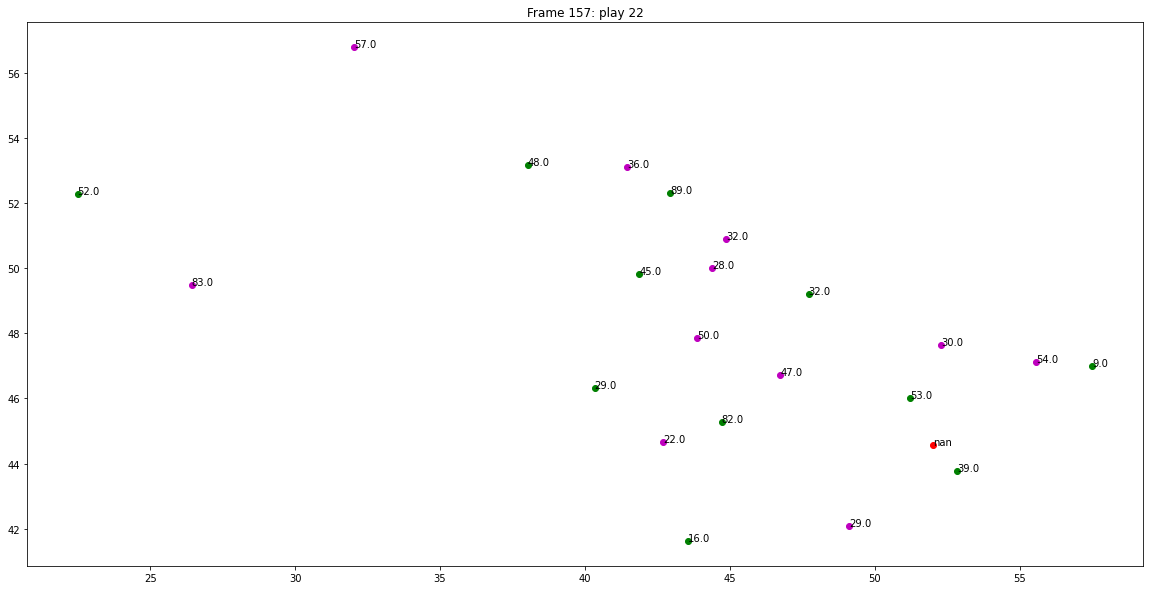

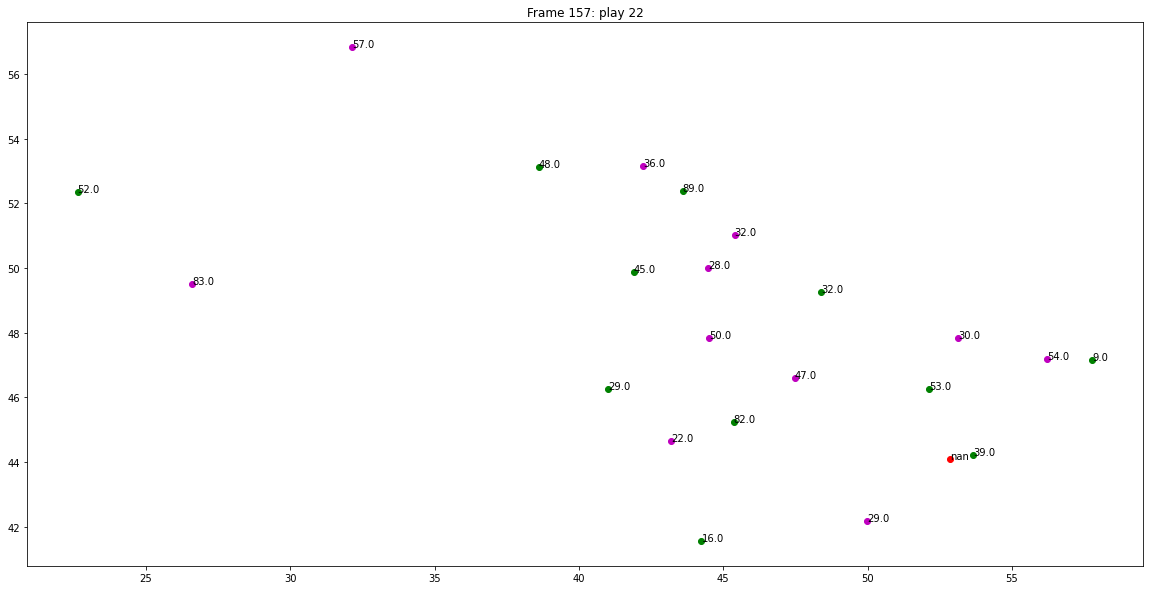

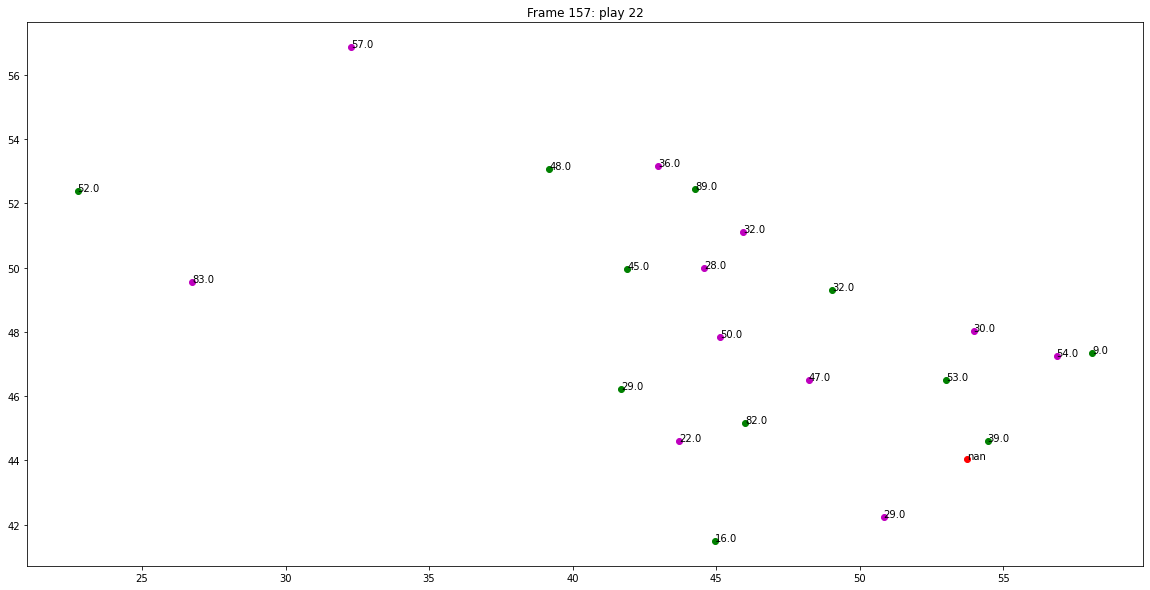

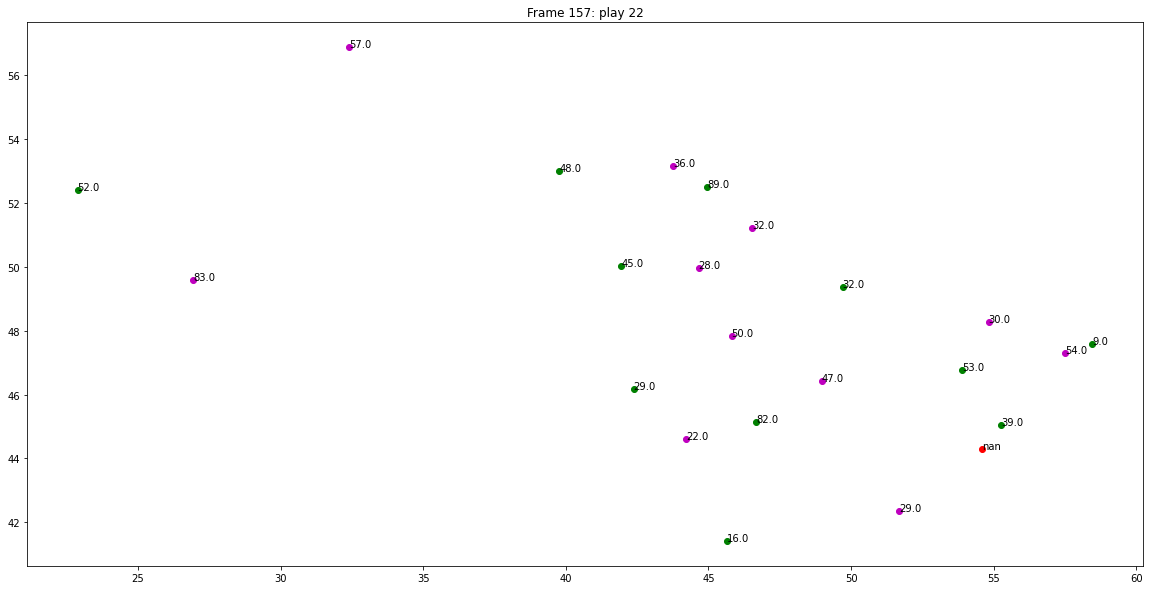

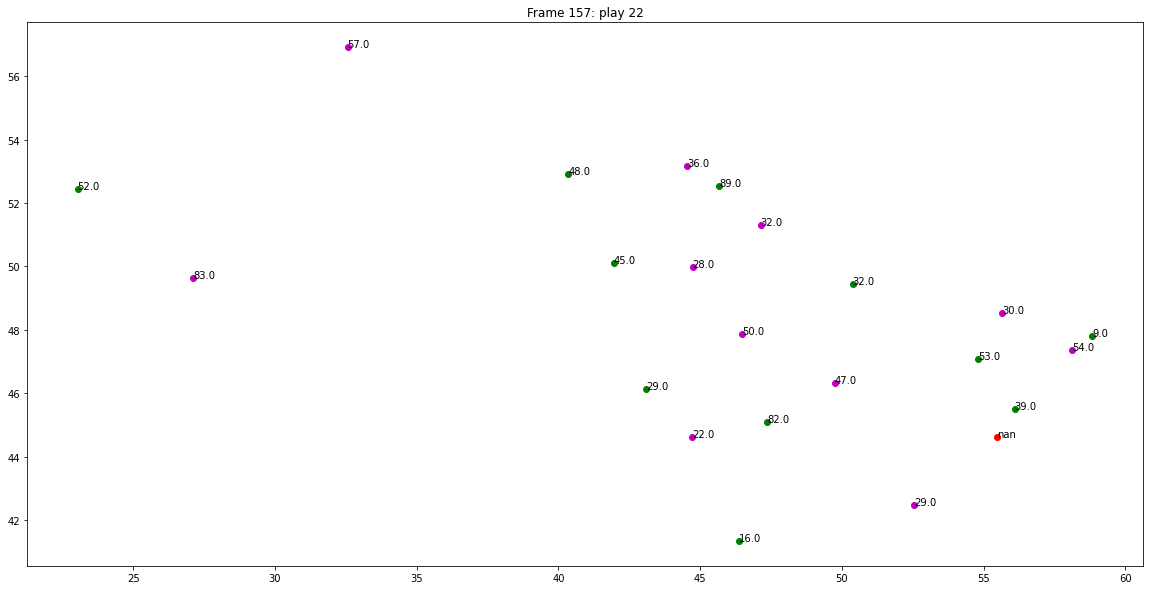

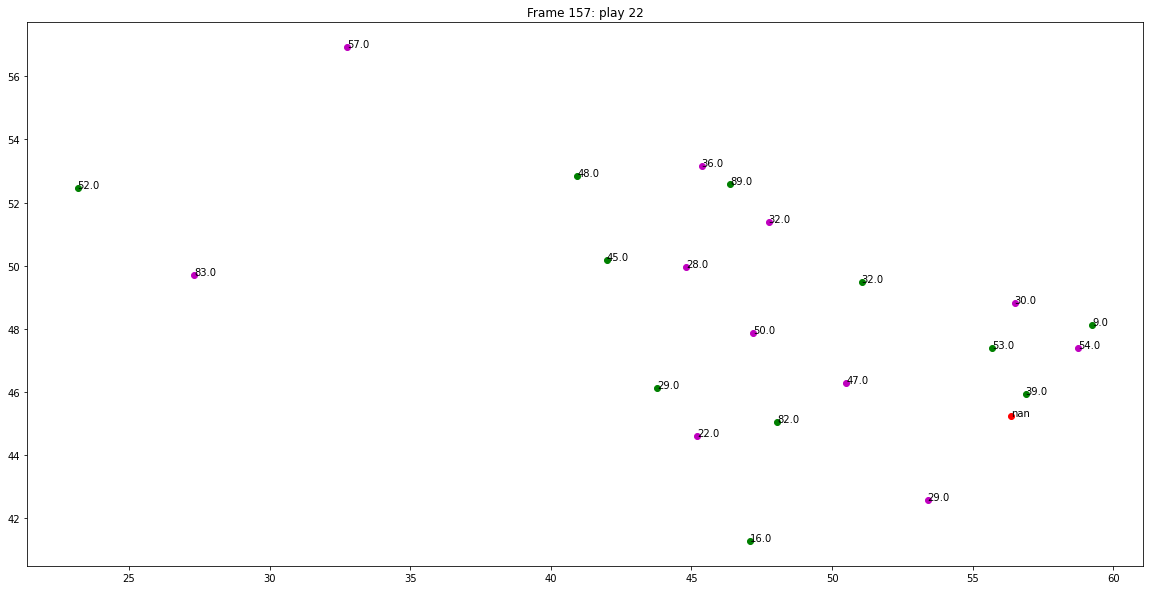

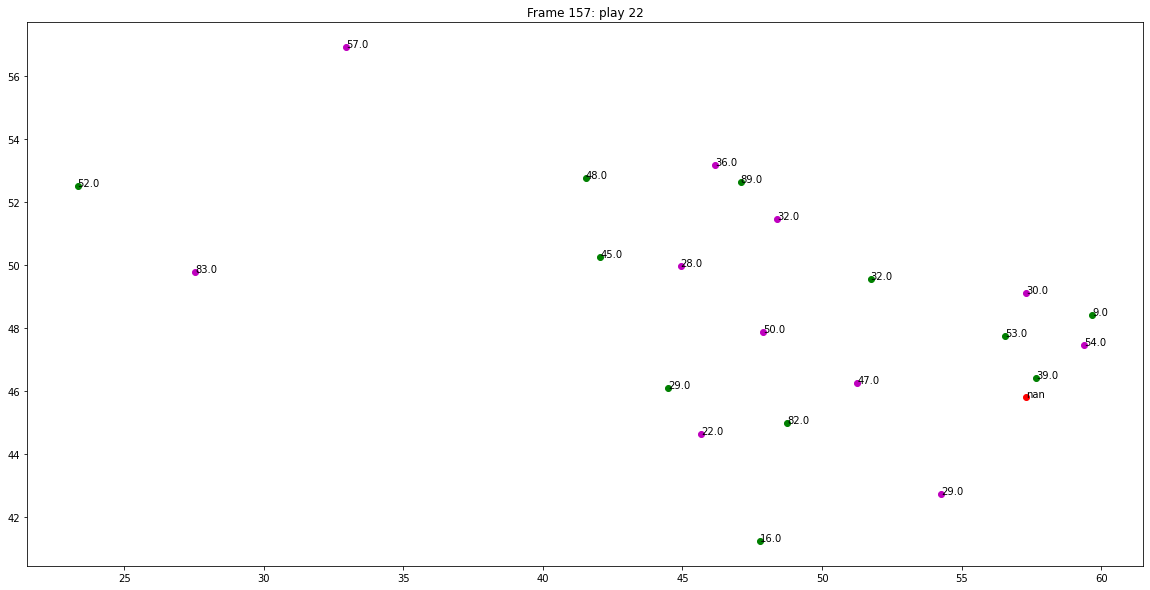

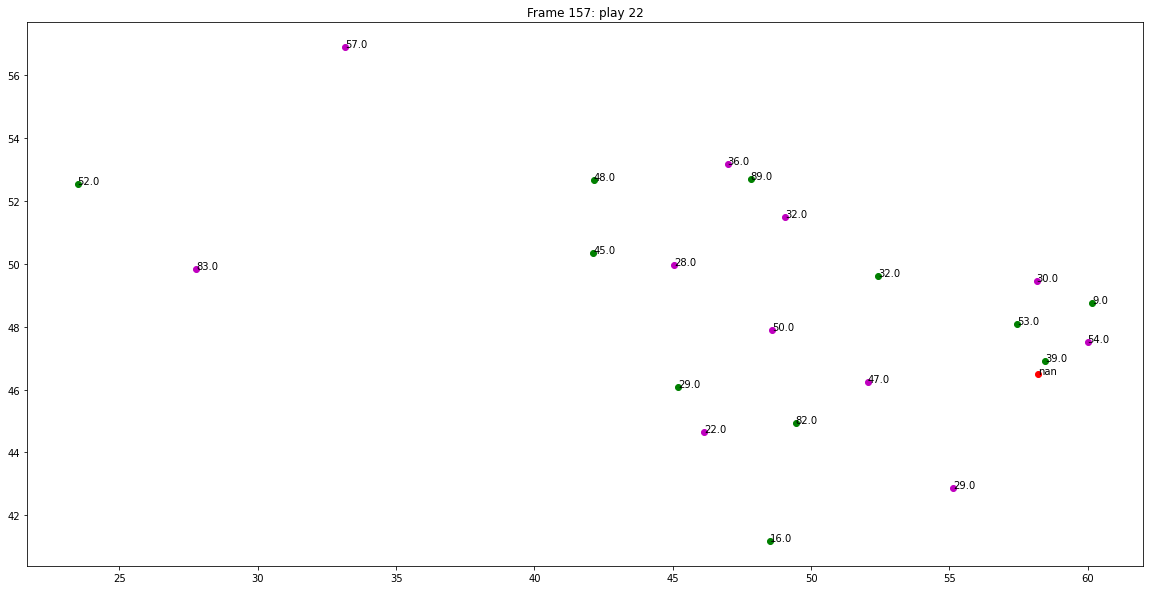

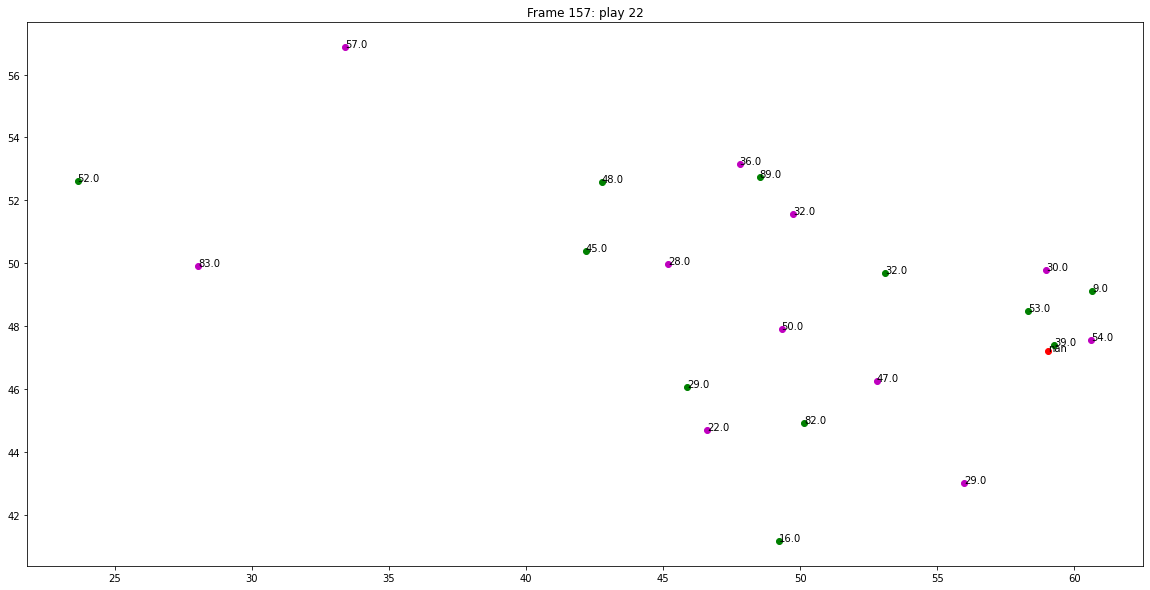

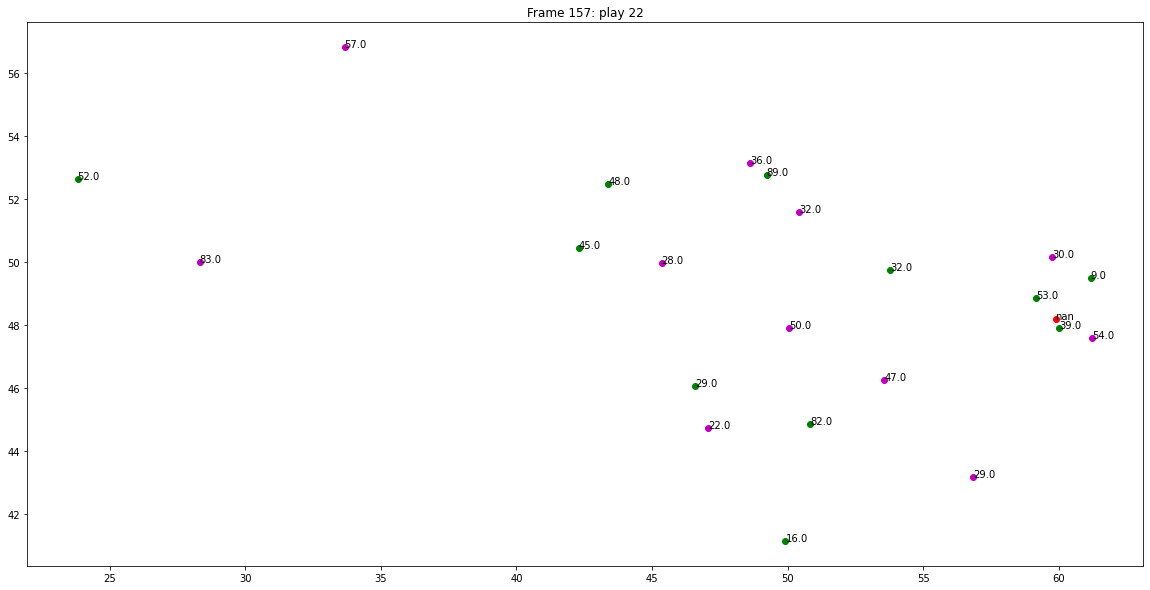

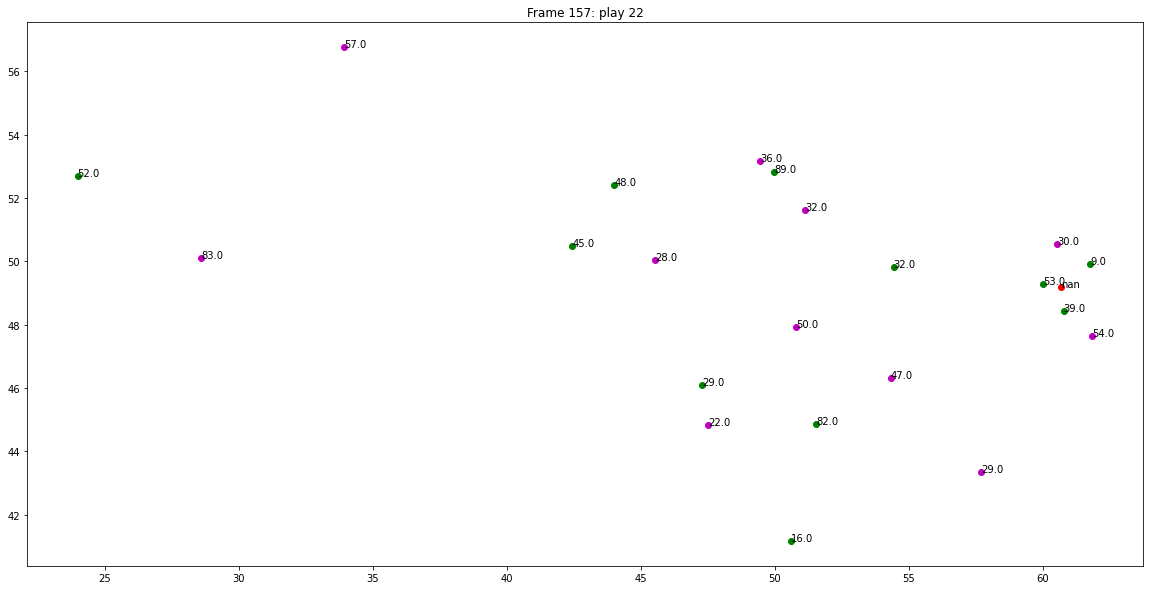

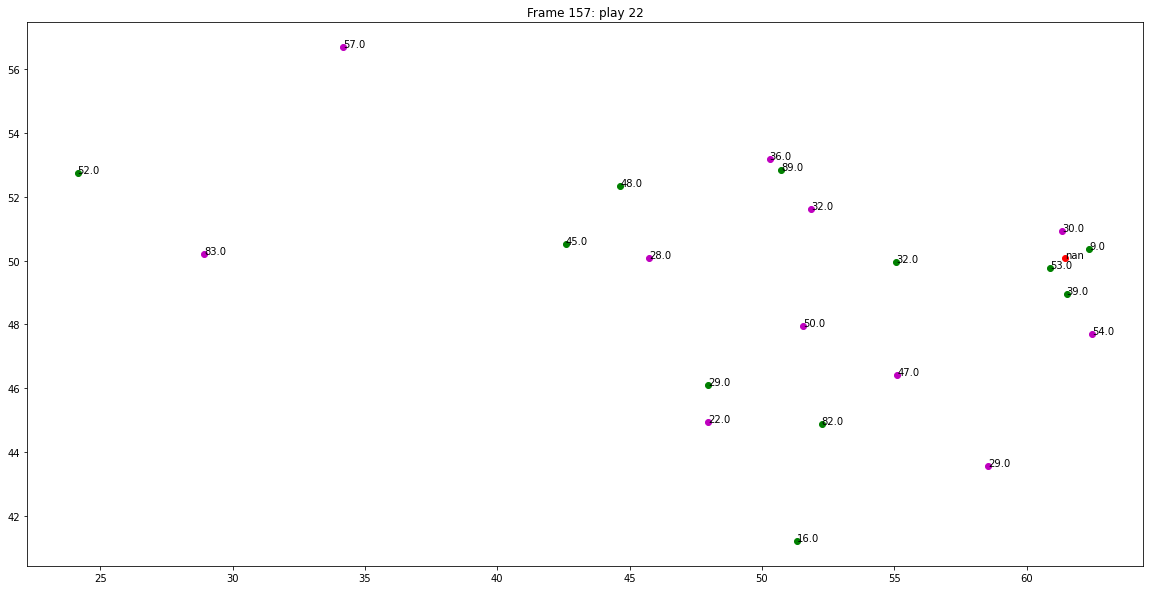

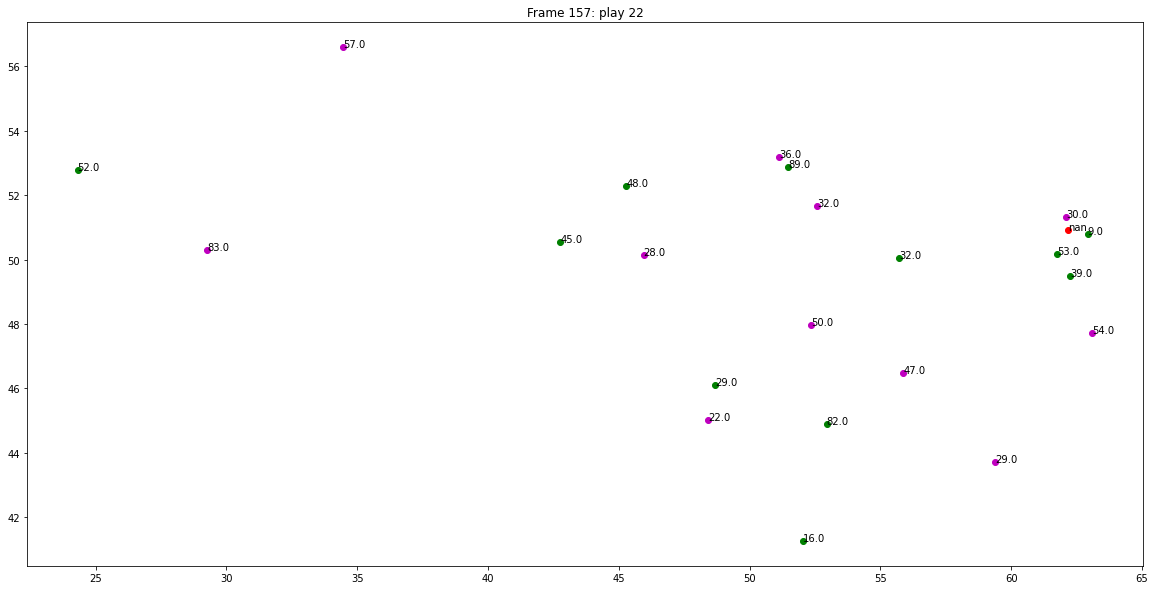

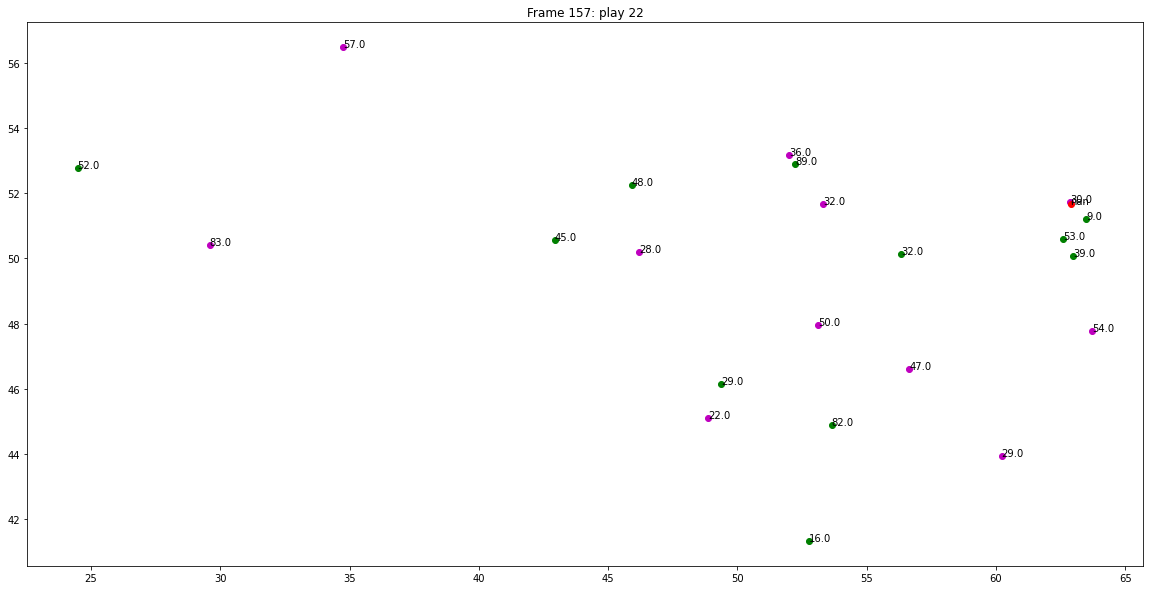

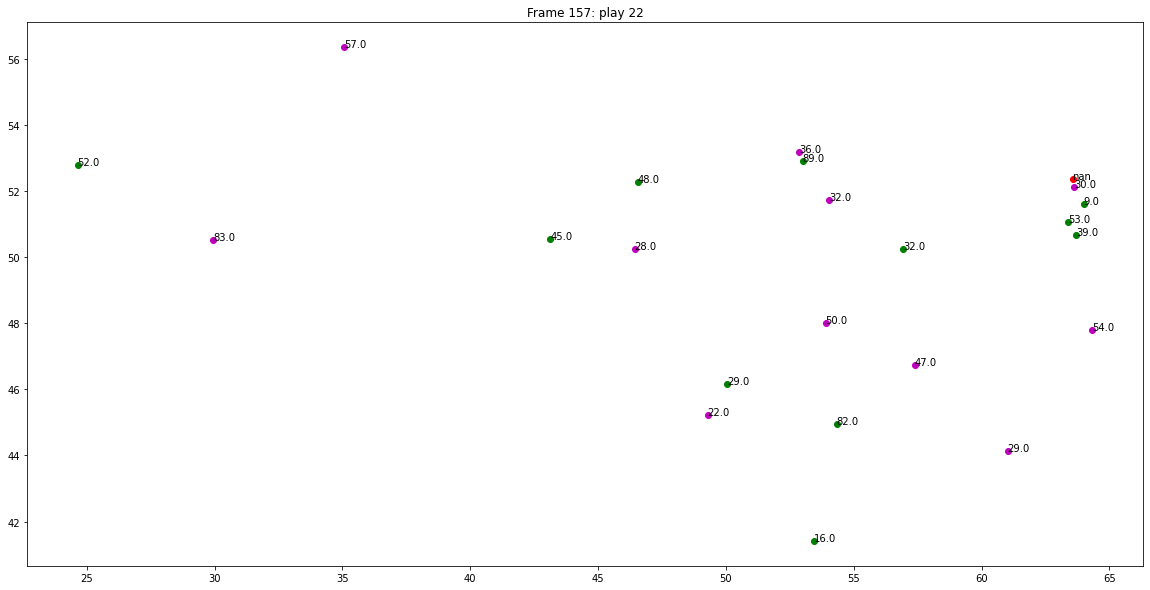

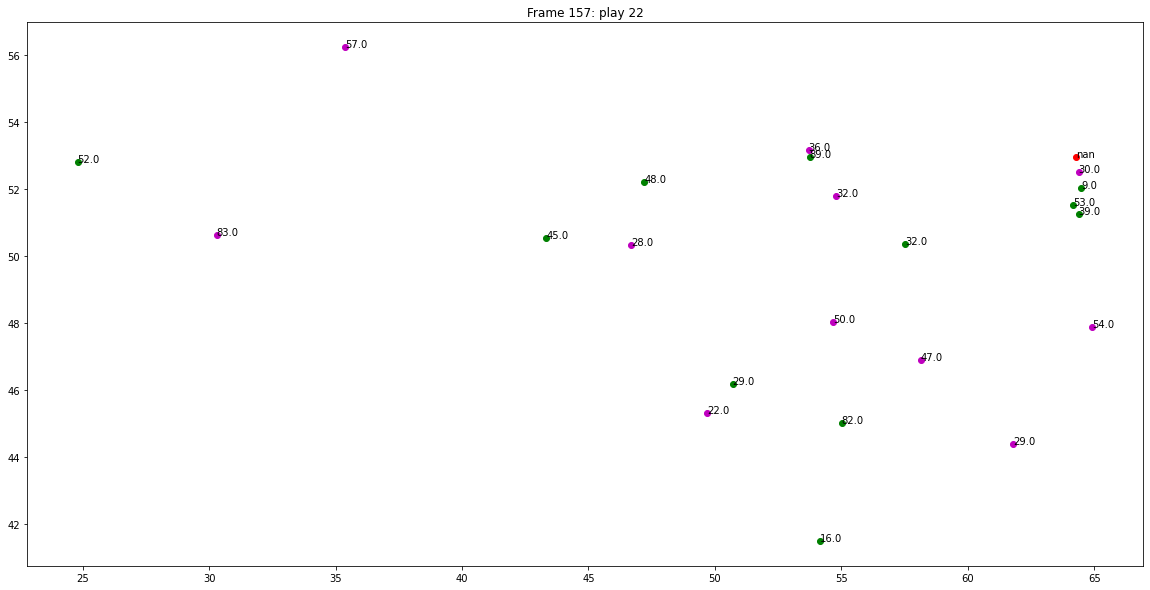

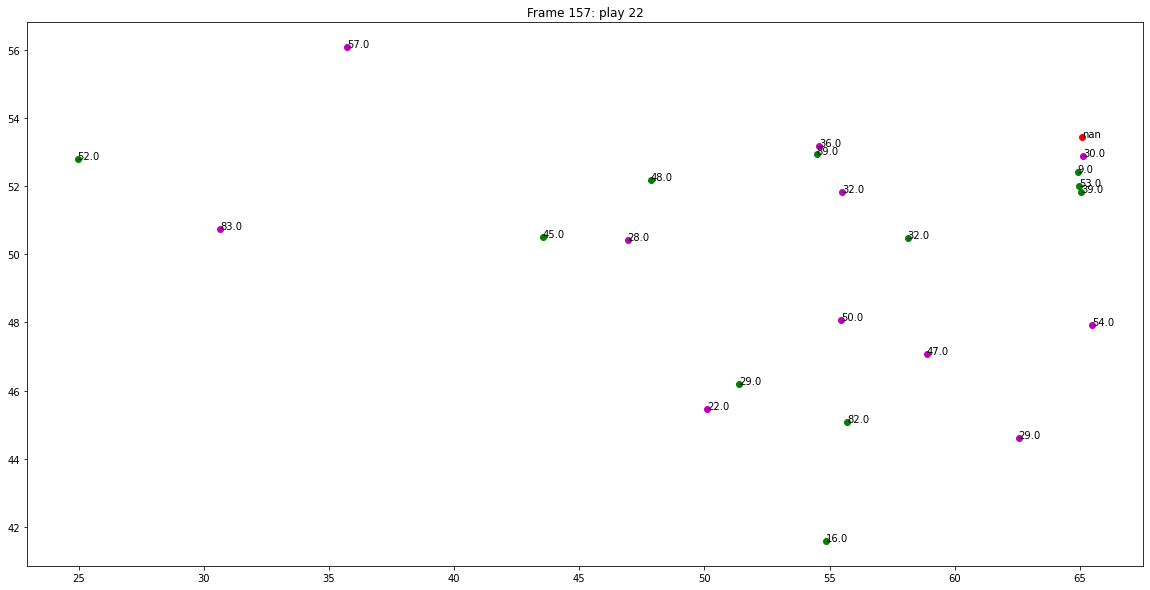

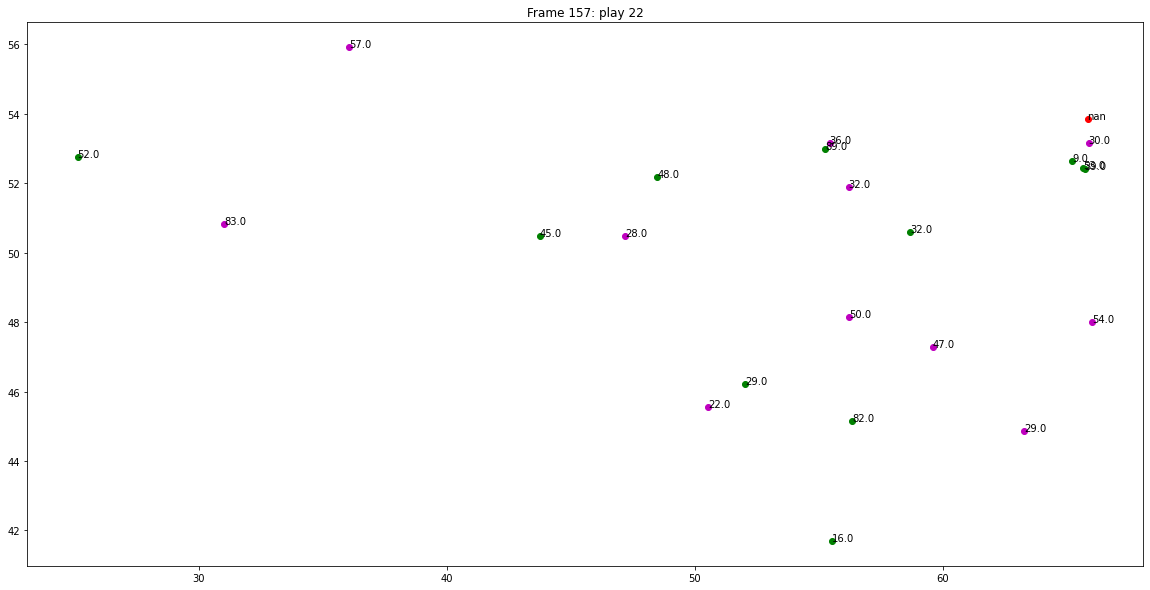

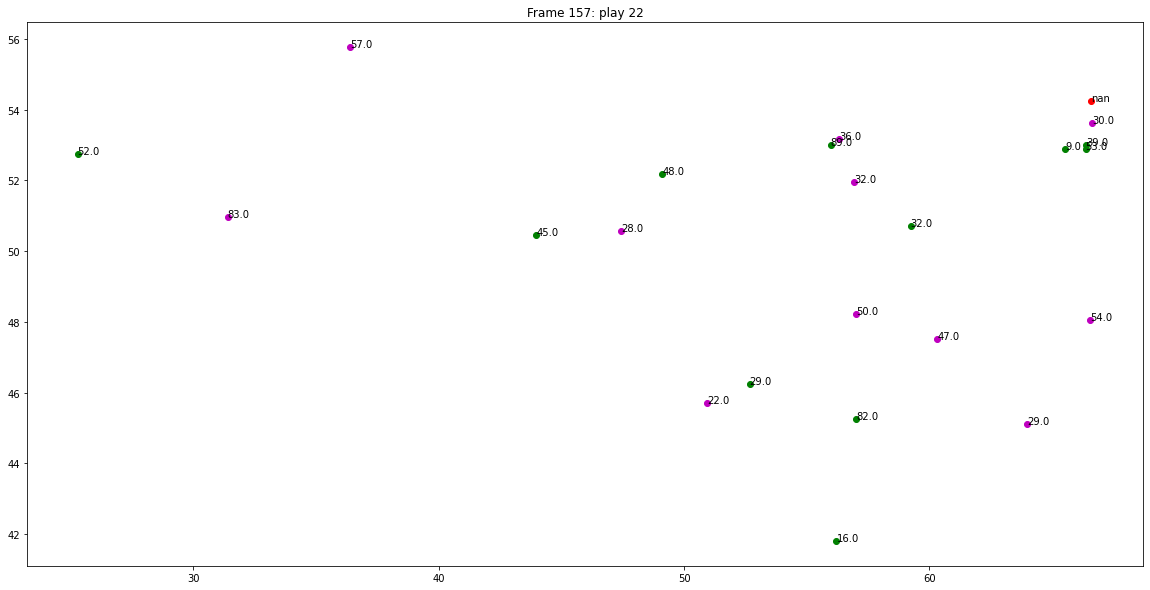

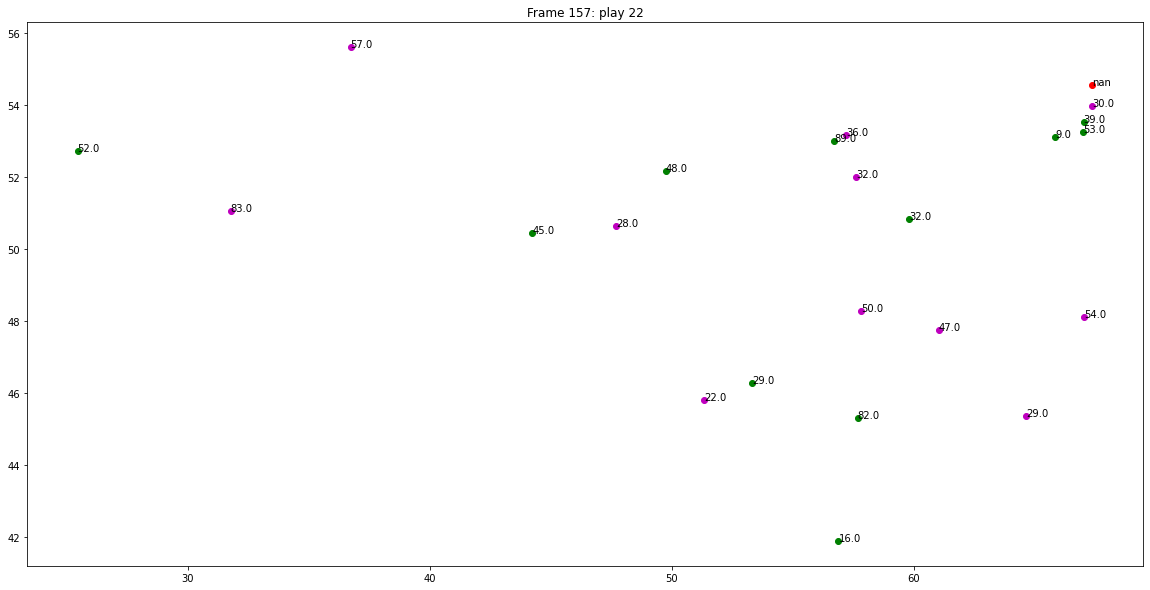

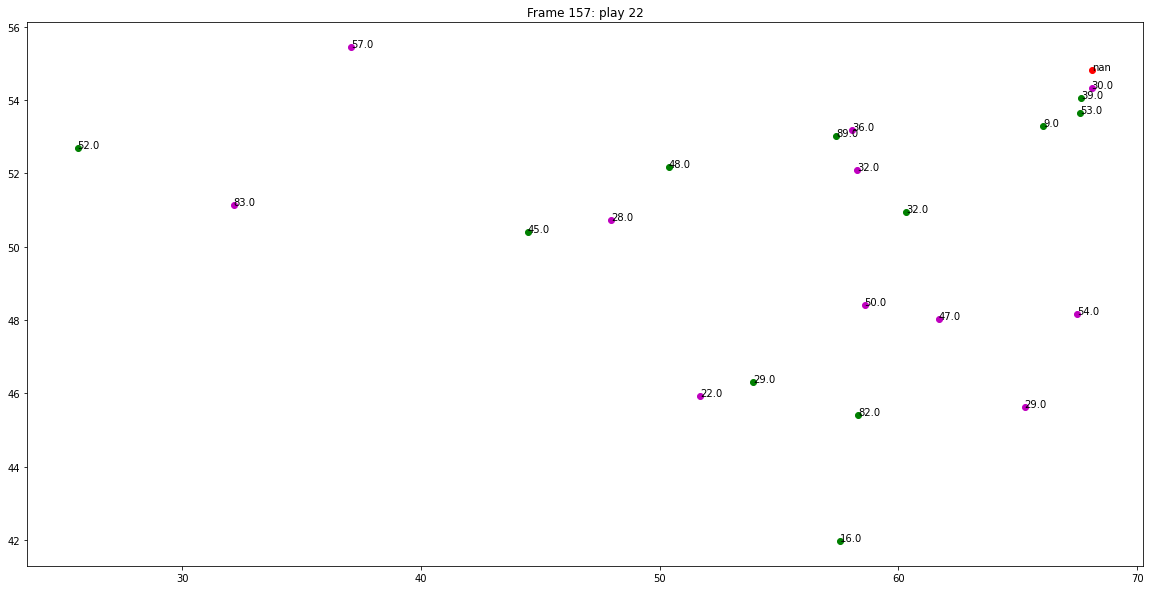

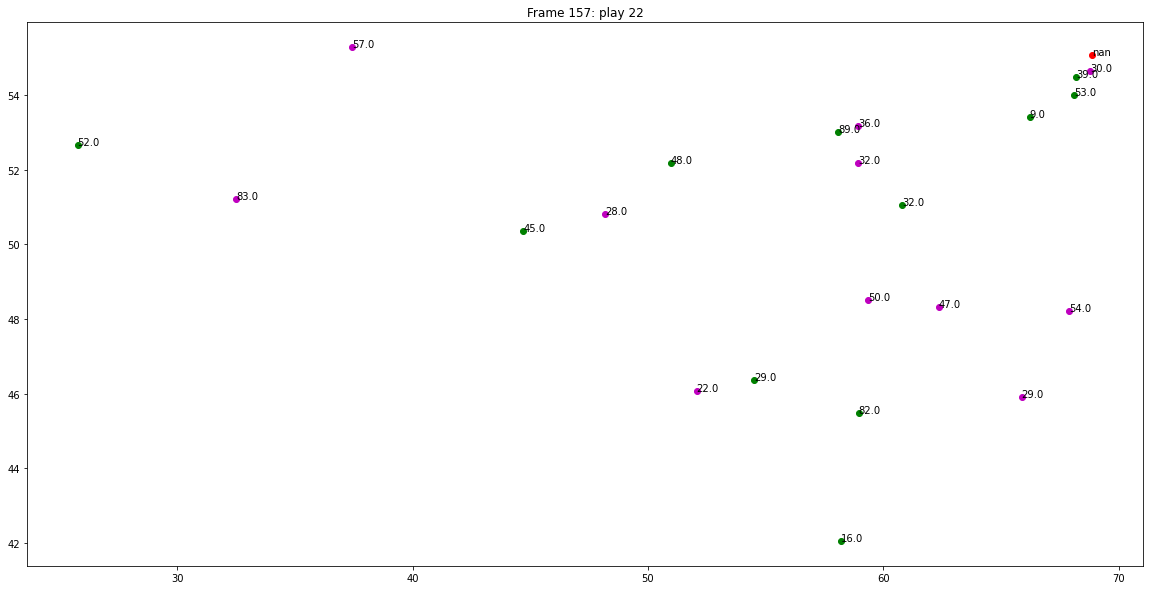

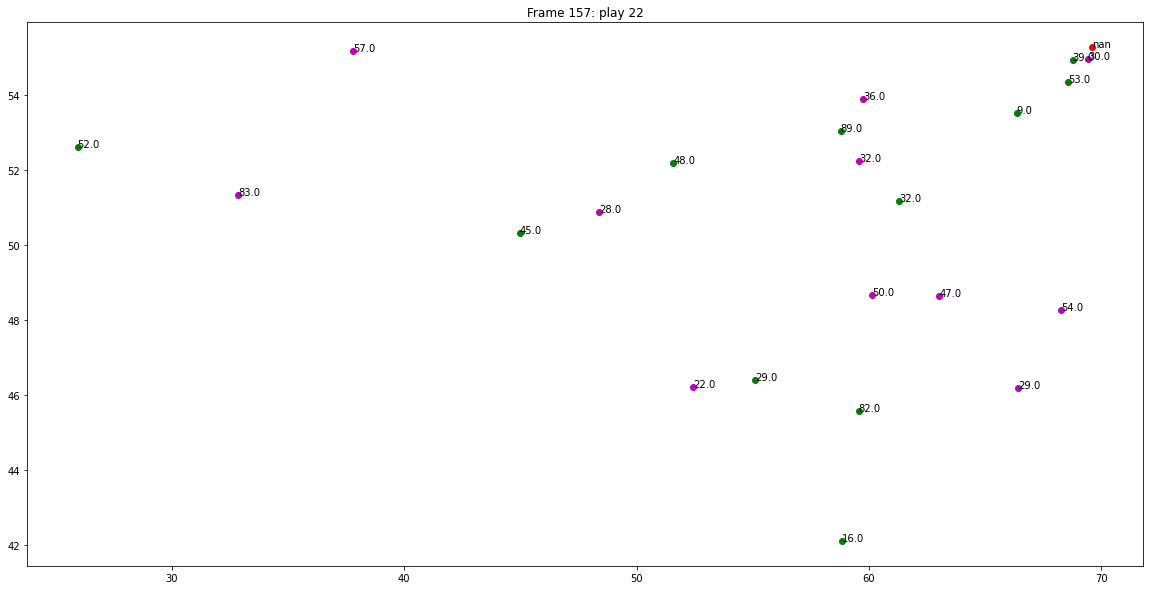

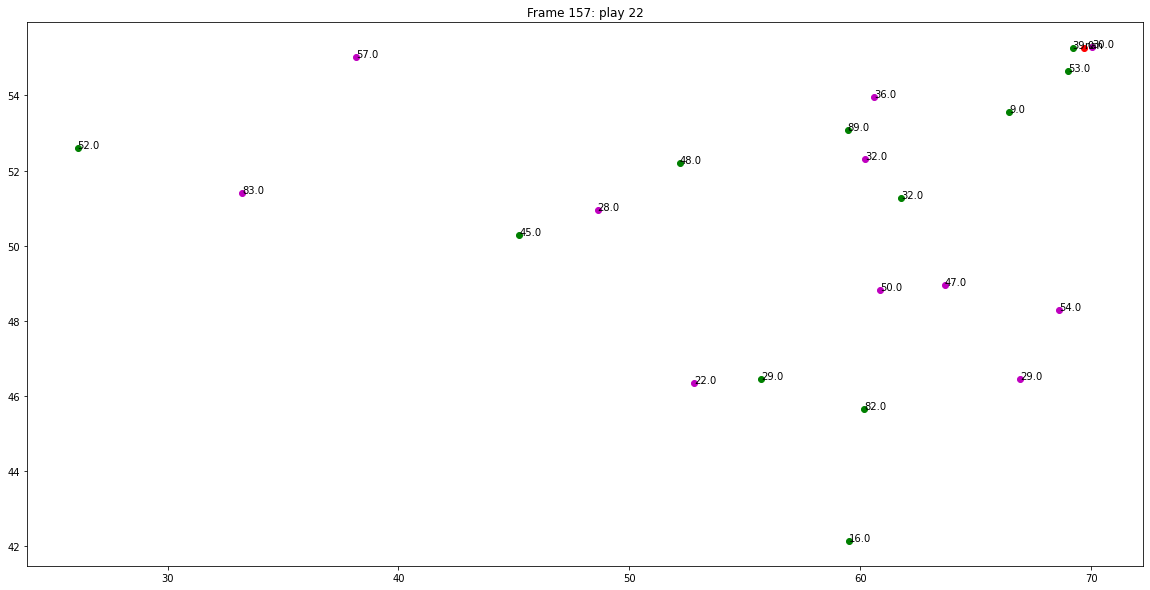

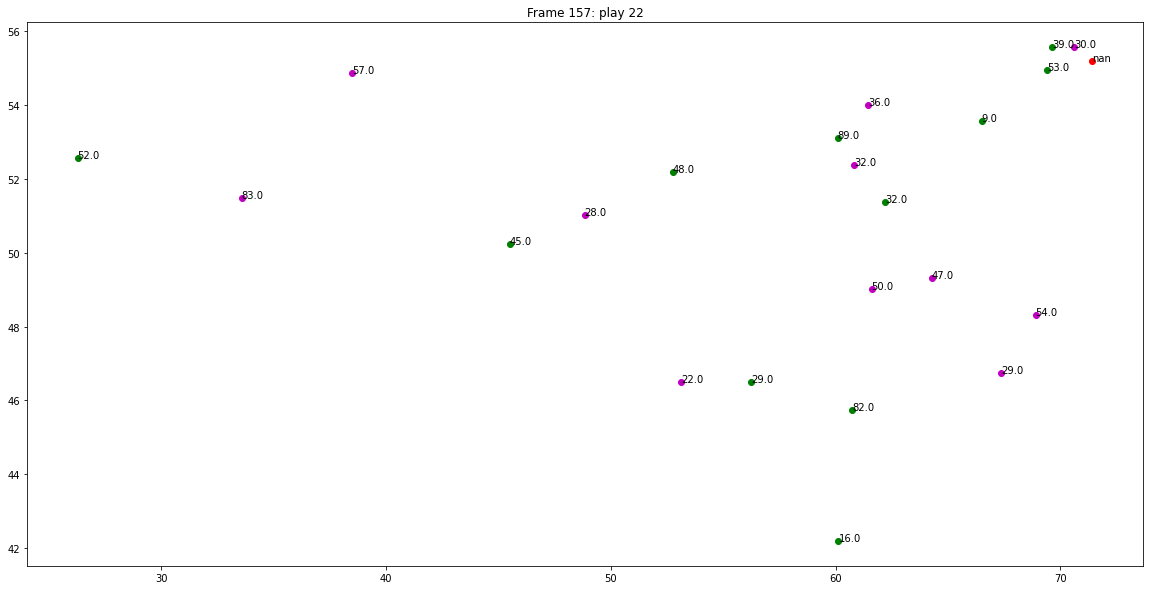

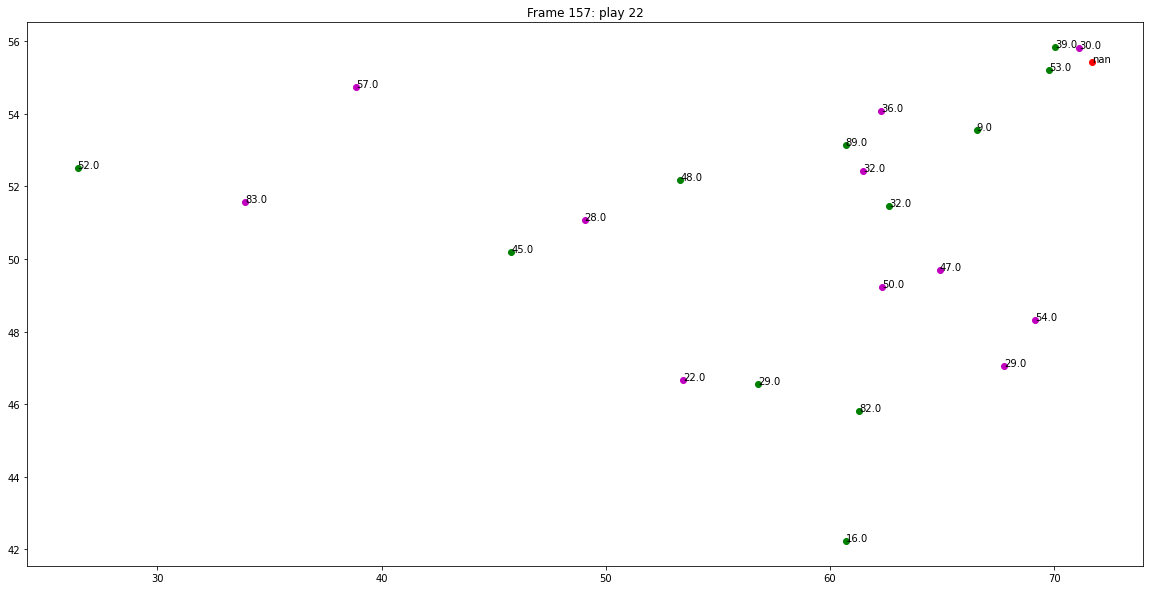

In [342]:
for frameid in range(1,play['frameId'].max()):
    plt.figure(figsize=(20,10))

    frame = play[play['frameId'] == frameid]
    for j in range(0,frame.shape[0]):
        color = 'bo'
        if frame.iloc[j]['team'] == 'football':
            color = 'ro'
        elif frame.iloc[j]['team'] == 'home':
            color = 'go'
        else:
            color = 'mo'
        plt.plot(frame.iloc[j]['x'],frame.iloc[j]['y'], color)
        plt.text(frame.iloc[j]['x'],frame.iloc[j]['y'],s=frame.iloc[j]['jerseyNumber'])
    plt.title(f"Frame {i}: play {j}")
    plt.show()